## Data Acquisition

In [218]:
from os import listdir
from os.path import isfile, join

import pandas as pd

In [219]:
def merge_dataset(data_files: str = "../../datasets", symbol: str = "btc"):
    files = [f for f in listdir(data_files) if isfile(join(data_files, f)) and f.startswith(symbol) and f.endswith('.parquet')]
    return pd.concat(
        pd.read_parquet(join(data_files, f), engine='fastparquet') for f in files
    )

In [220]:
def prepare_dataset(data_files: str = "../datasets", symbol: str = "btc", datetime_index: bool = True):
    df = merge_dataset(data_files=data_files, symbol=symbol)
    
    # timestamp to python datetime
    if datetime_index:
        df['date'] = pd.to_datetime(df['date'], unit='s')

    df = df.set_index(['date'])
    df.sort_index(inplace=True)

    return df

In [221]:
top_10_symbol = [
        'BTC-BRL', 'ETH-BRL', 'USDT-BRL', 'SOL-BRL', 'XRP-BRL',
        'USDC-BRL', 'DOGE-BRL', 'ADA-BRL', 'AVAX-BRL', 'SHIB-BRL'
    ]

In [222]:
def create_dataset():
    dataset = {}
    for pair in top_10_symbol:
        pair = pair.replace('-BRL', '').lower()
        dataset[pair] = prepare_dataset(symbol=pair)
    return dataset

In [223]:
def dataset_by_time_range(start_date='2023-01-01', end_date='2023-12-31', columns=['price', 'amount']):
    dataset = create_dataset()
    return {pair: dataset[pair].loc[f'{start_date}':f'{end_date}'][columns] for pair in dataset}

## Exploratory Data Analysis

In [224]:
# TBD

## Models

### Isolation Forest

In [225]:
import os

import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

### Plotting Figures

In [226]:
def plot_outliers(model, df, pair, time_range, save_plot=True):
    model.fit(df)
    df['score'] = model.decision_function(df[['price', 'amount']])
    df['anomaly_value'] = model.predict(df[['price', 'amount']])
    # outliers
    outliers = df.loc[df['anomaly_value'] == -1]
    outliers_index = list(outliers.index)
    
    #datapoints classified as -1 are anomalous
    print(f'Total Number of Non-Outliers and Outliers {pair}: ', df['anomaly_value'].value_counts())
    fig = df['anomaly_value'].value_counts().plot(kind='bar',
                                                       xlabel='1 Normal Point -1 Anomaly Point',
                                                       ylabel='Total Transactions',
                                                       title=f'Total Number of Non-Outliers and Outliers {pair}').get_figure()

    if save_plot:
        try:
            os.makedirs(f'./iforest/figures/1{time_range}/{pair}')
        except FileExistsError:
            pass
        
        fig.savefig(f'./iforest/figures/1{time_range}/{pair}/{pair}-1{time_range}-outliers-count')

    return outliers, outliers_index

In [227]:
def plot_detection(df, outliers, time_range, pair, save_fig=True):
    plt.figure(figsize = (32, 16))
    plt.plot(df[['price']], marker = '.')
    plt.plot(outliers[['price']], 'o', color = 'red', label = 'outlier')
    plt.title(f'Detection By Isolation Forest {pair}')
    
    #plt.grid()
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    if save_fig:
        try:
            os.makedirs(f'./iforest/figures/1{time_range}/{pair}')
        except FileExistsError:
            pass
    
        plt.savefig(f'./iforest/figures/1year/{pair}/{pair}-1{time_range}-detection-by-price-and-date')

In [228]:
def plot_figures(dataset, model, time_range):
    for pair in dataset:
        df_pair = dataset[pair]
        outliers, outliers_idx = plot_outliers(model, df=df_pair, pair=pair, time_range=time_range)
        plot_detection(df=df_pair, outliers=outliers, time_range=time_range, pair=pair)

#### 1 year dataset

In [229]:
#initiate the model with 0.05% contamination

model = IsolationForest(
    n_estimators=1_000,
    max_samples='auto',
    contamination=float(0.005),
    random_state=139,
    n_jobs=-1
)

Total Number of Non-Outliers and Outliers btc:  anomaly_value
 1    1275698
-1       6411
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers eth:  anomaly_value
 1    506963
-1      2548
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers usdt:  anomaly_value
 1    66255
-1      333
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers sol:  anomaly_value
 1    155832
-1       784
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers xrp:  anomaly_value
 1    258149
-1      1298
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers usdc:  anomaly_value
 1    73396
-1      369
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers doge:  anomaly_value
 1    89460
-1      450
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers ada:  anomaly_value
 1    166794
-1       839
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers avax:  anomaly_value
 1    63202
-1      318
Na

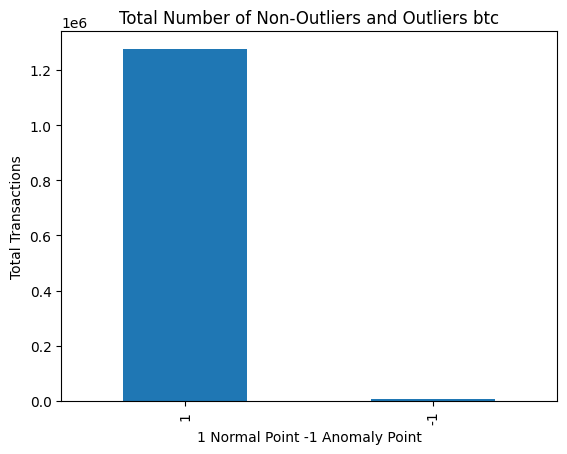

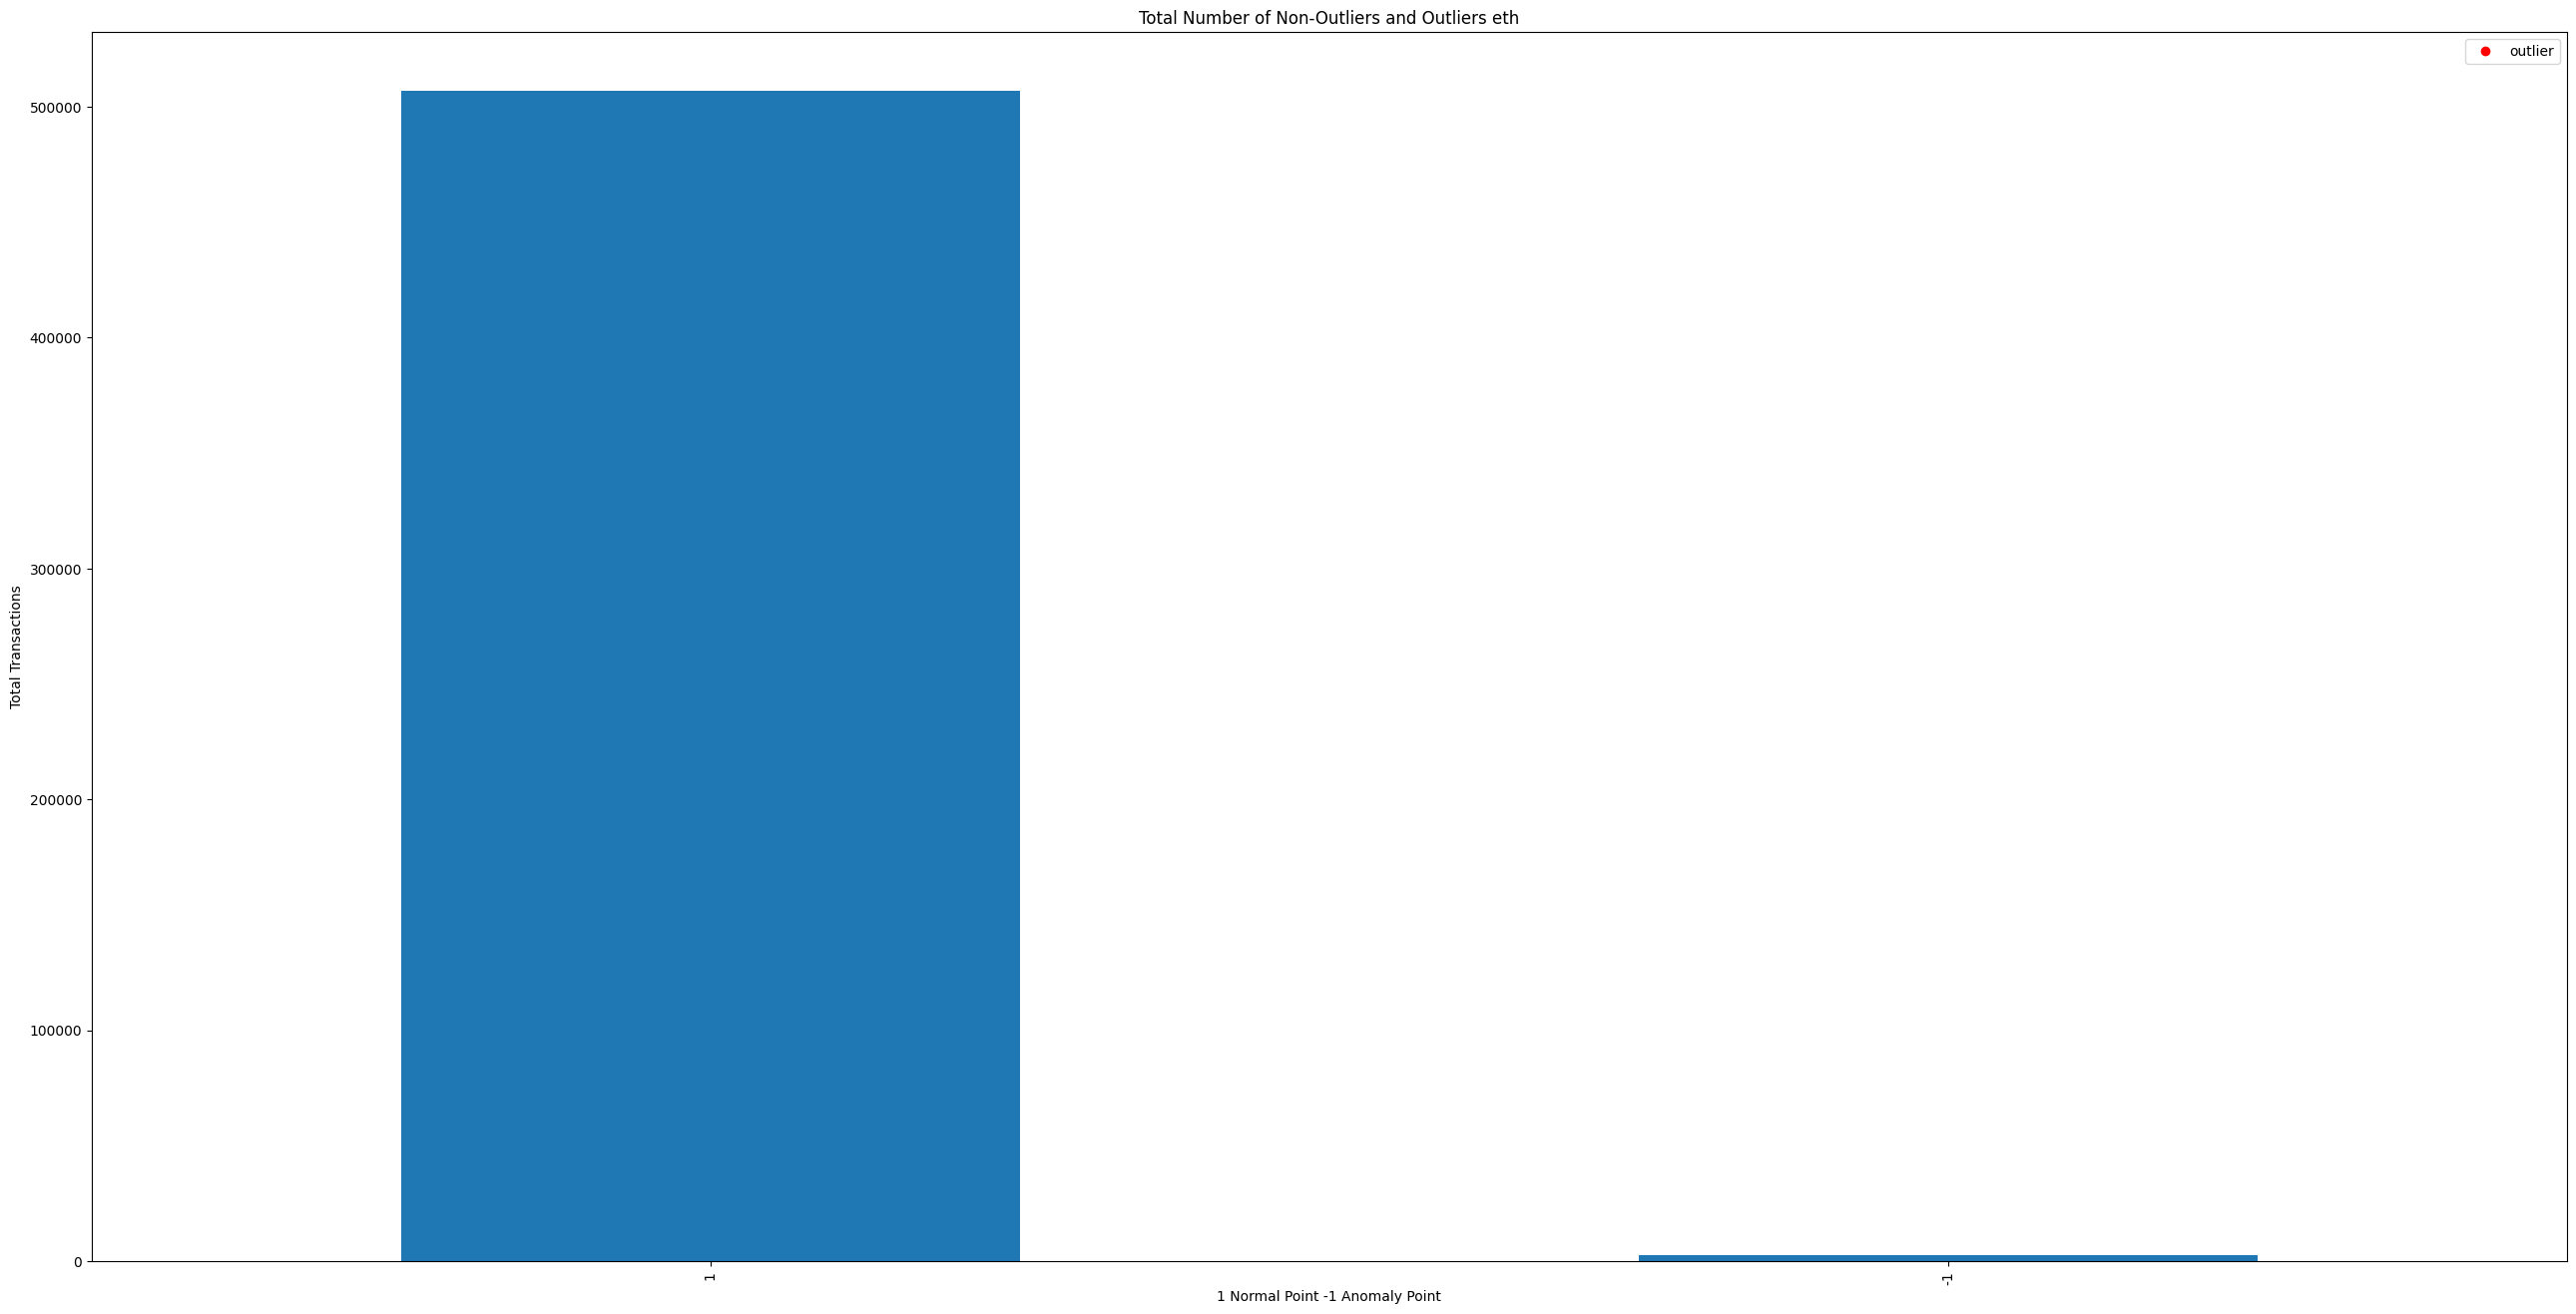

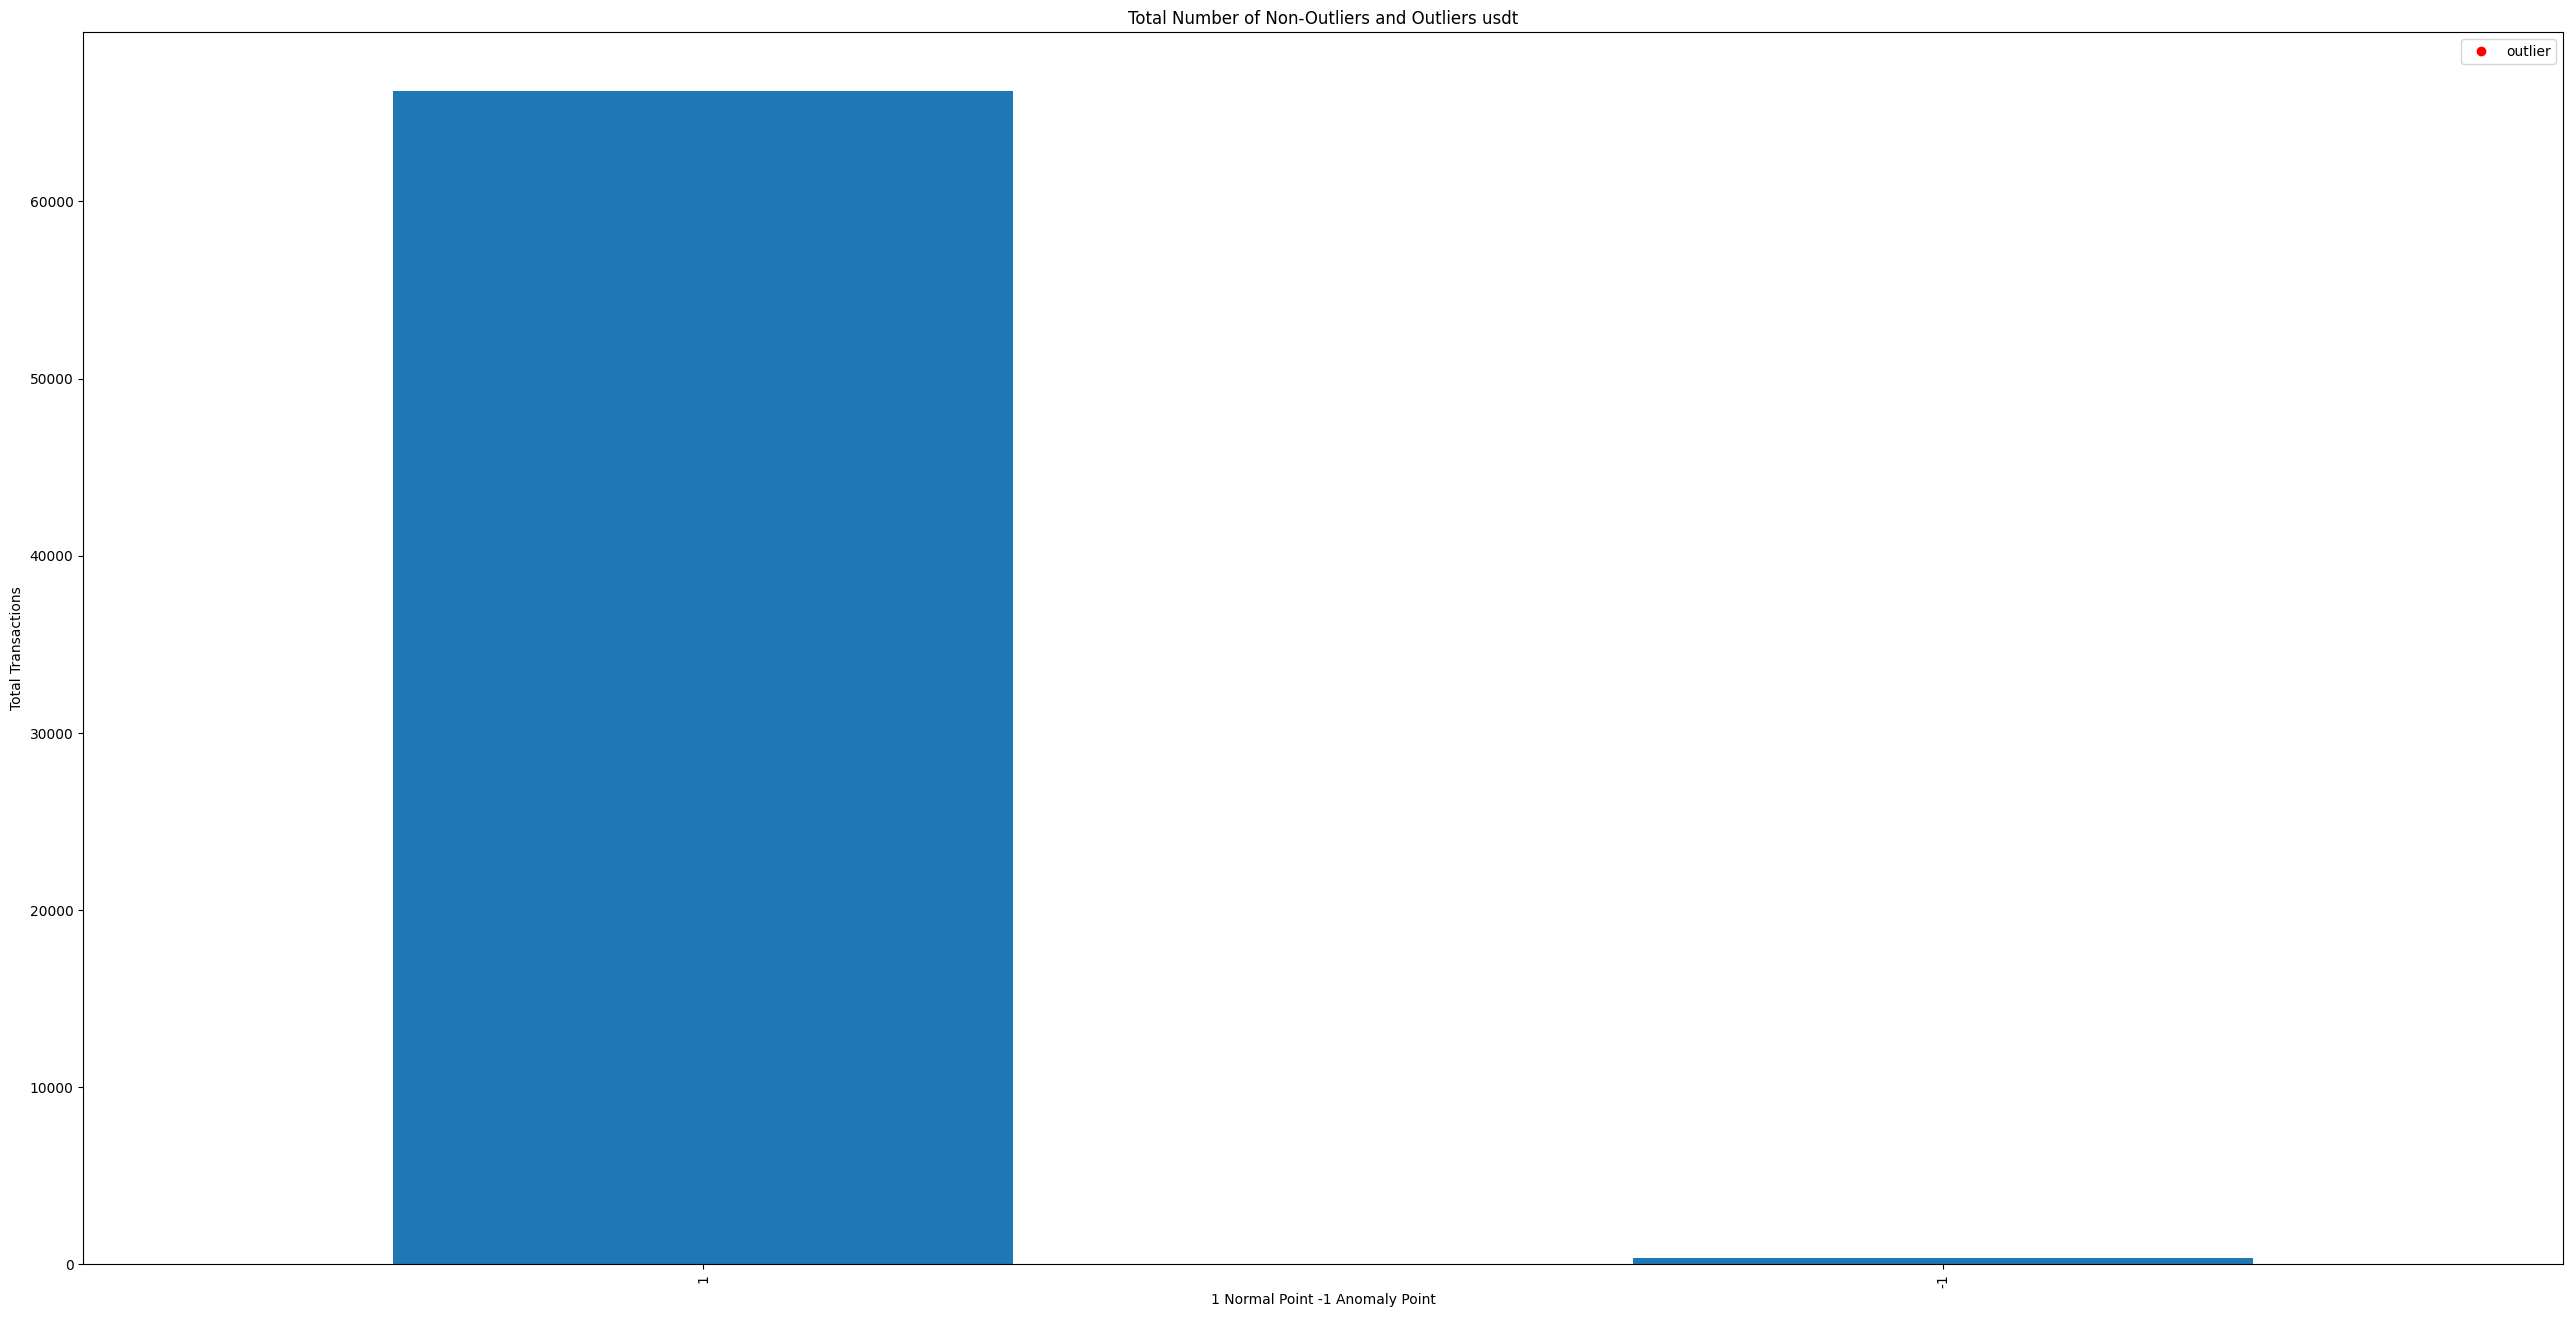

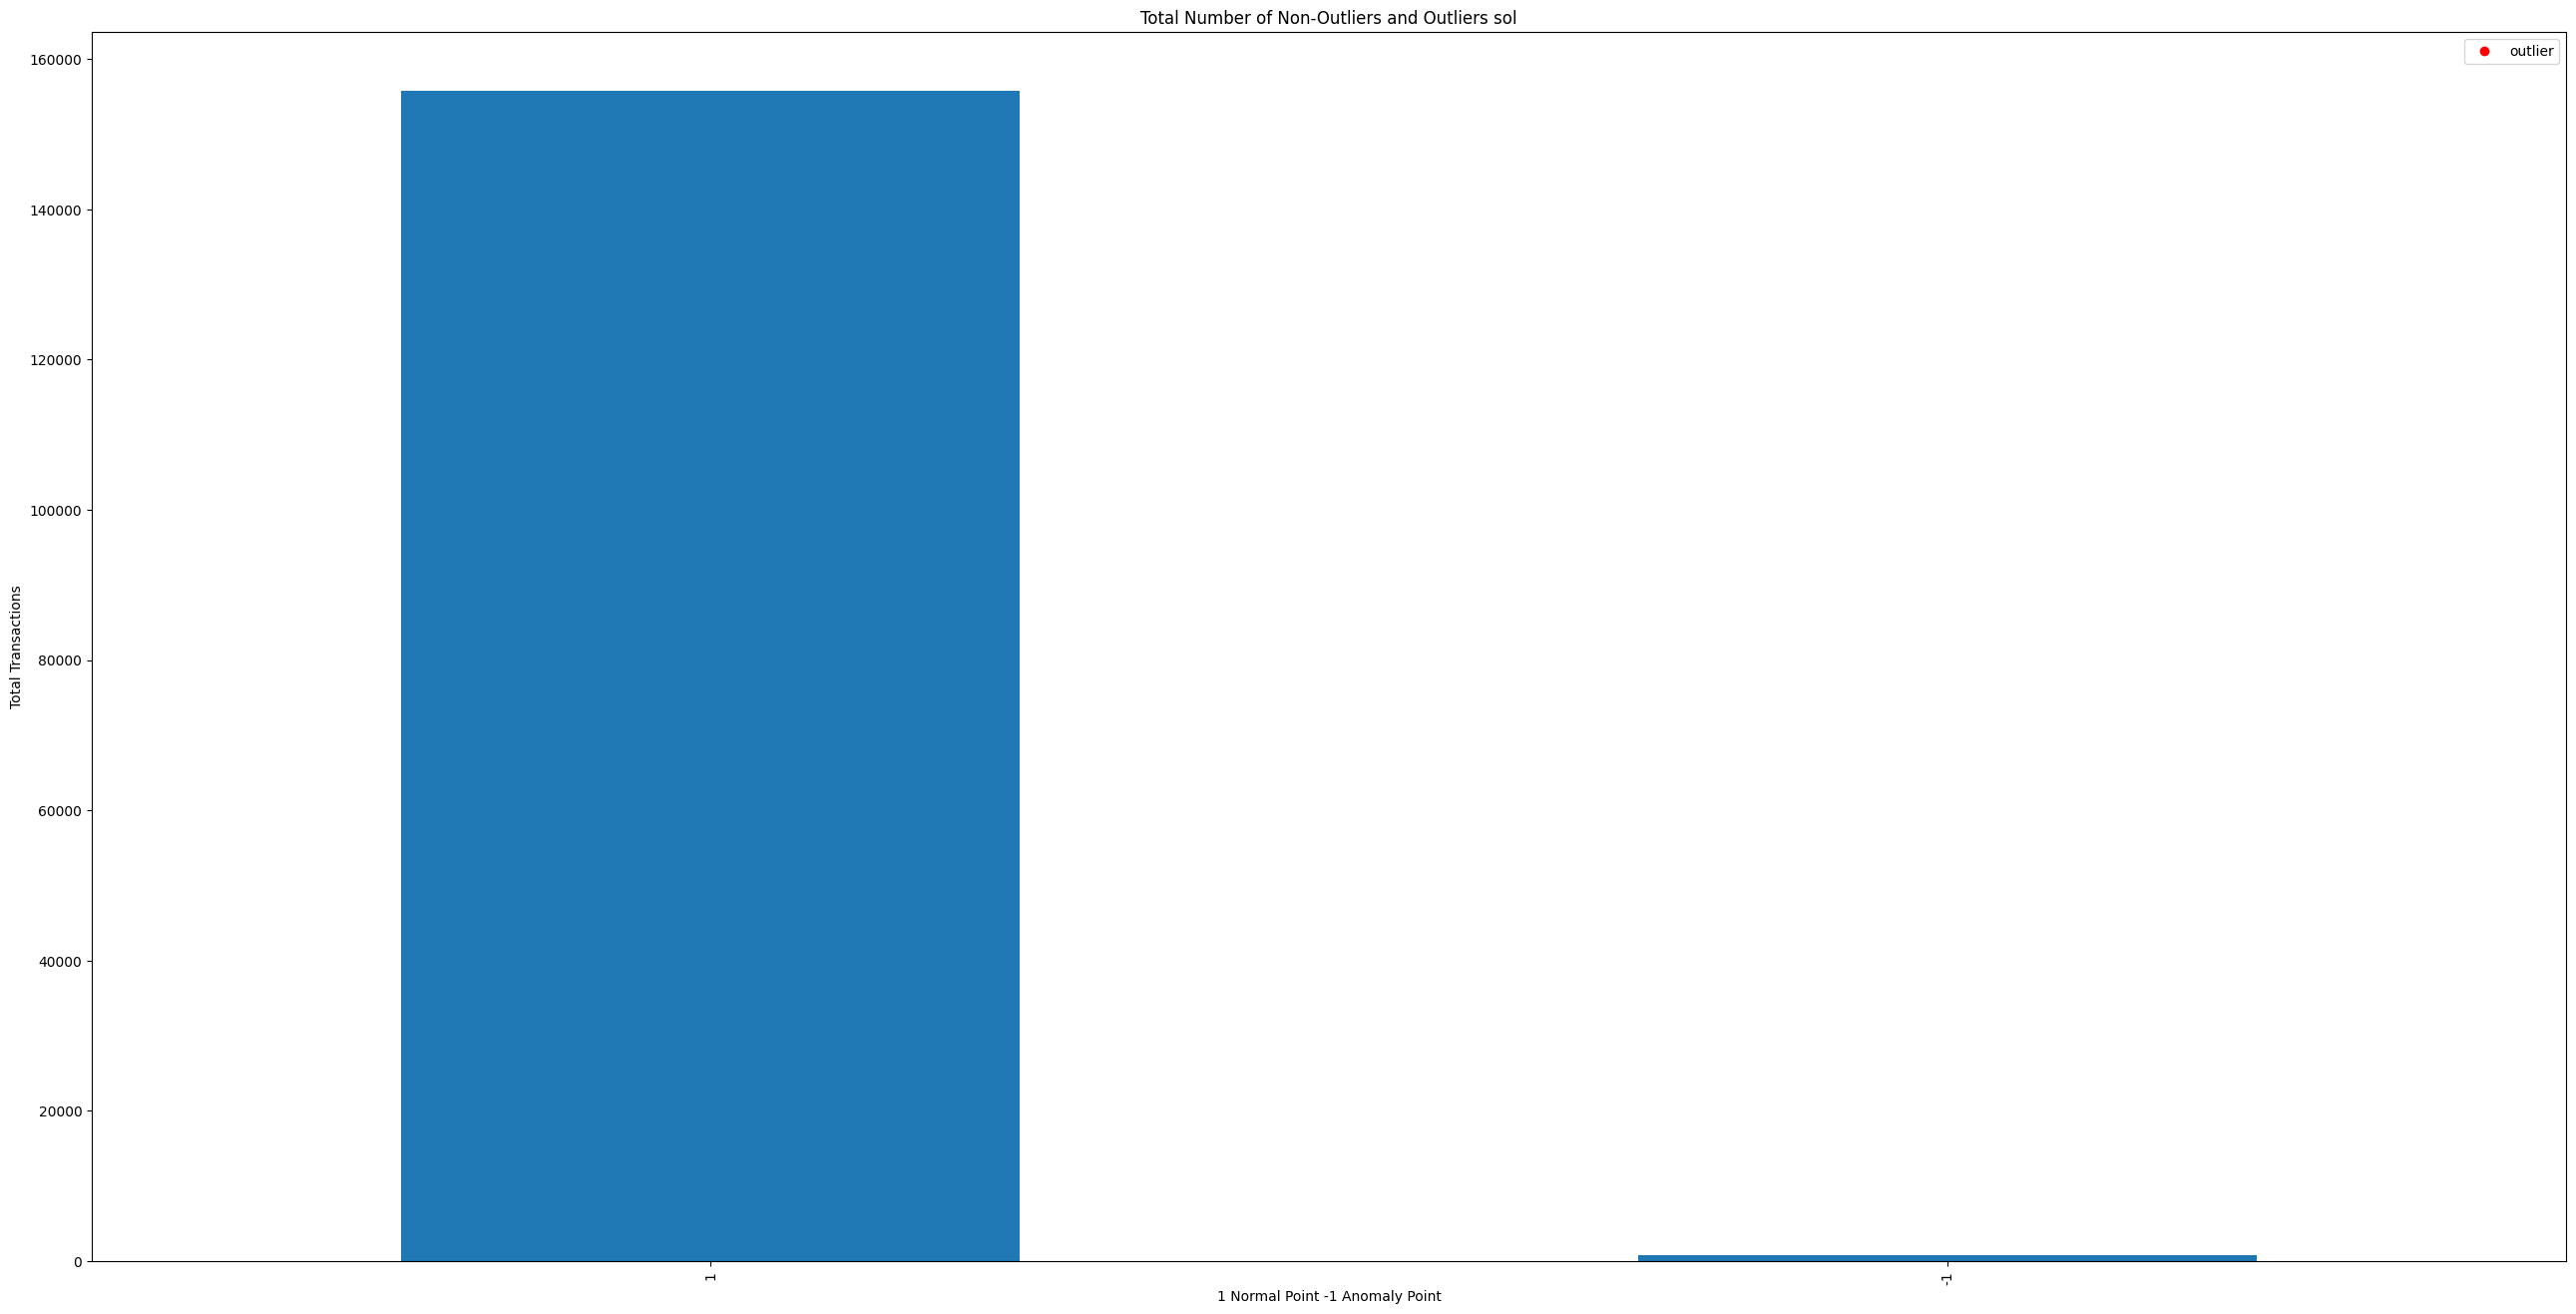

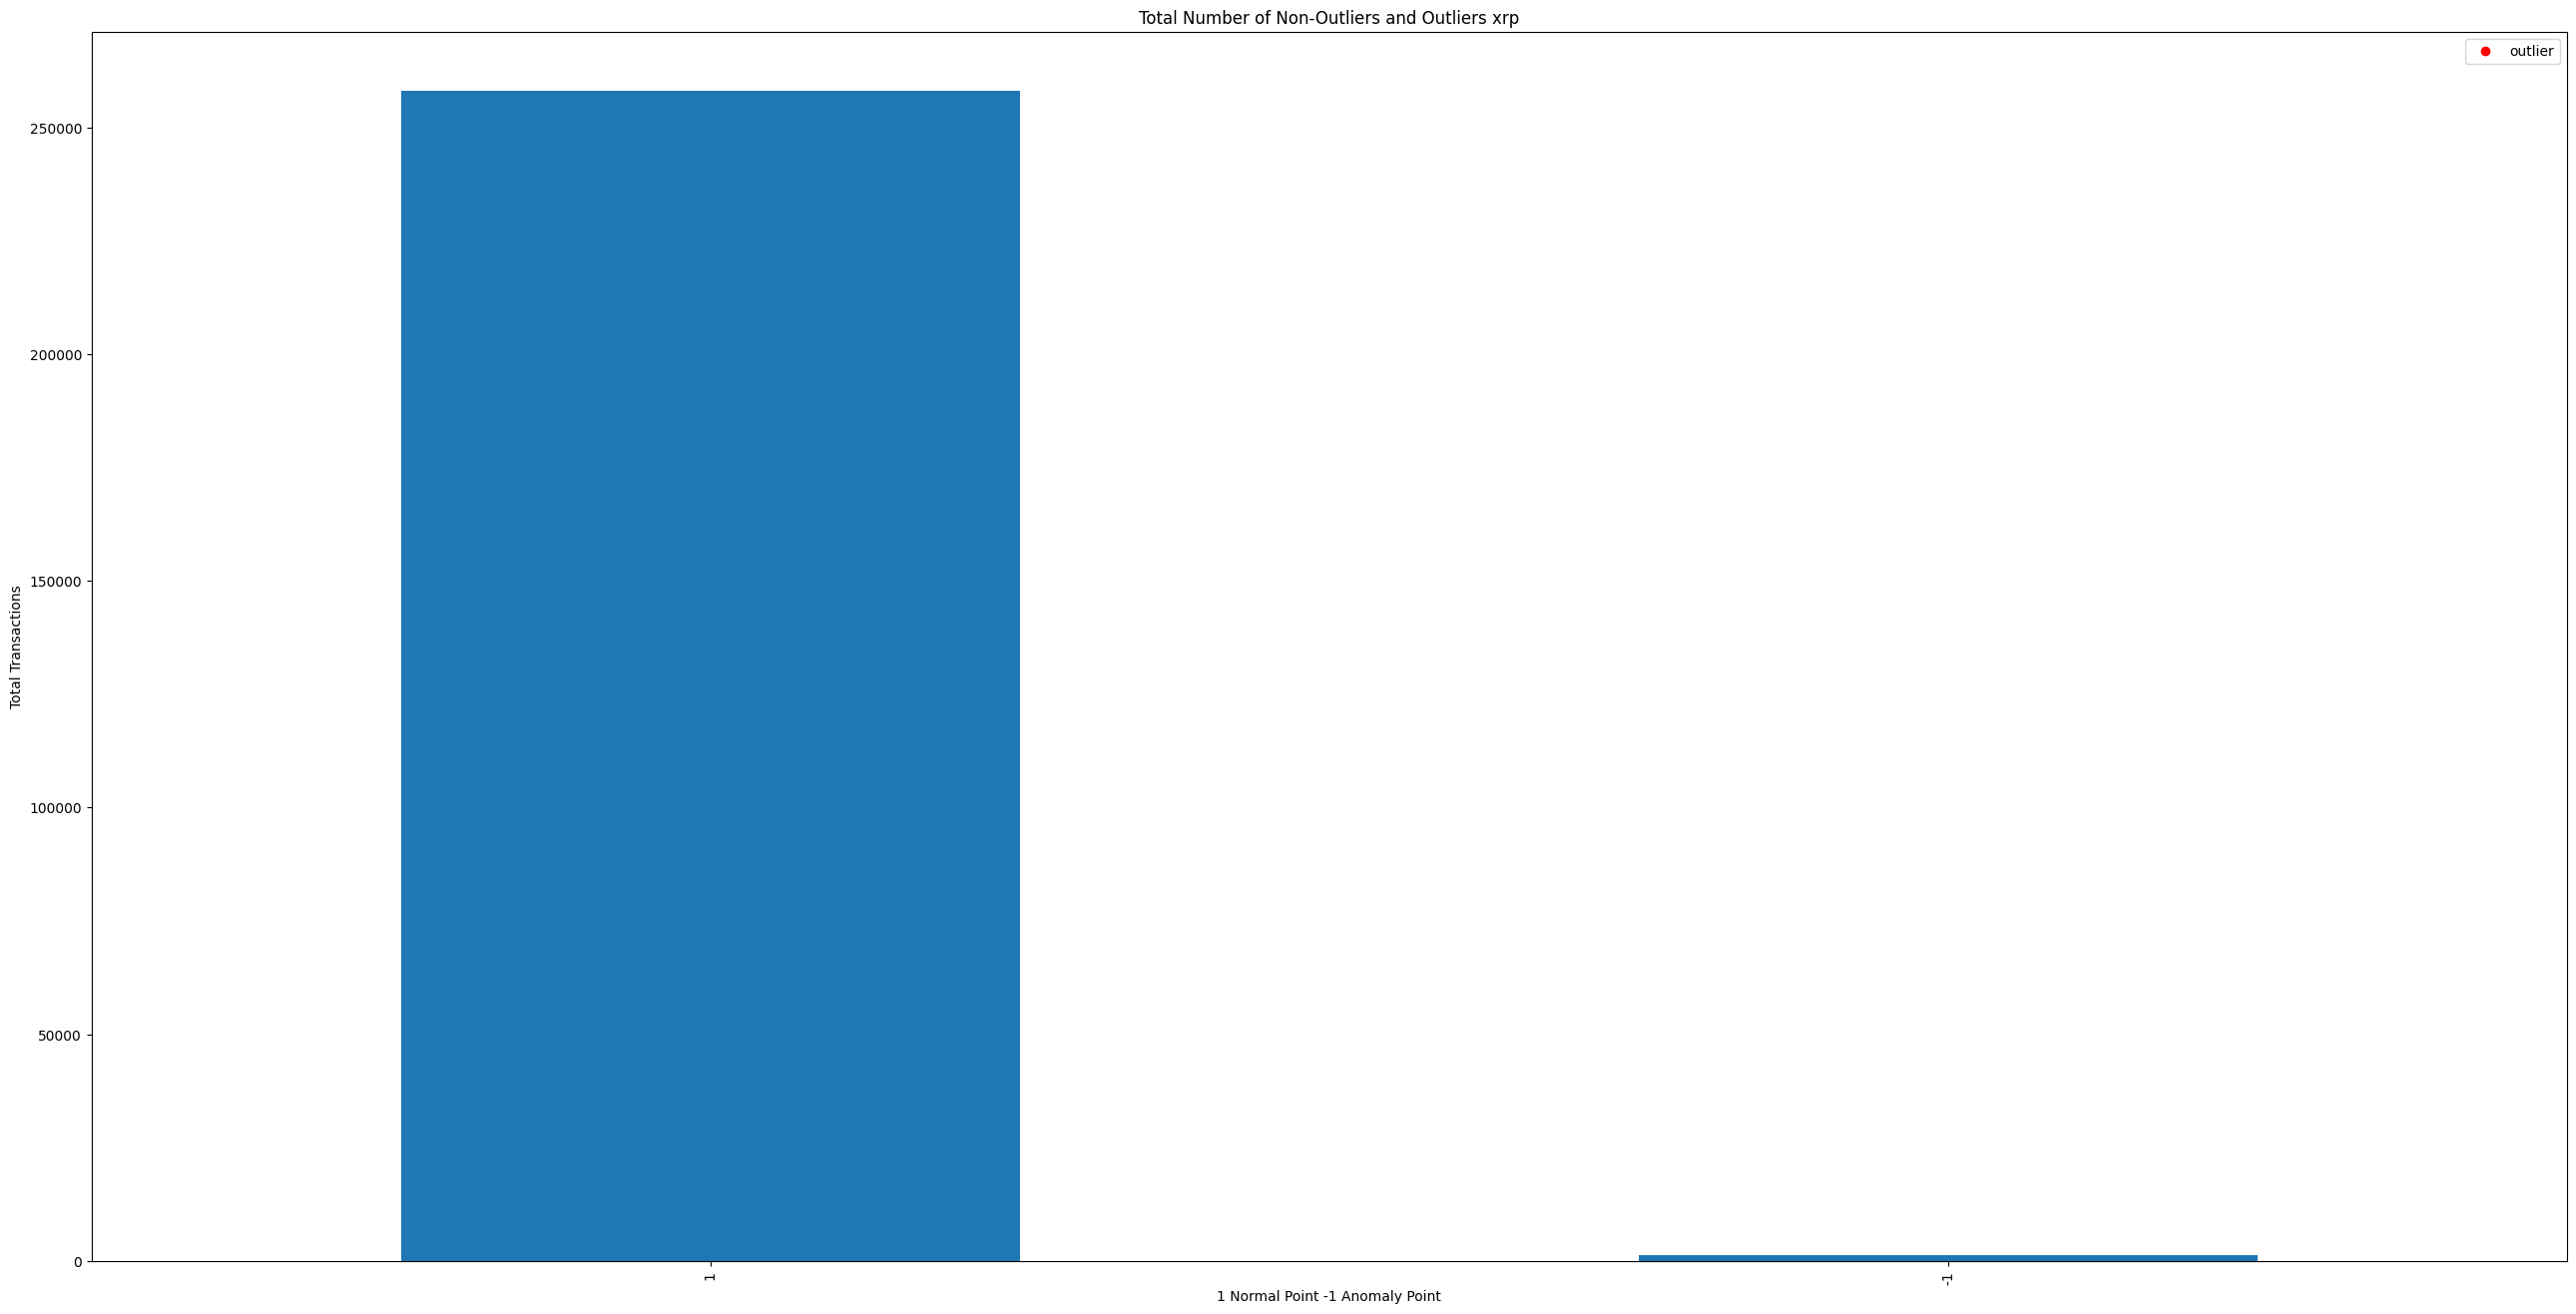

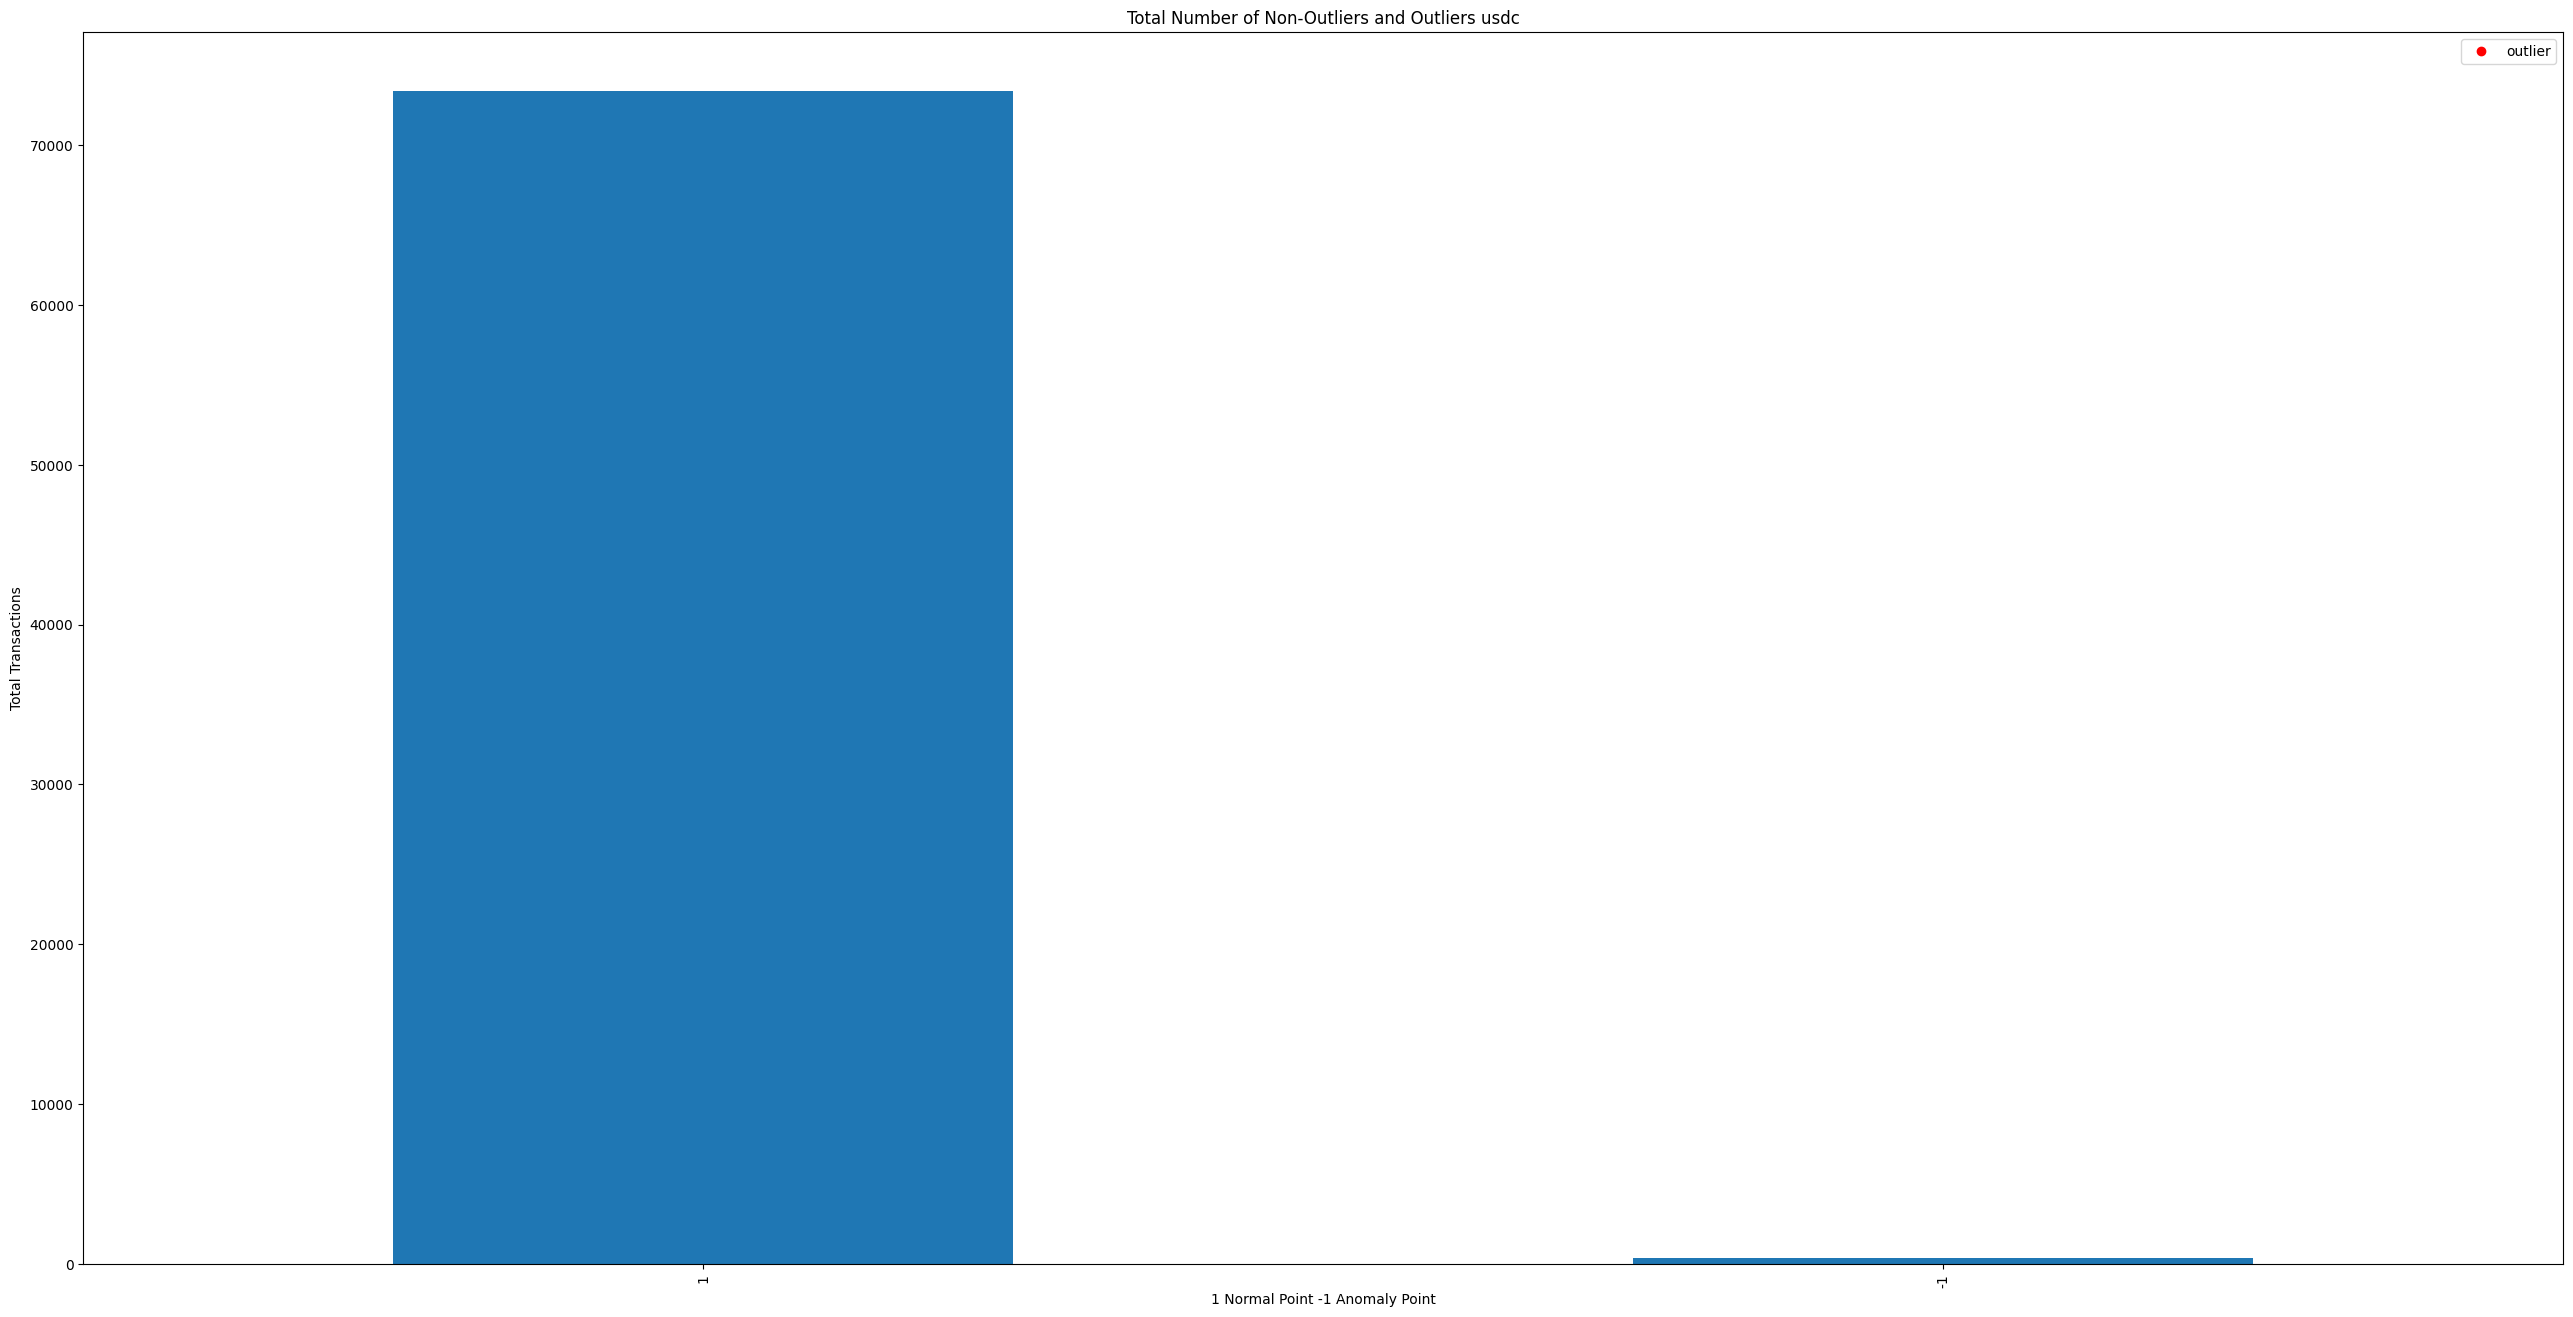

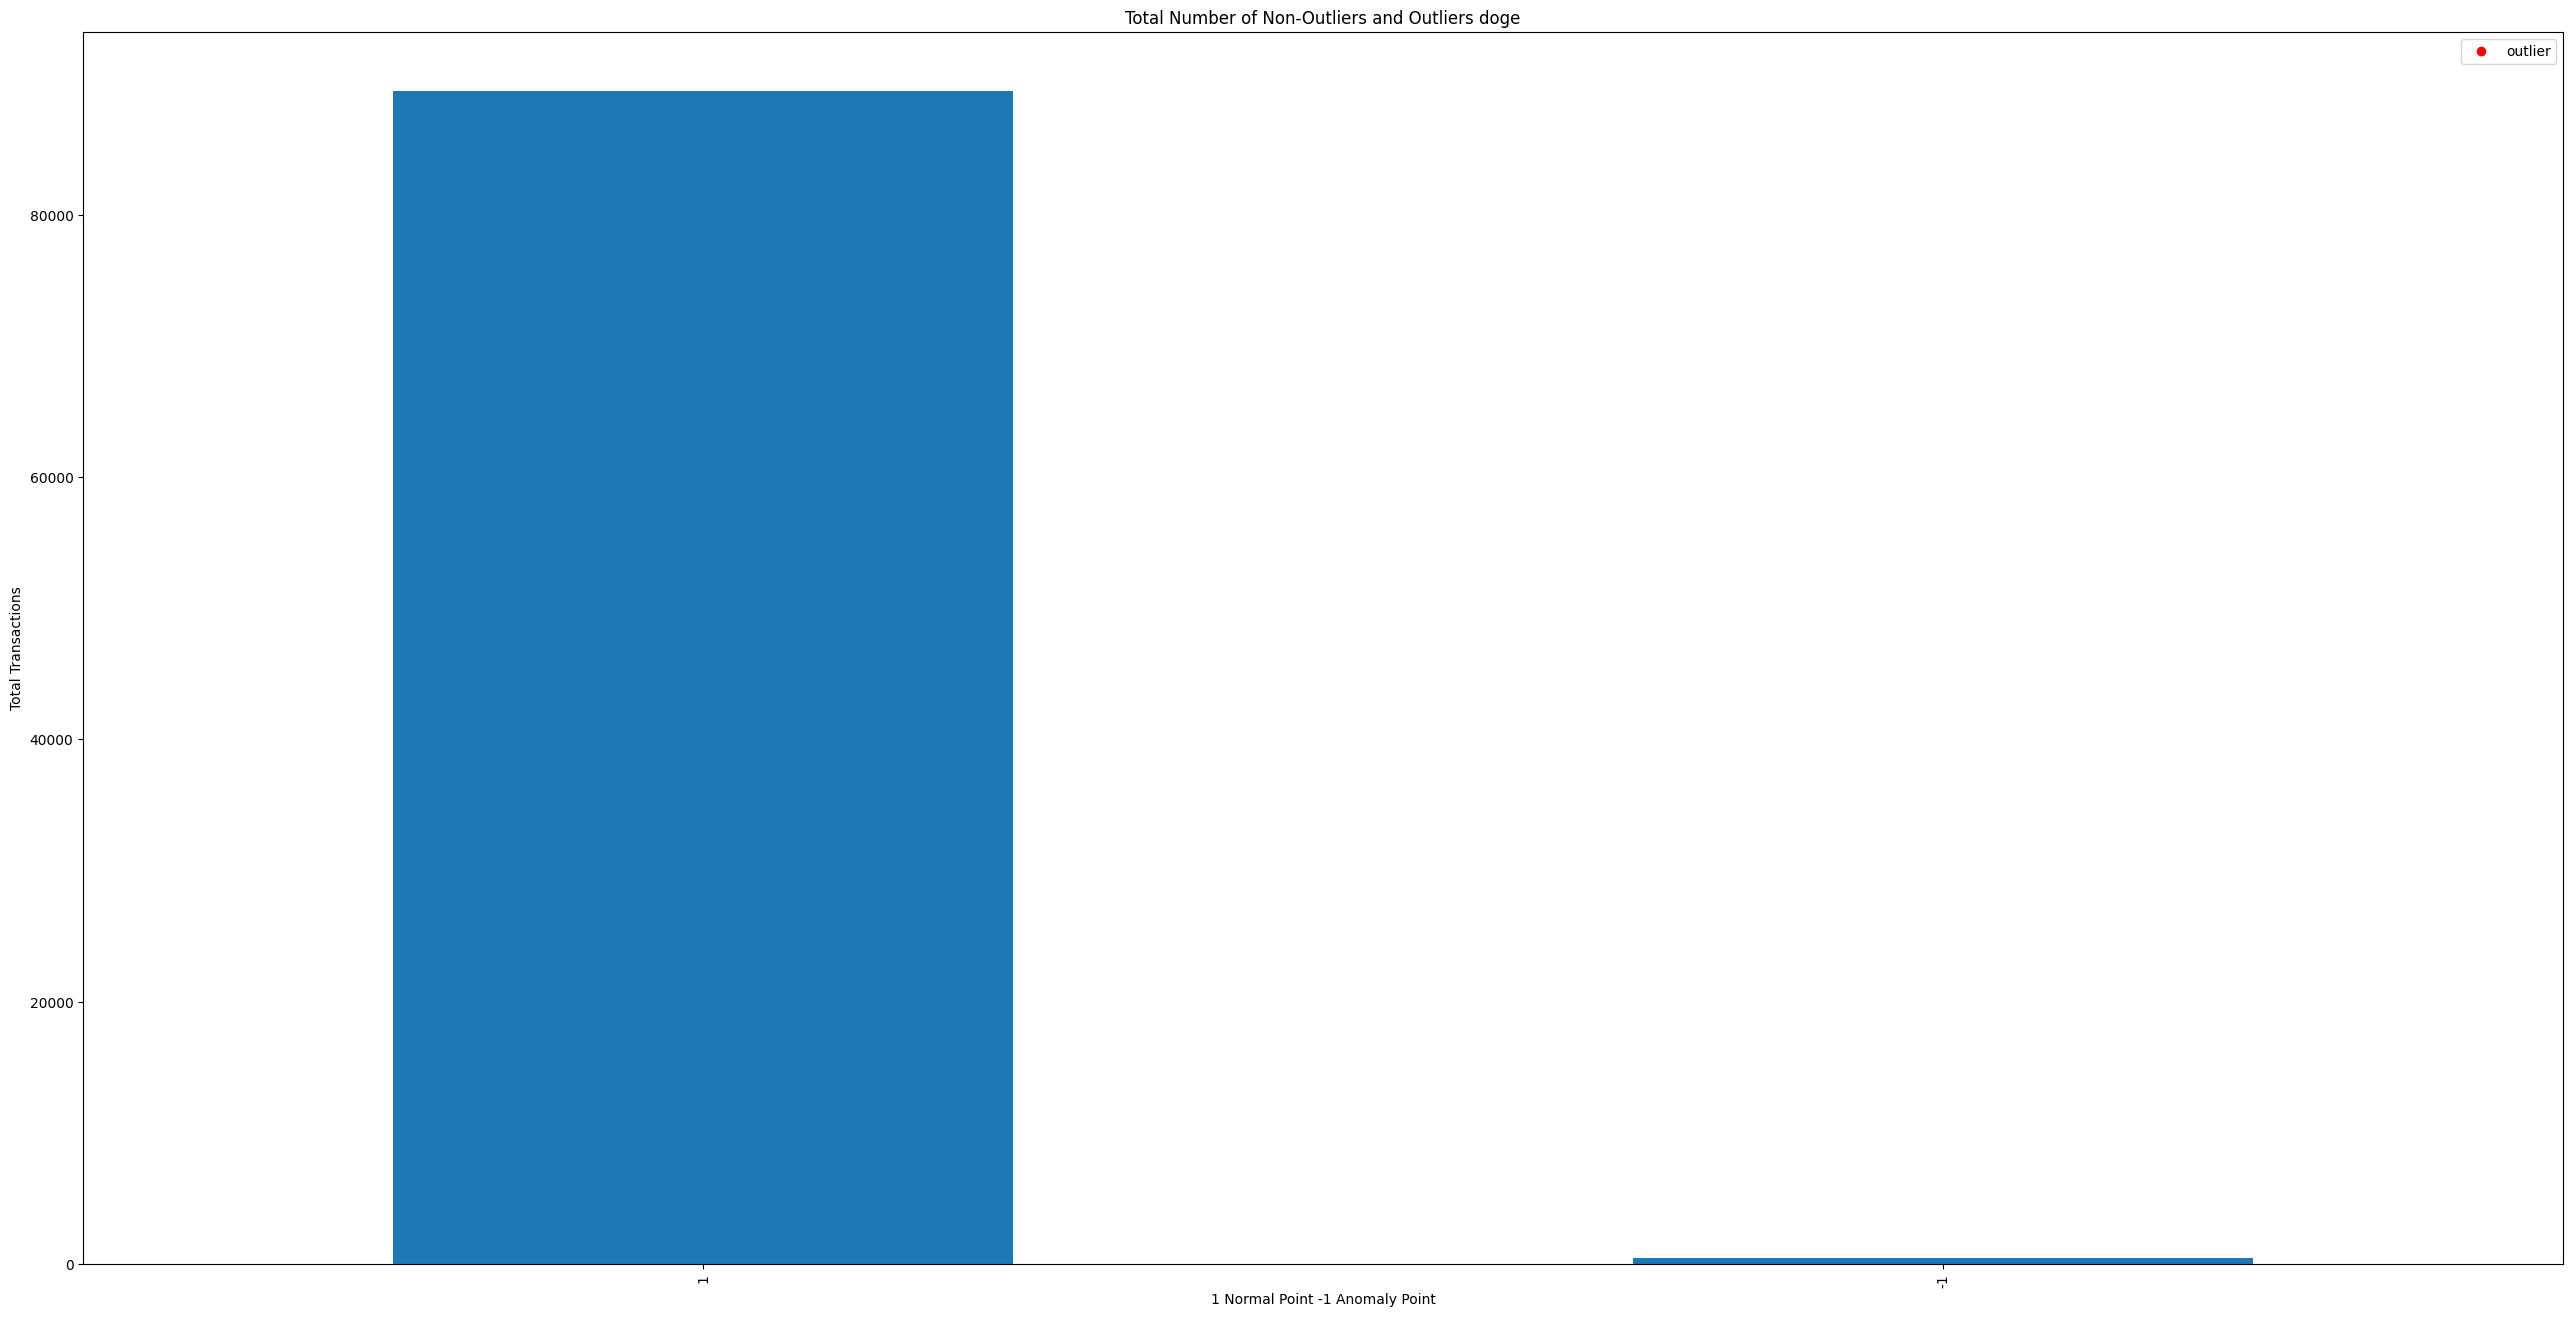

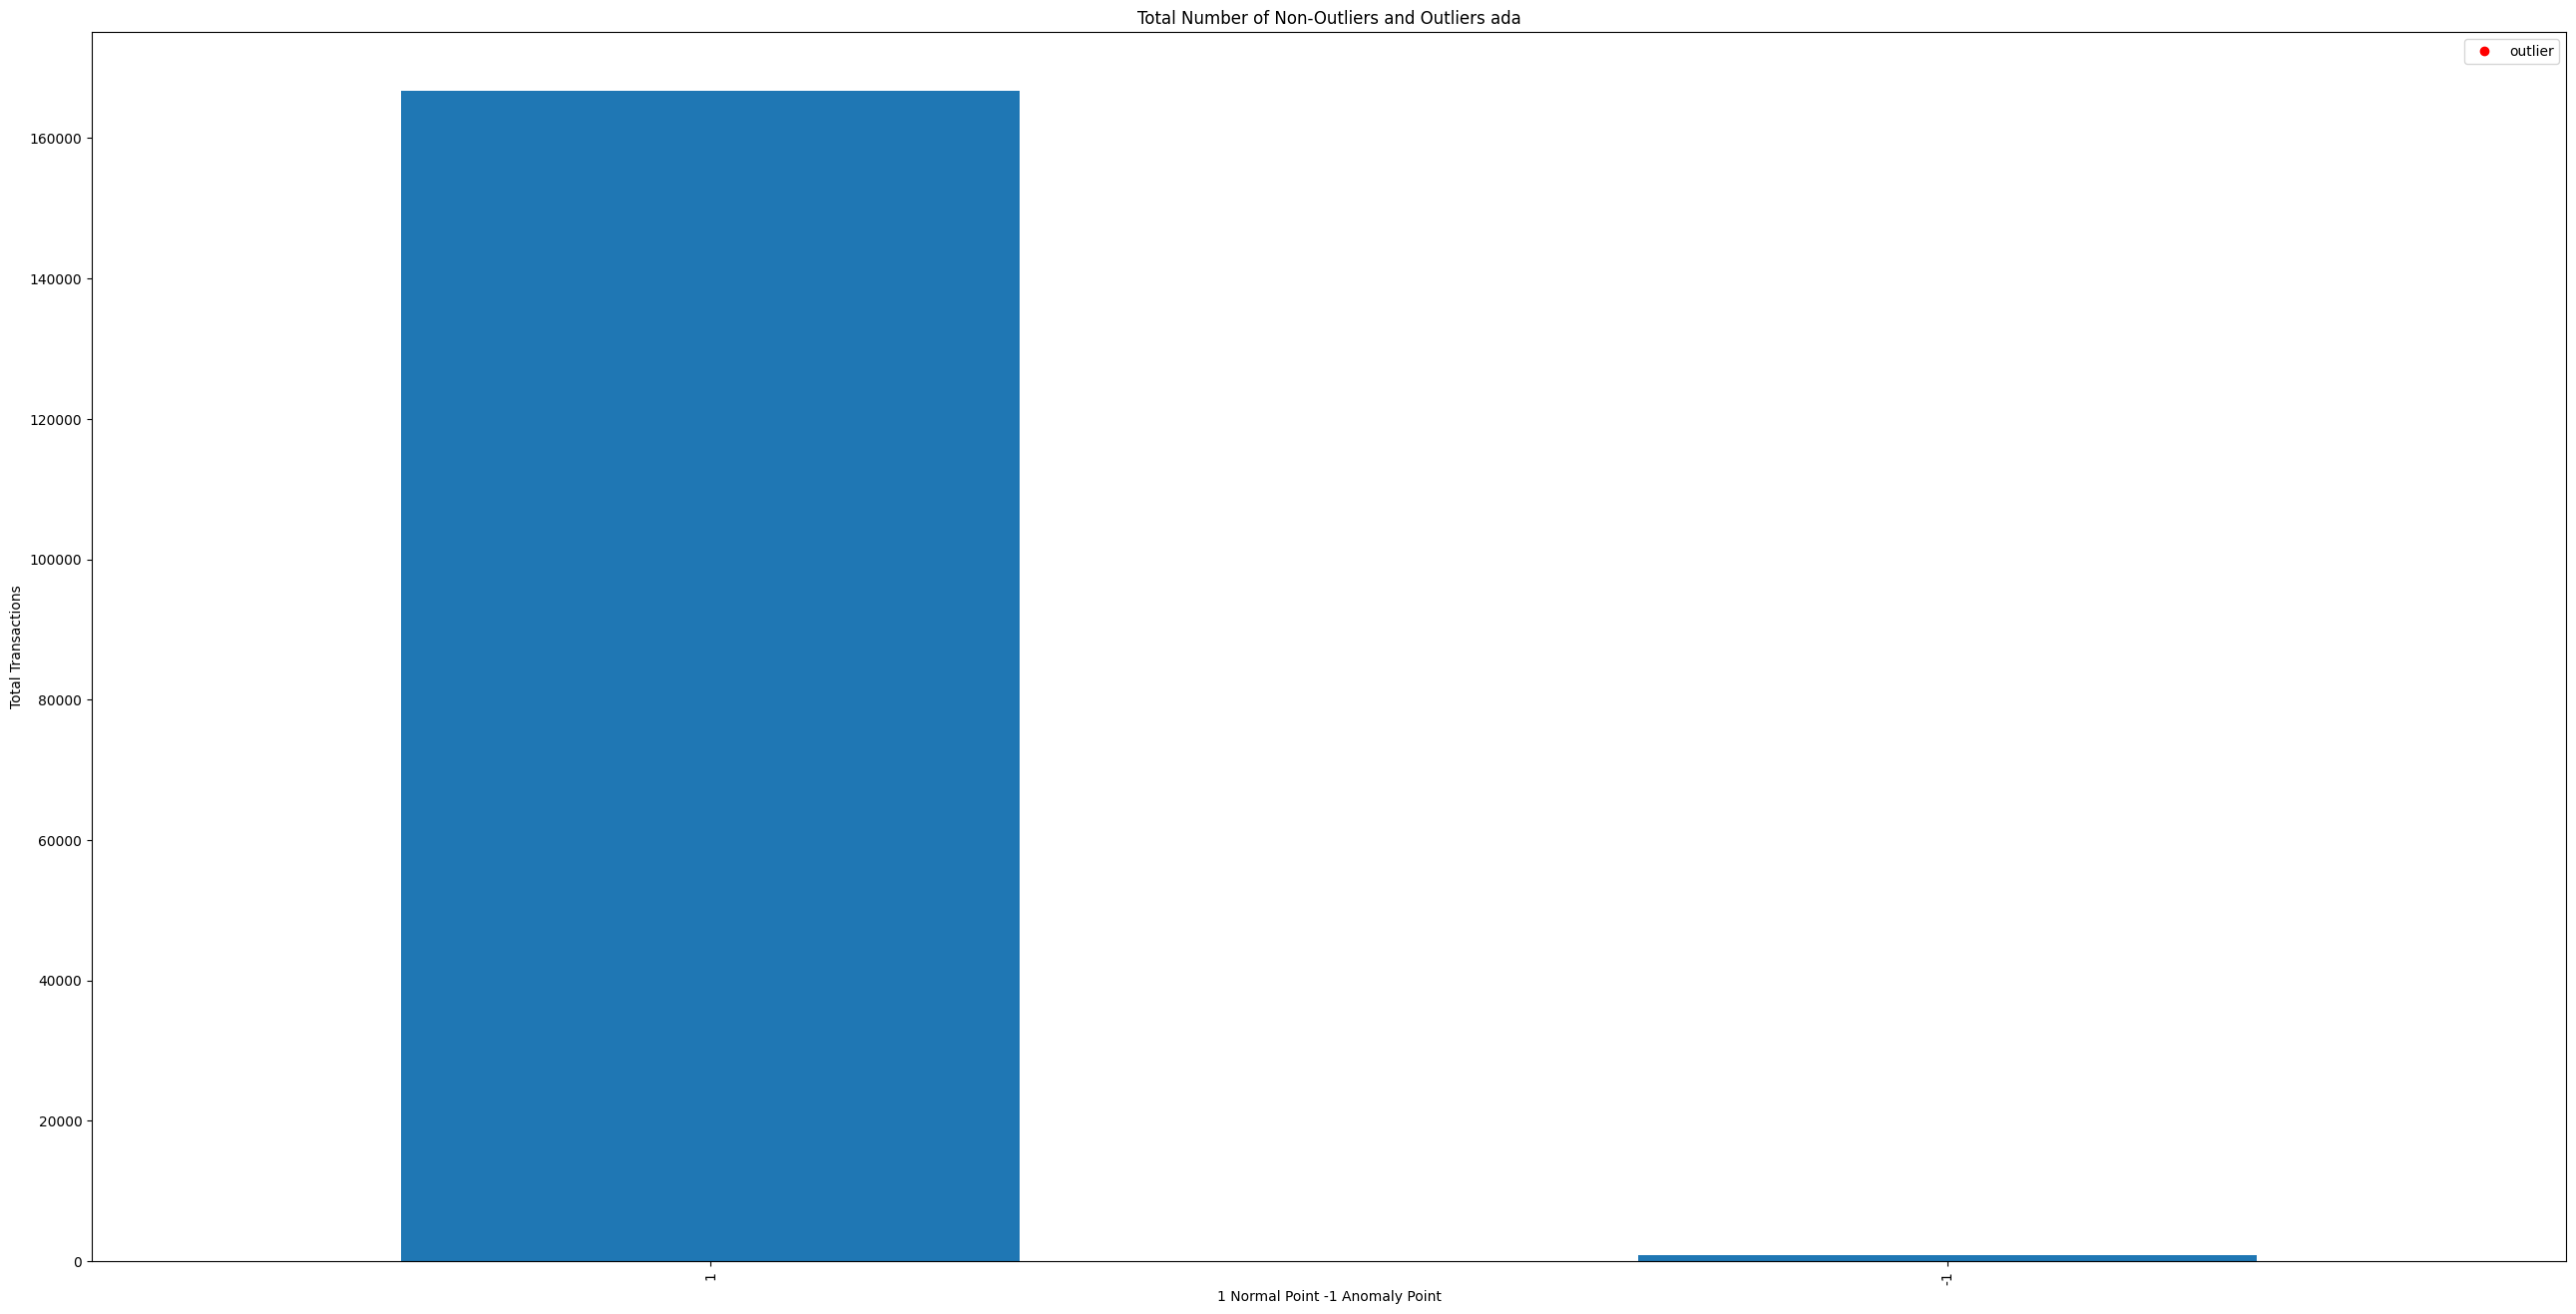

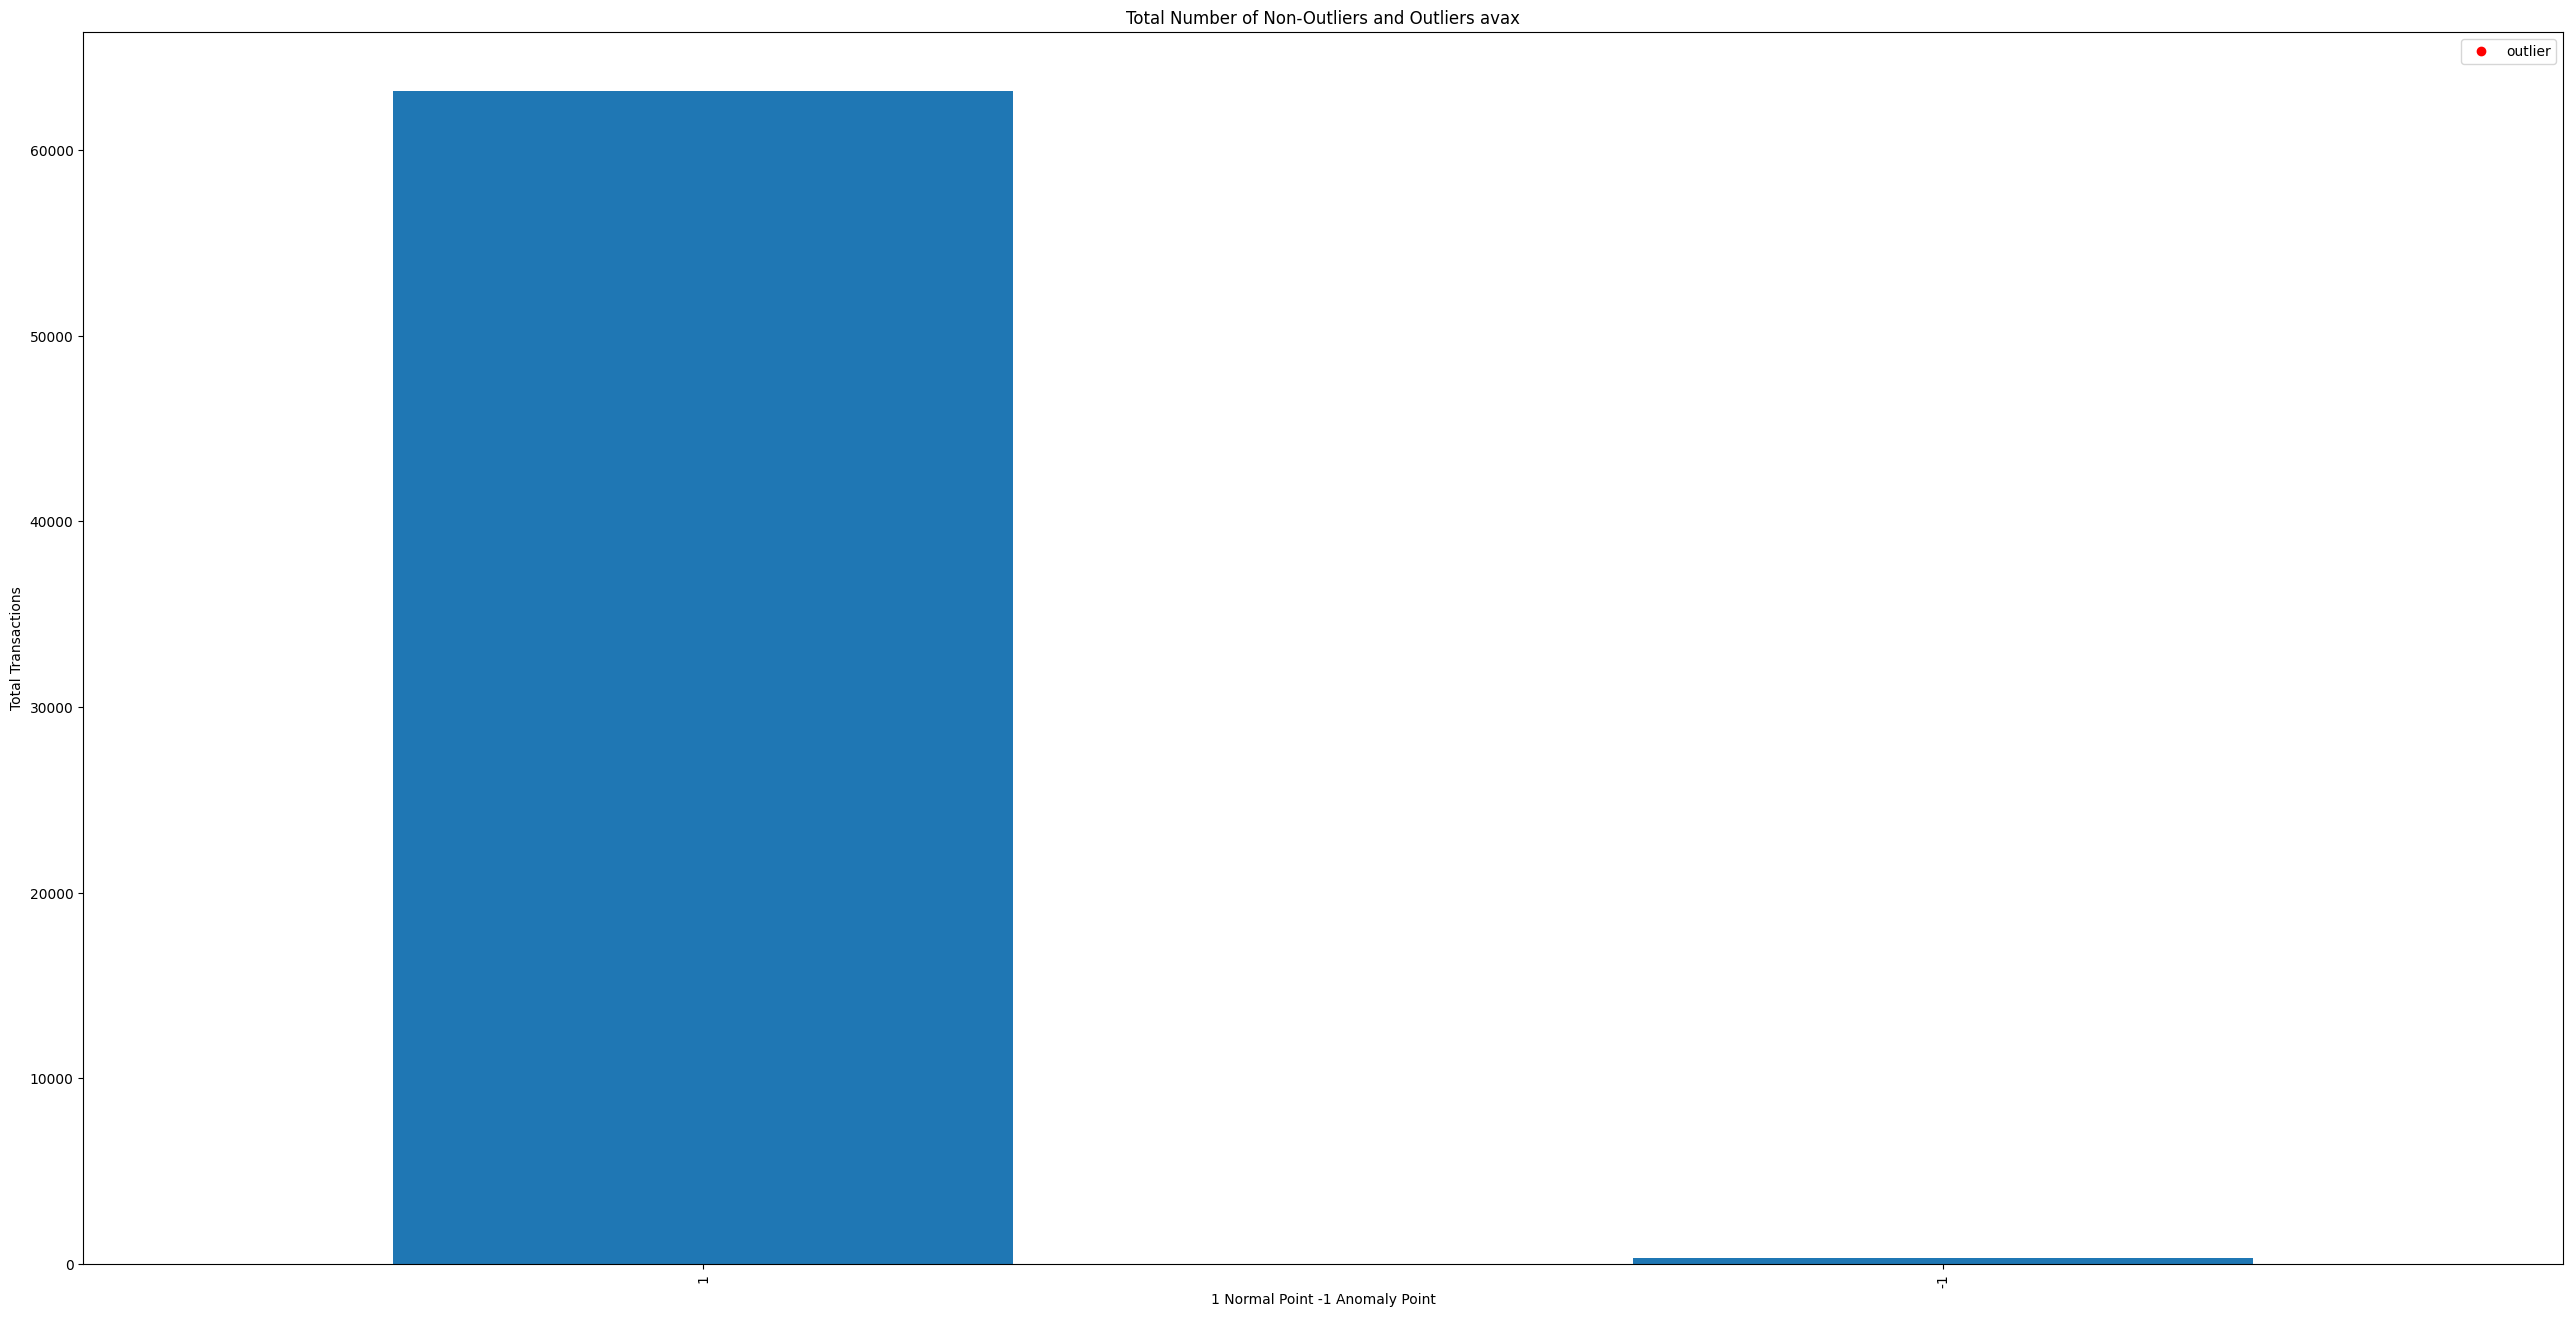

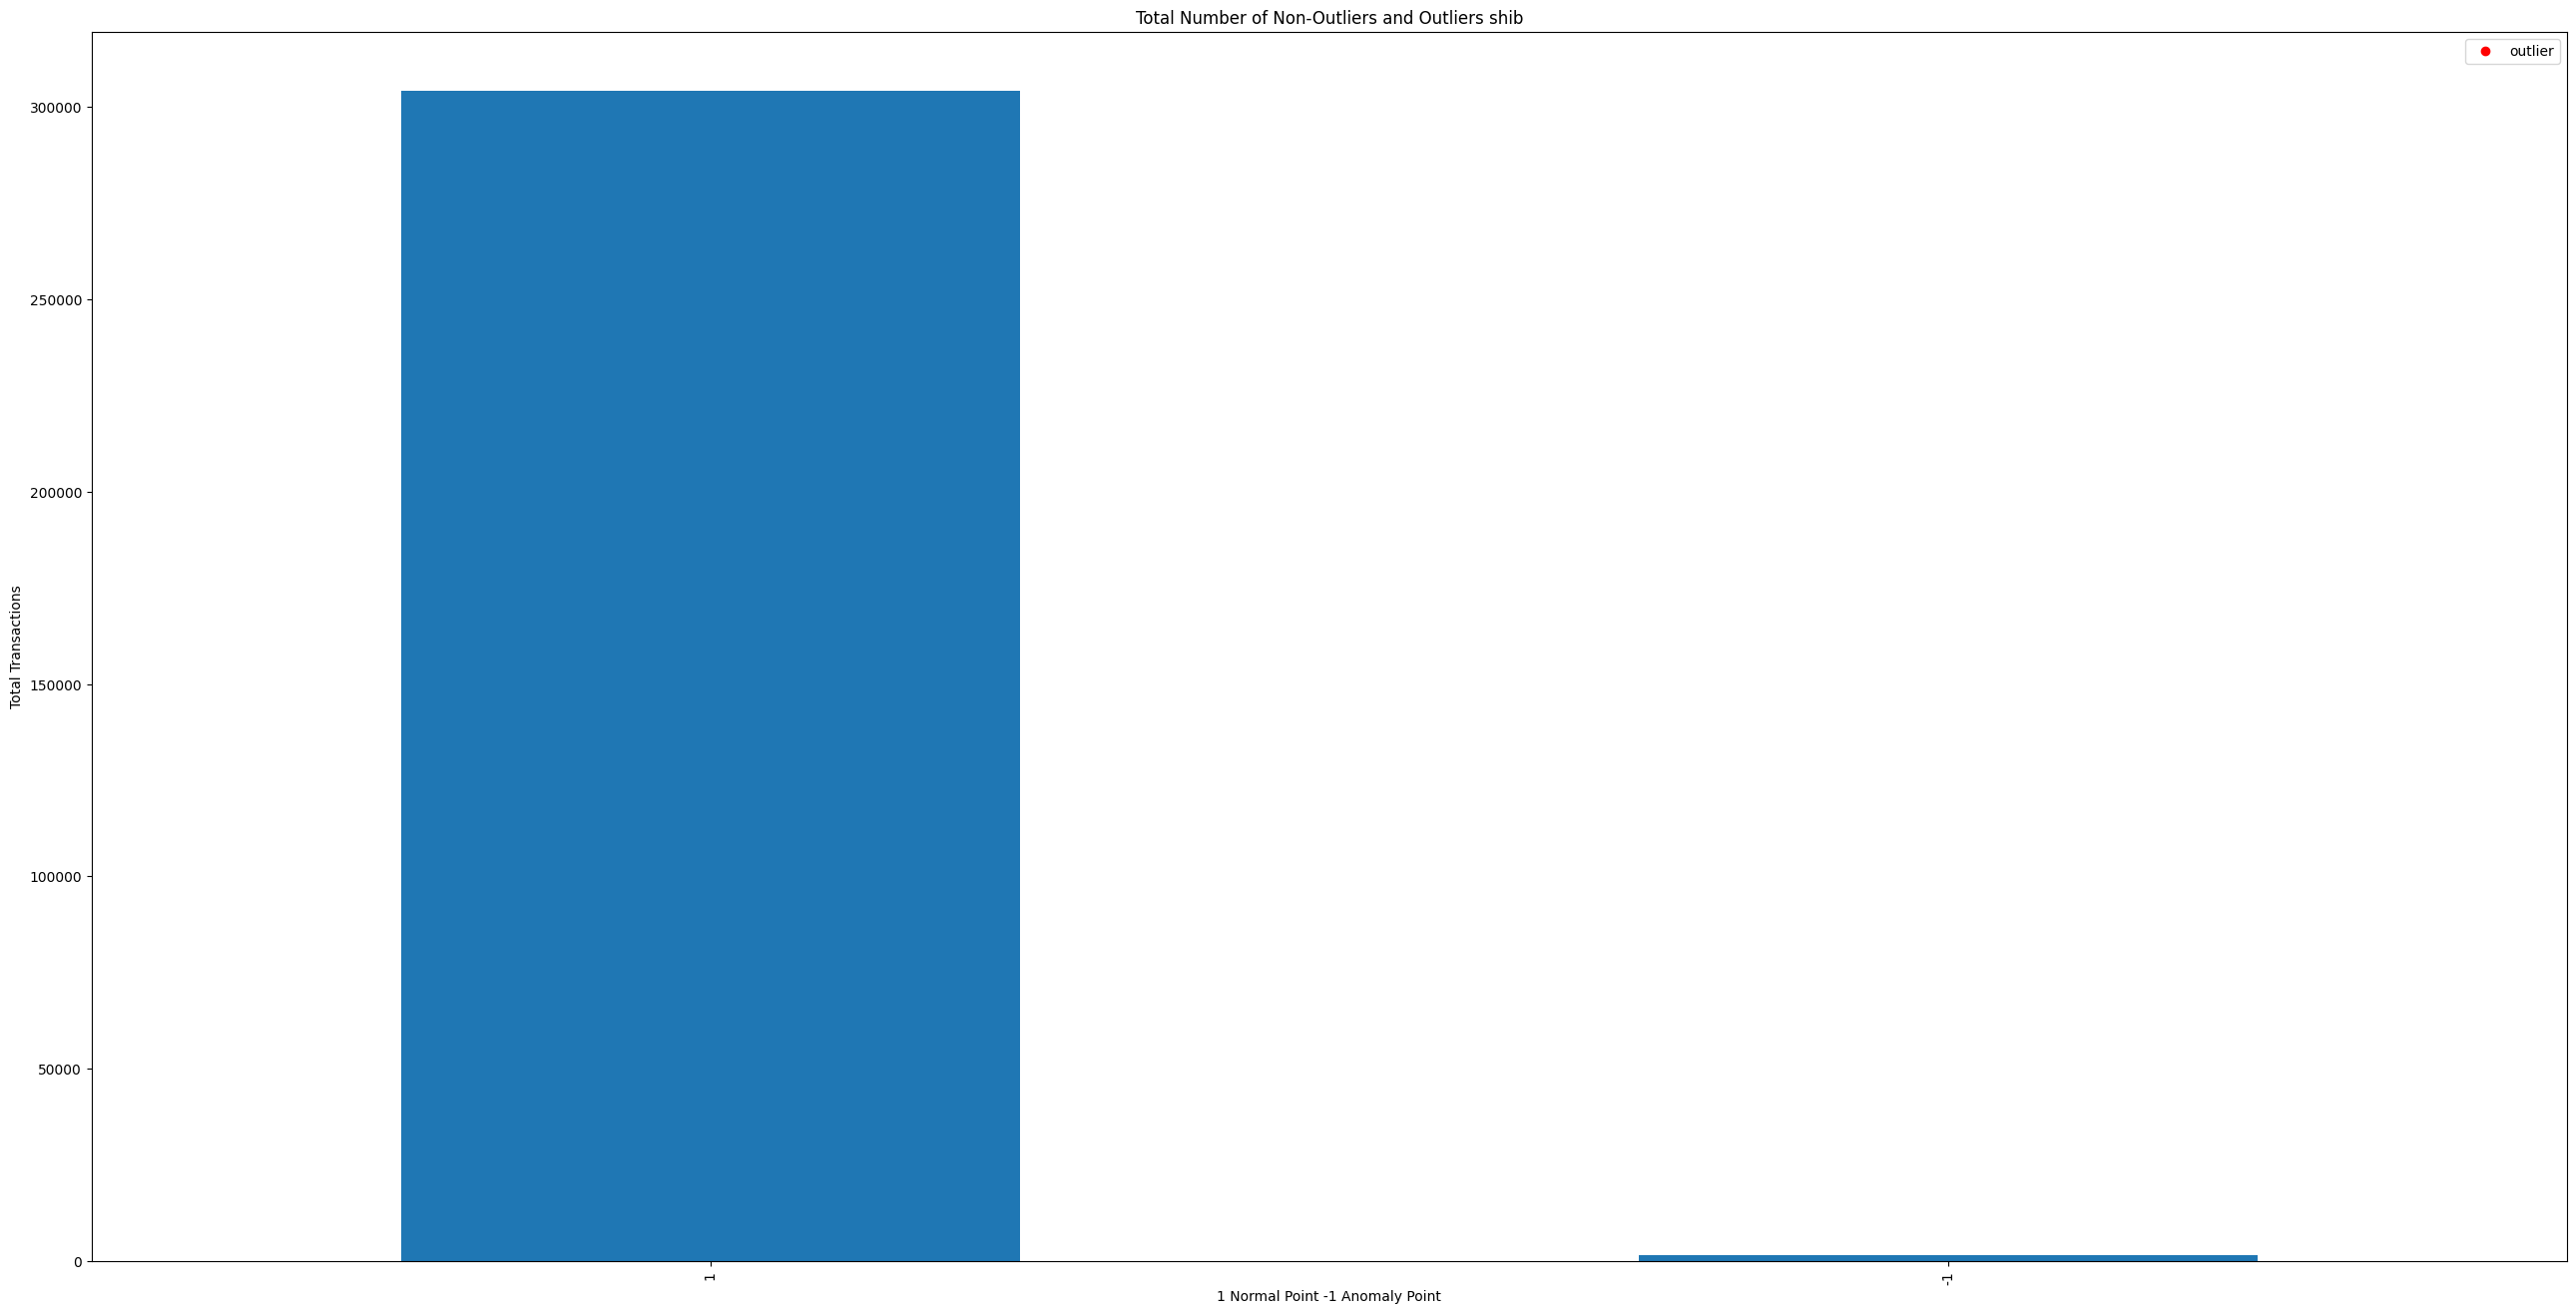

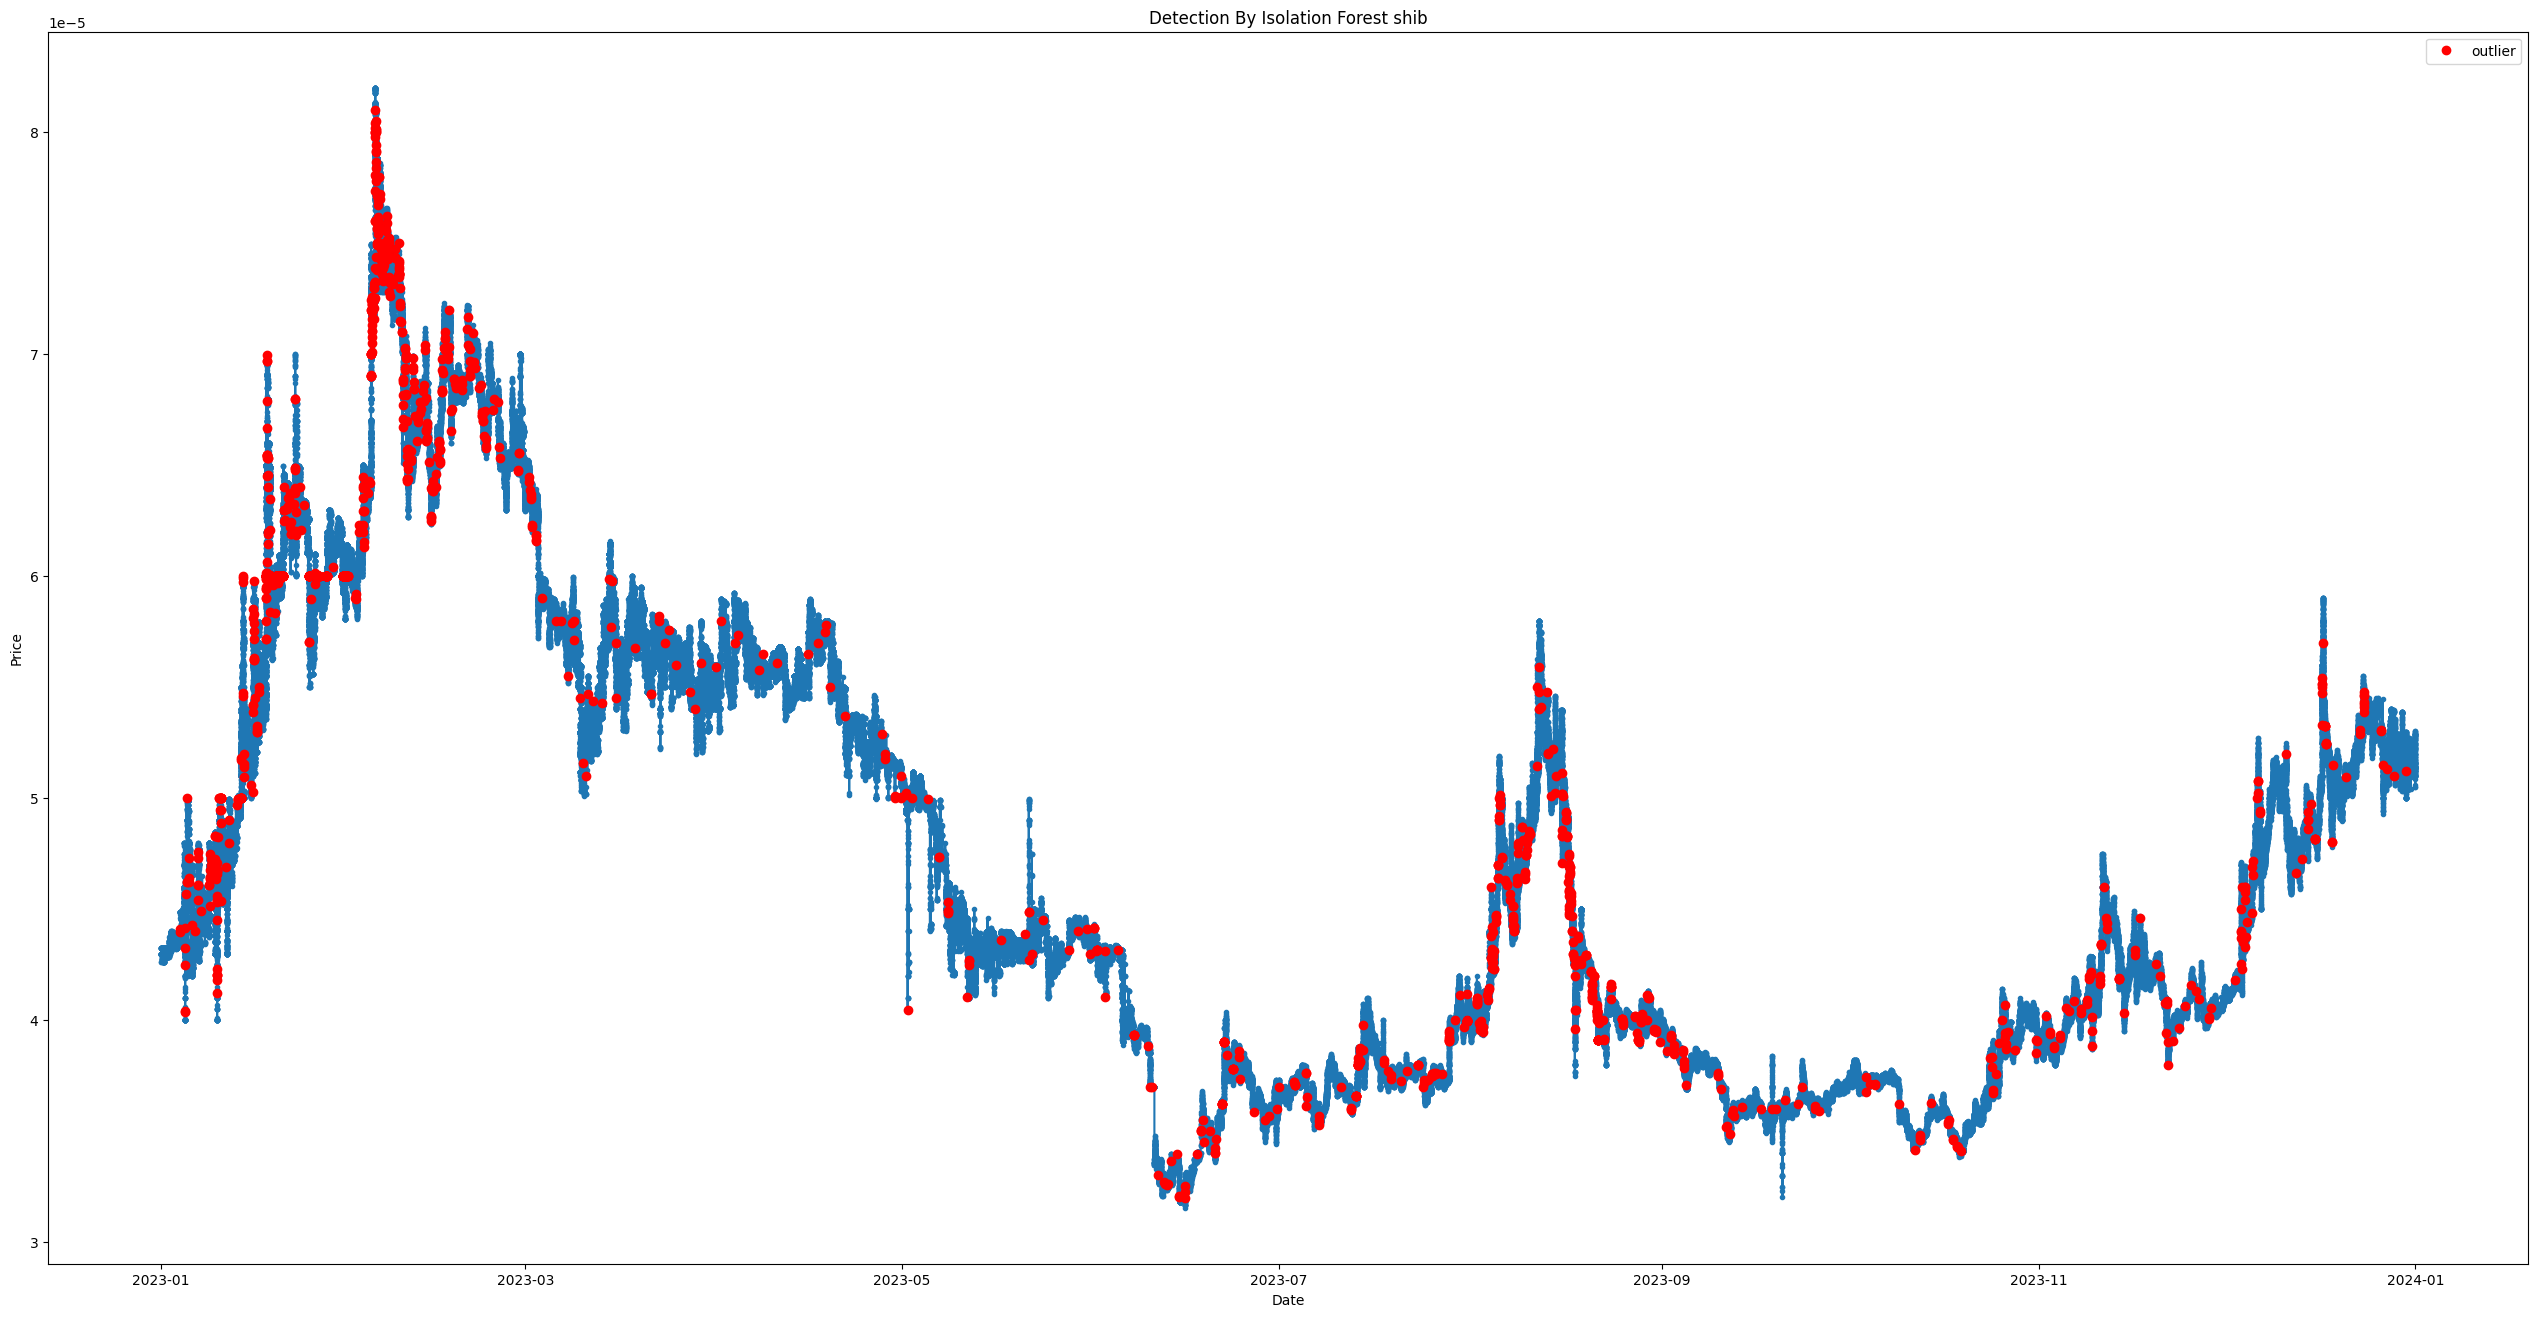

In [230]:
dataset_by_year = dataset_by_time_range(start_date='2023-01-01',
                                        end_date='2023-12-31',
                                        columns=['price', 'amount'])
dataset_by_year['usdt']
plot_figures(dataset_by_year, model, time_range='year')

#### 1 month dataset

In [231]:
#initiate the model with 0.05% contamination

model_month = IsolationForest(
    n_estimators=1_000,
    max_samples='auto',
    contamination=float(0.0005),
    random_state=139,
    n_jobs=-1
)

Total Number of Non-Outliers and Outliers btc:  anomaly_value
 1    142261
-1        68
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers eth:  anomaly_value
 1    59881
-1       30
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers usdt:  anomaly_value
 1    8086
-1       5
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers sol:  anomaly_value
 1    34863
-1       18
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers xrp:  anomaly_value
 1    23246
-1       12
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers usdc:  anomaly_value
 1    7278
-1       4
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers doge:  anomaly_value
 1    11796
-1        6
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers ada:  anomaly_value
 1    22195
-1       12
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers avax:  anomaly_value
 1    19836
-1       10
Name: count, dty

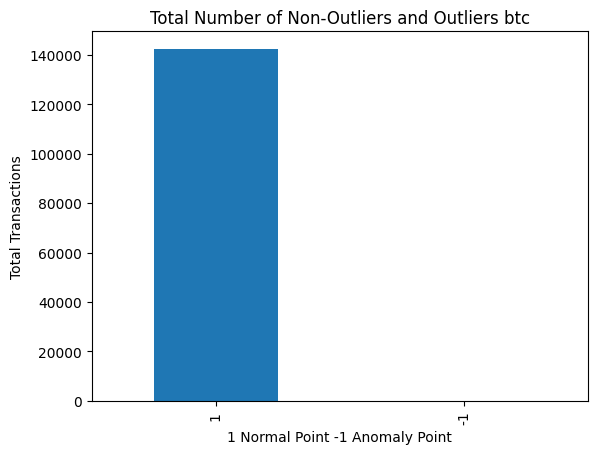

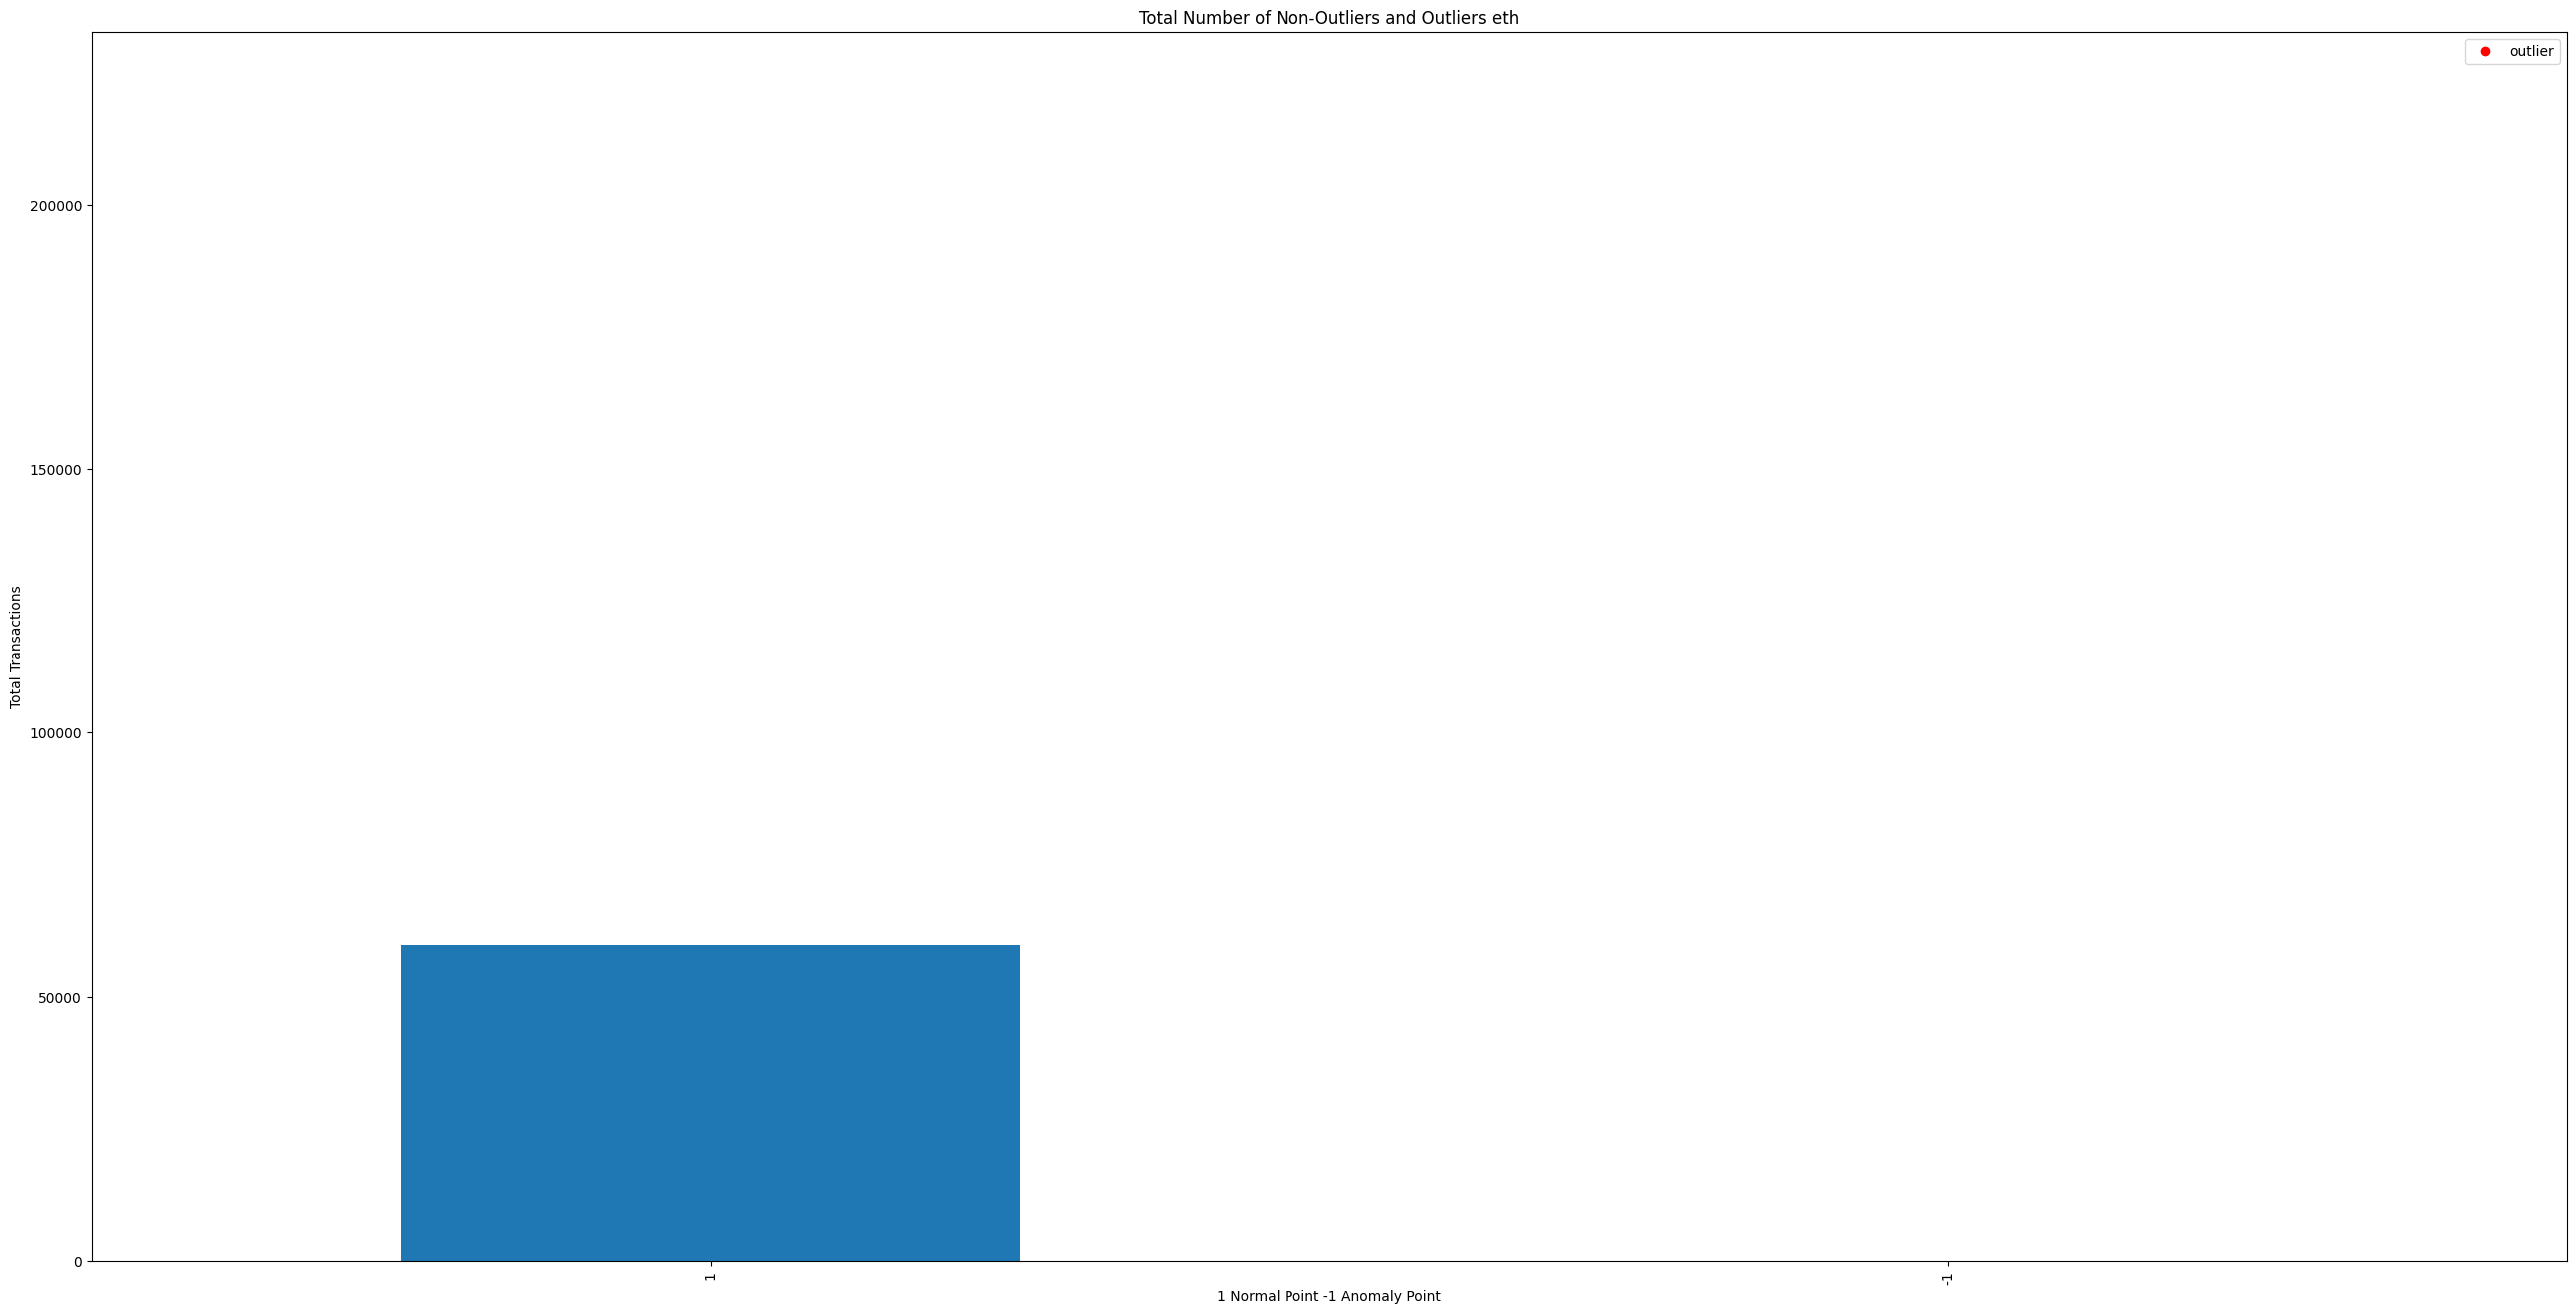

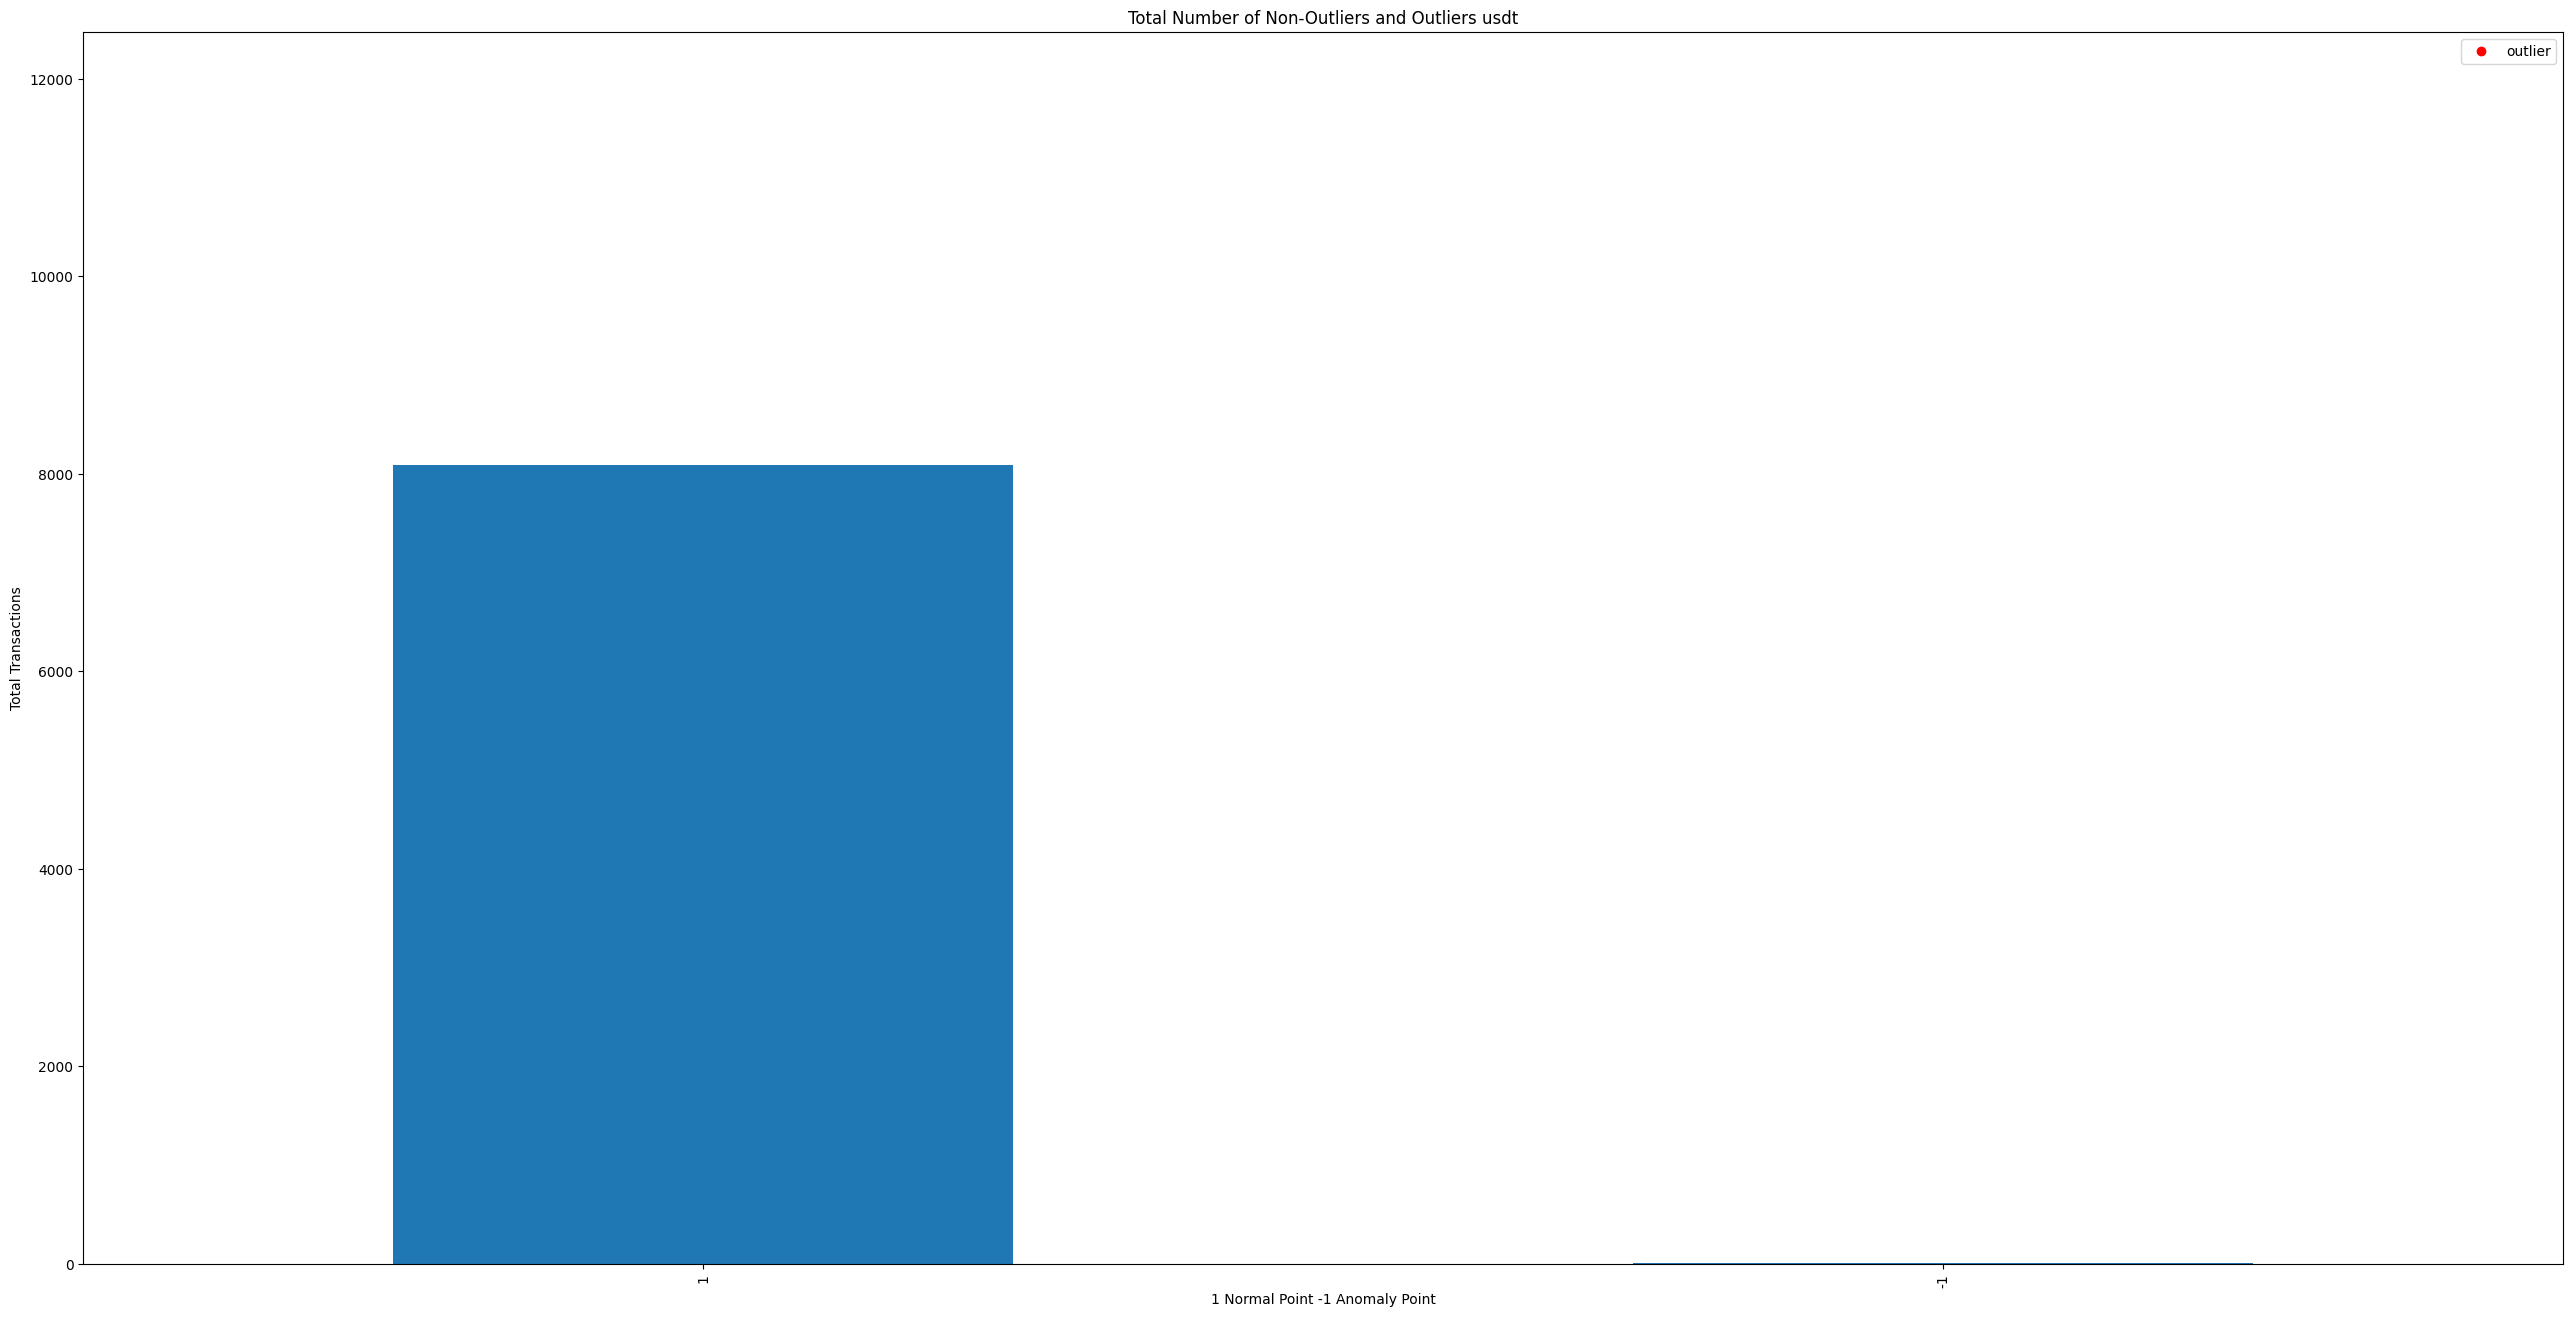

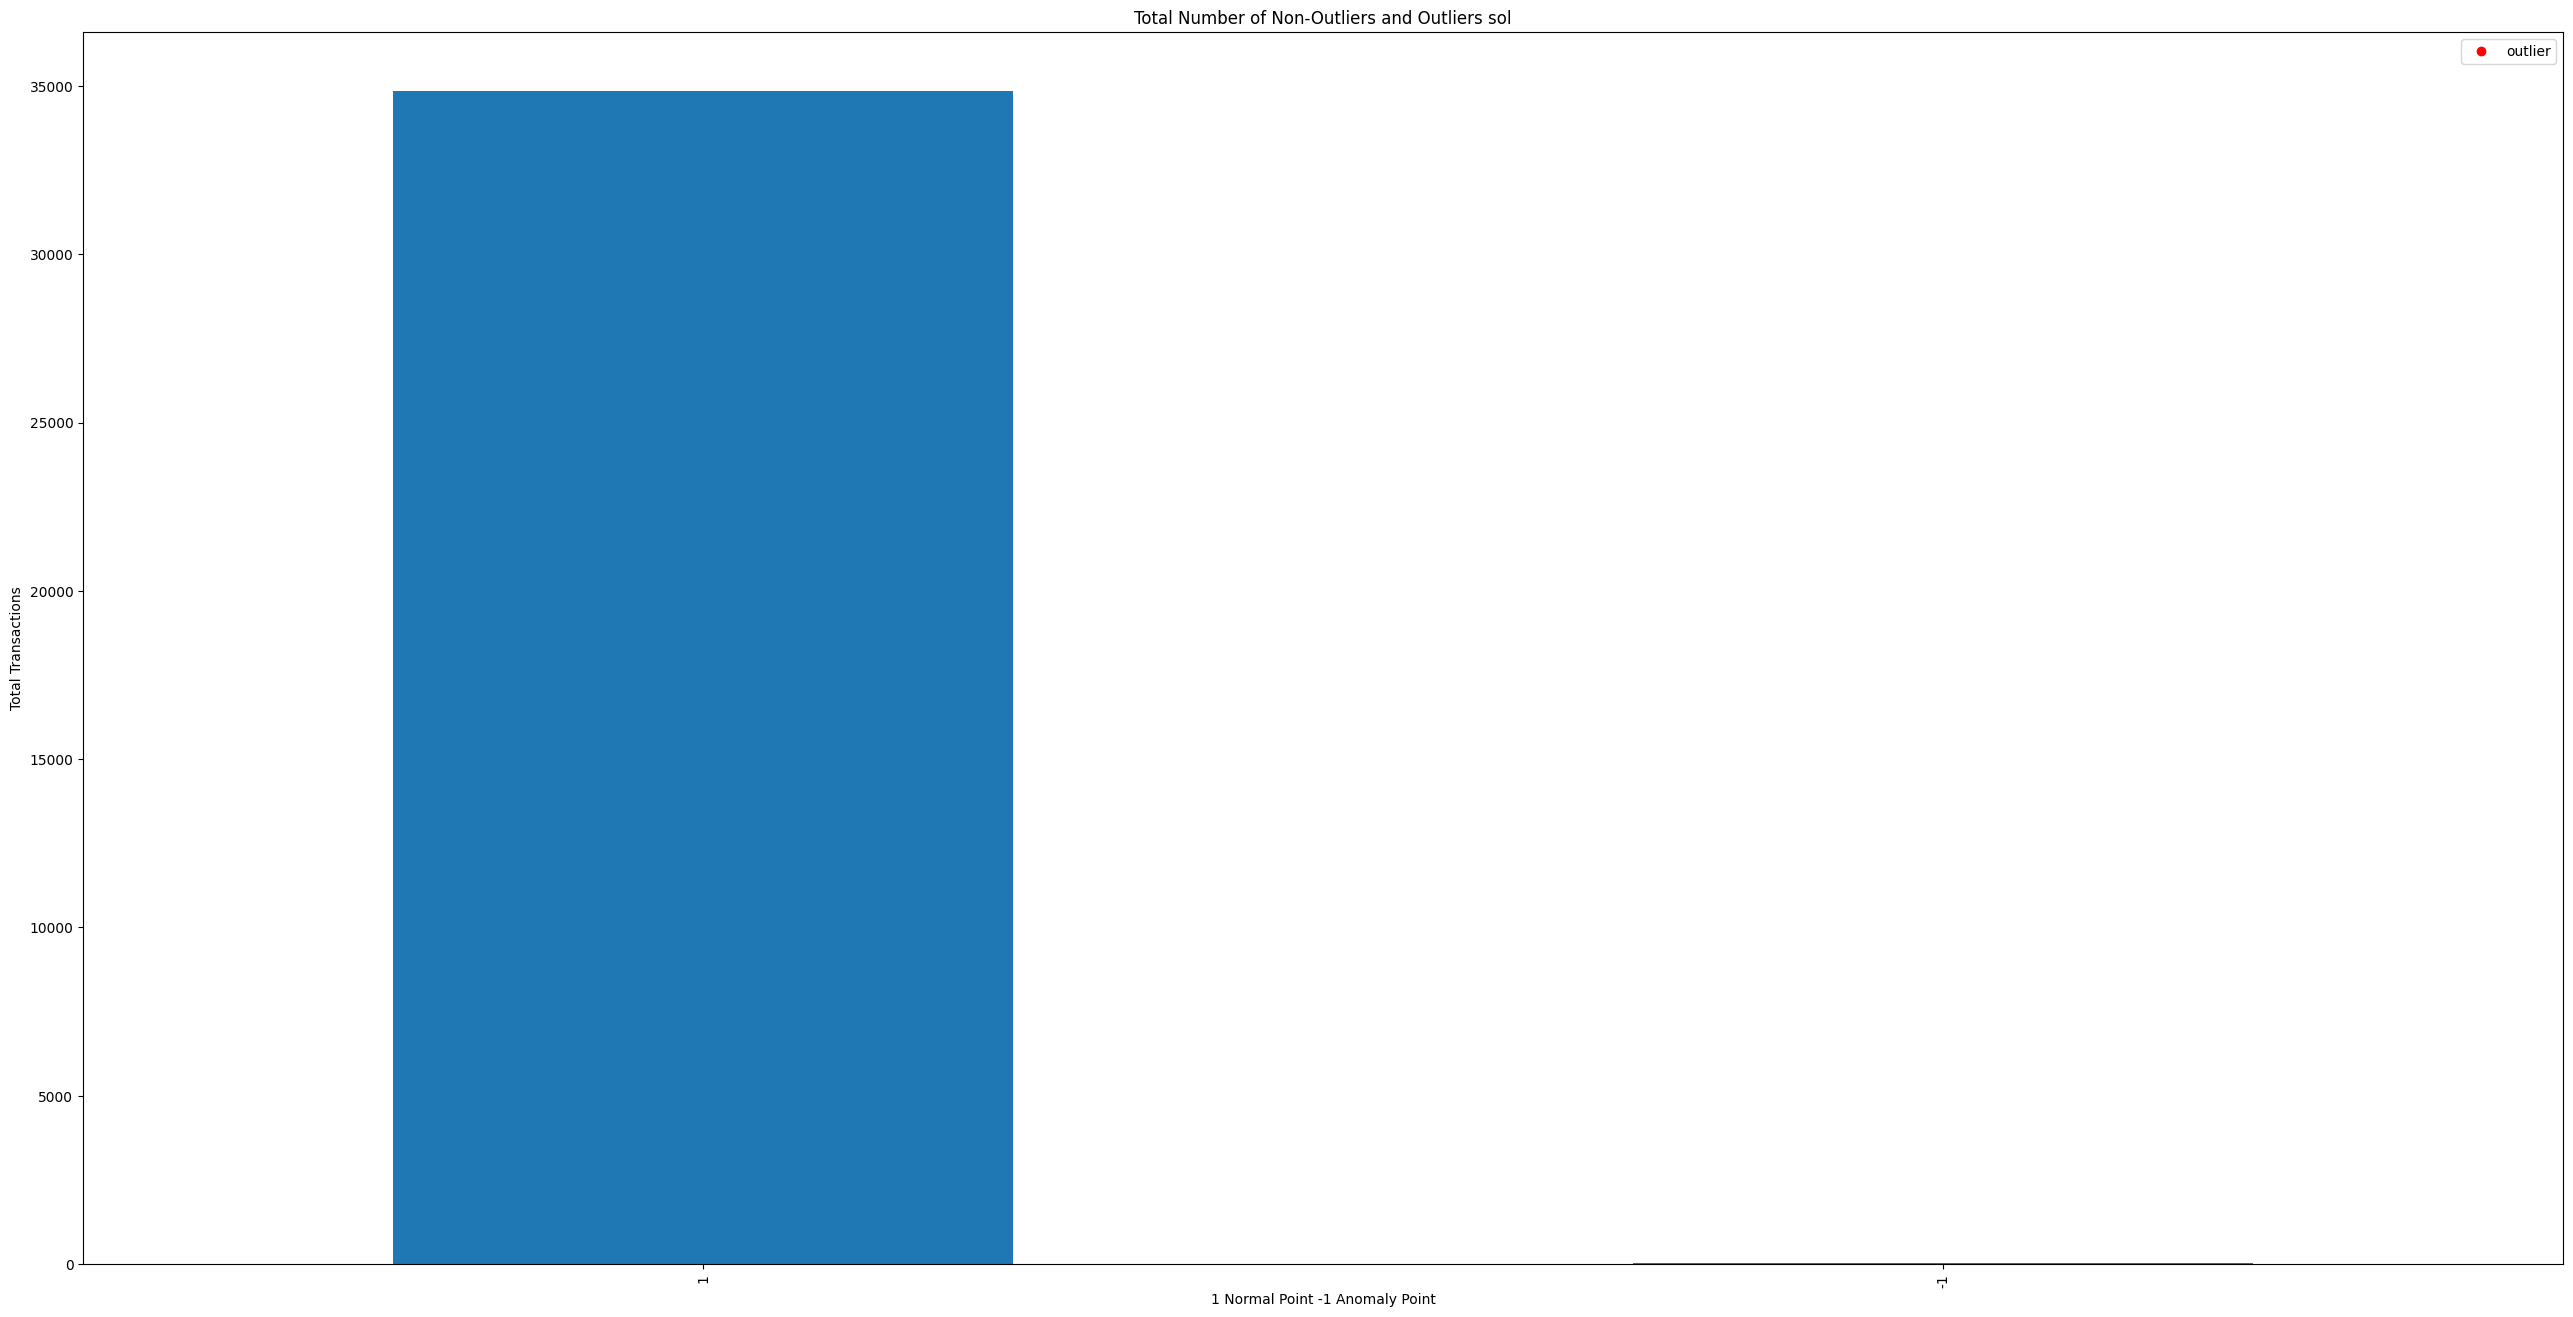

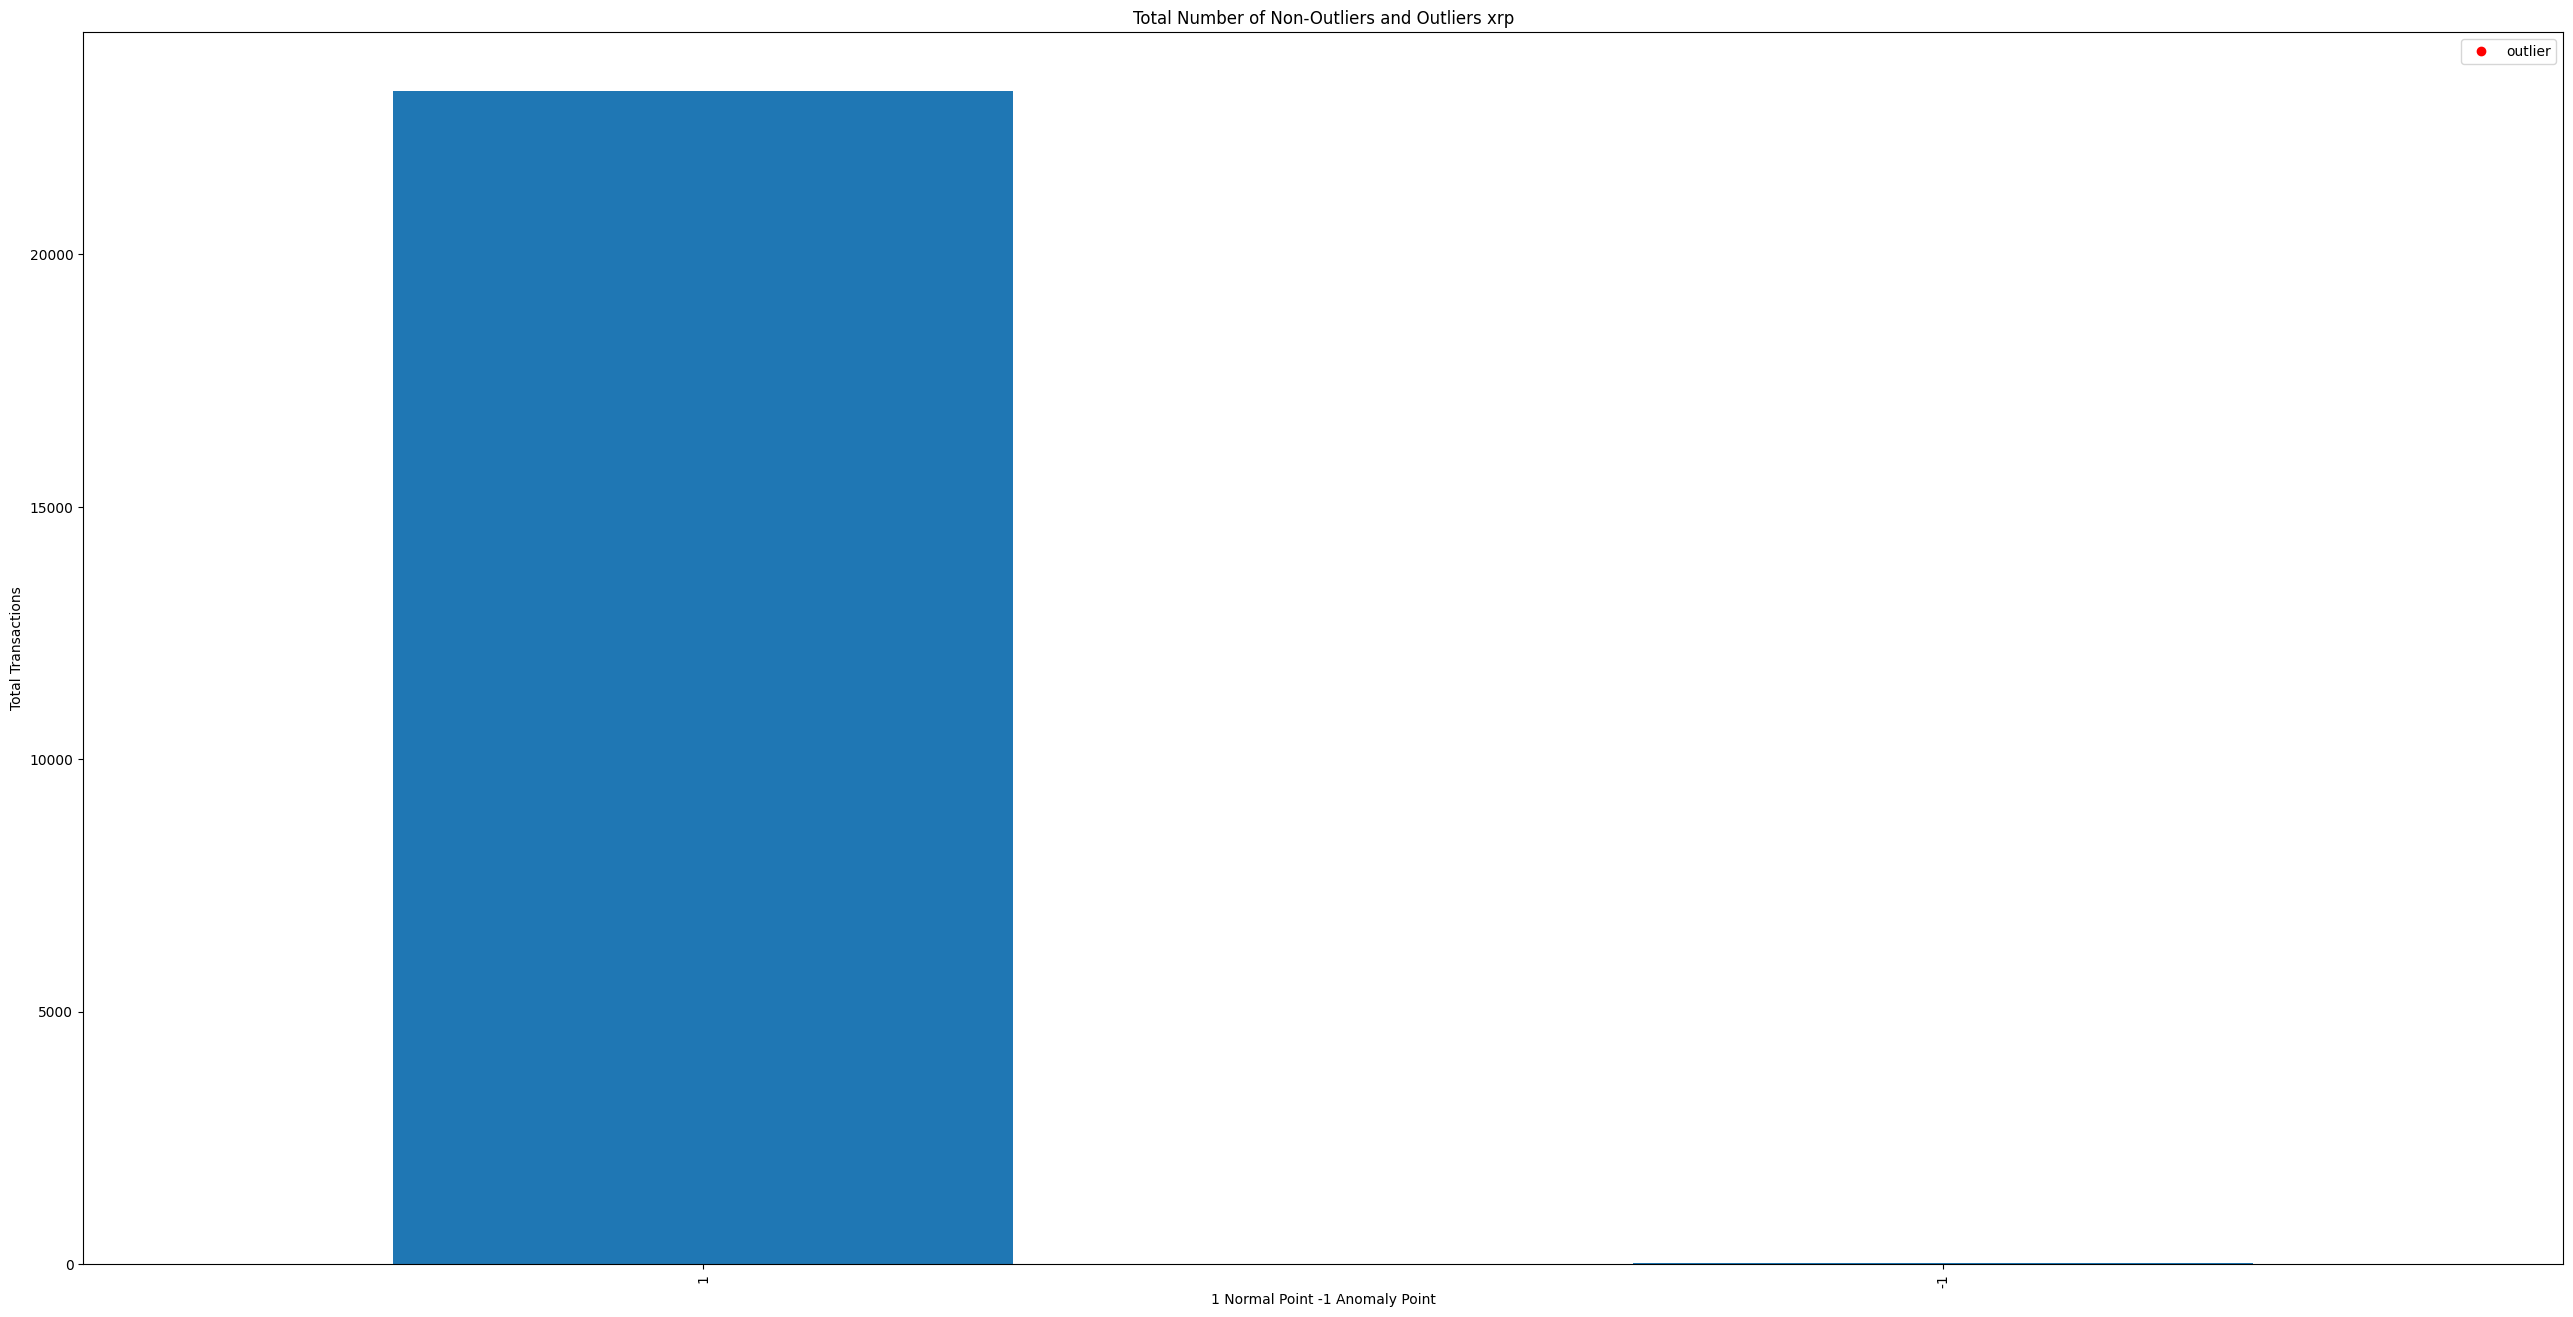

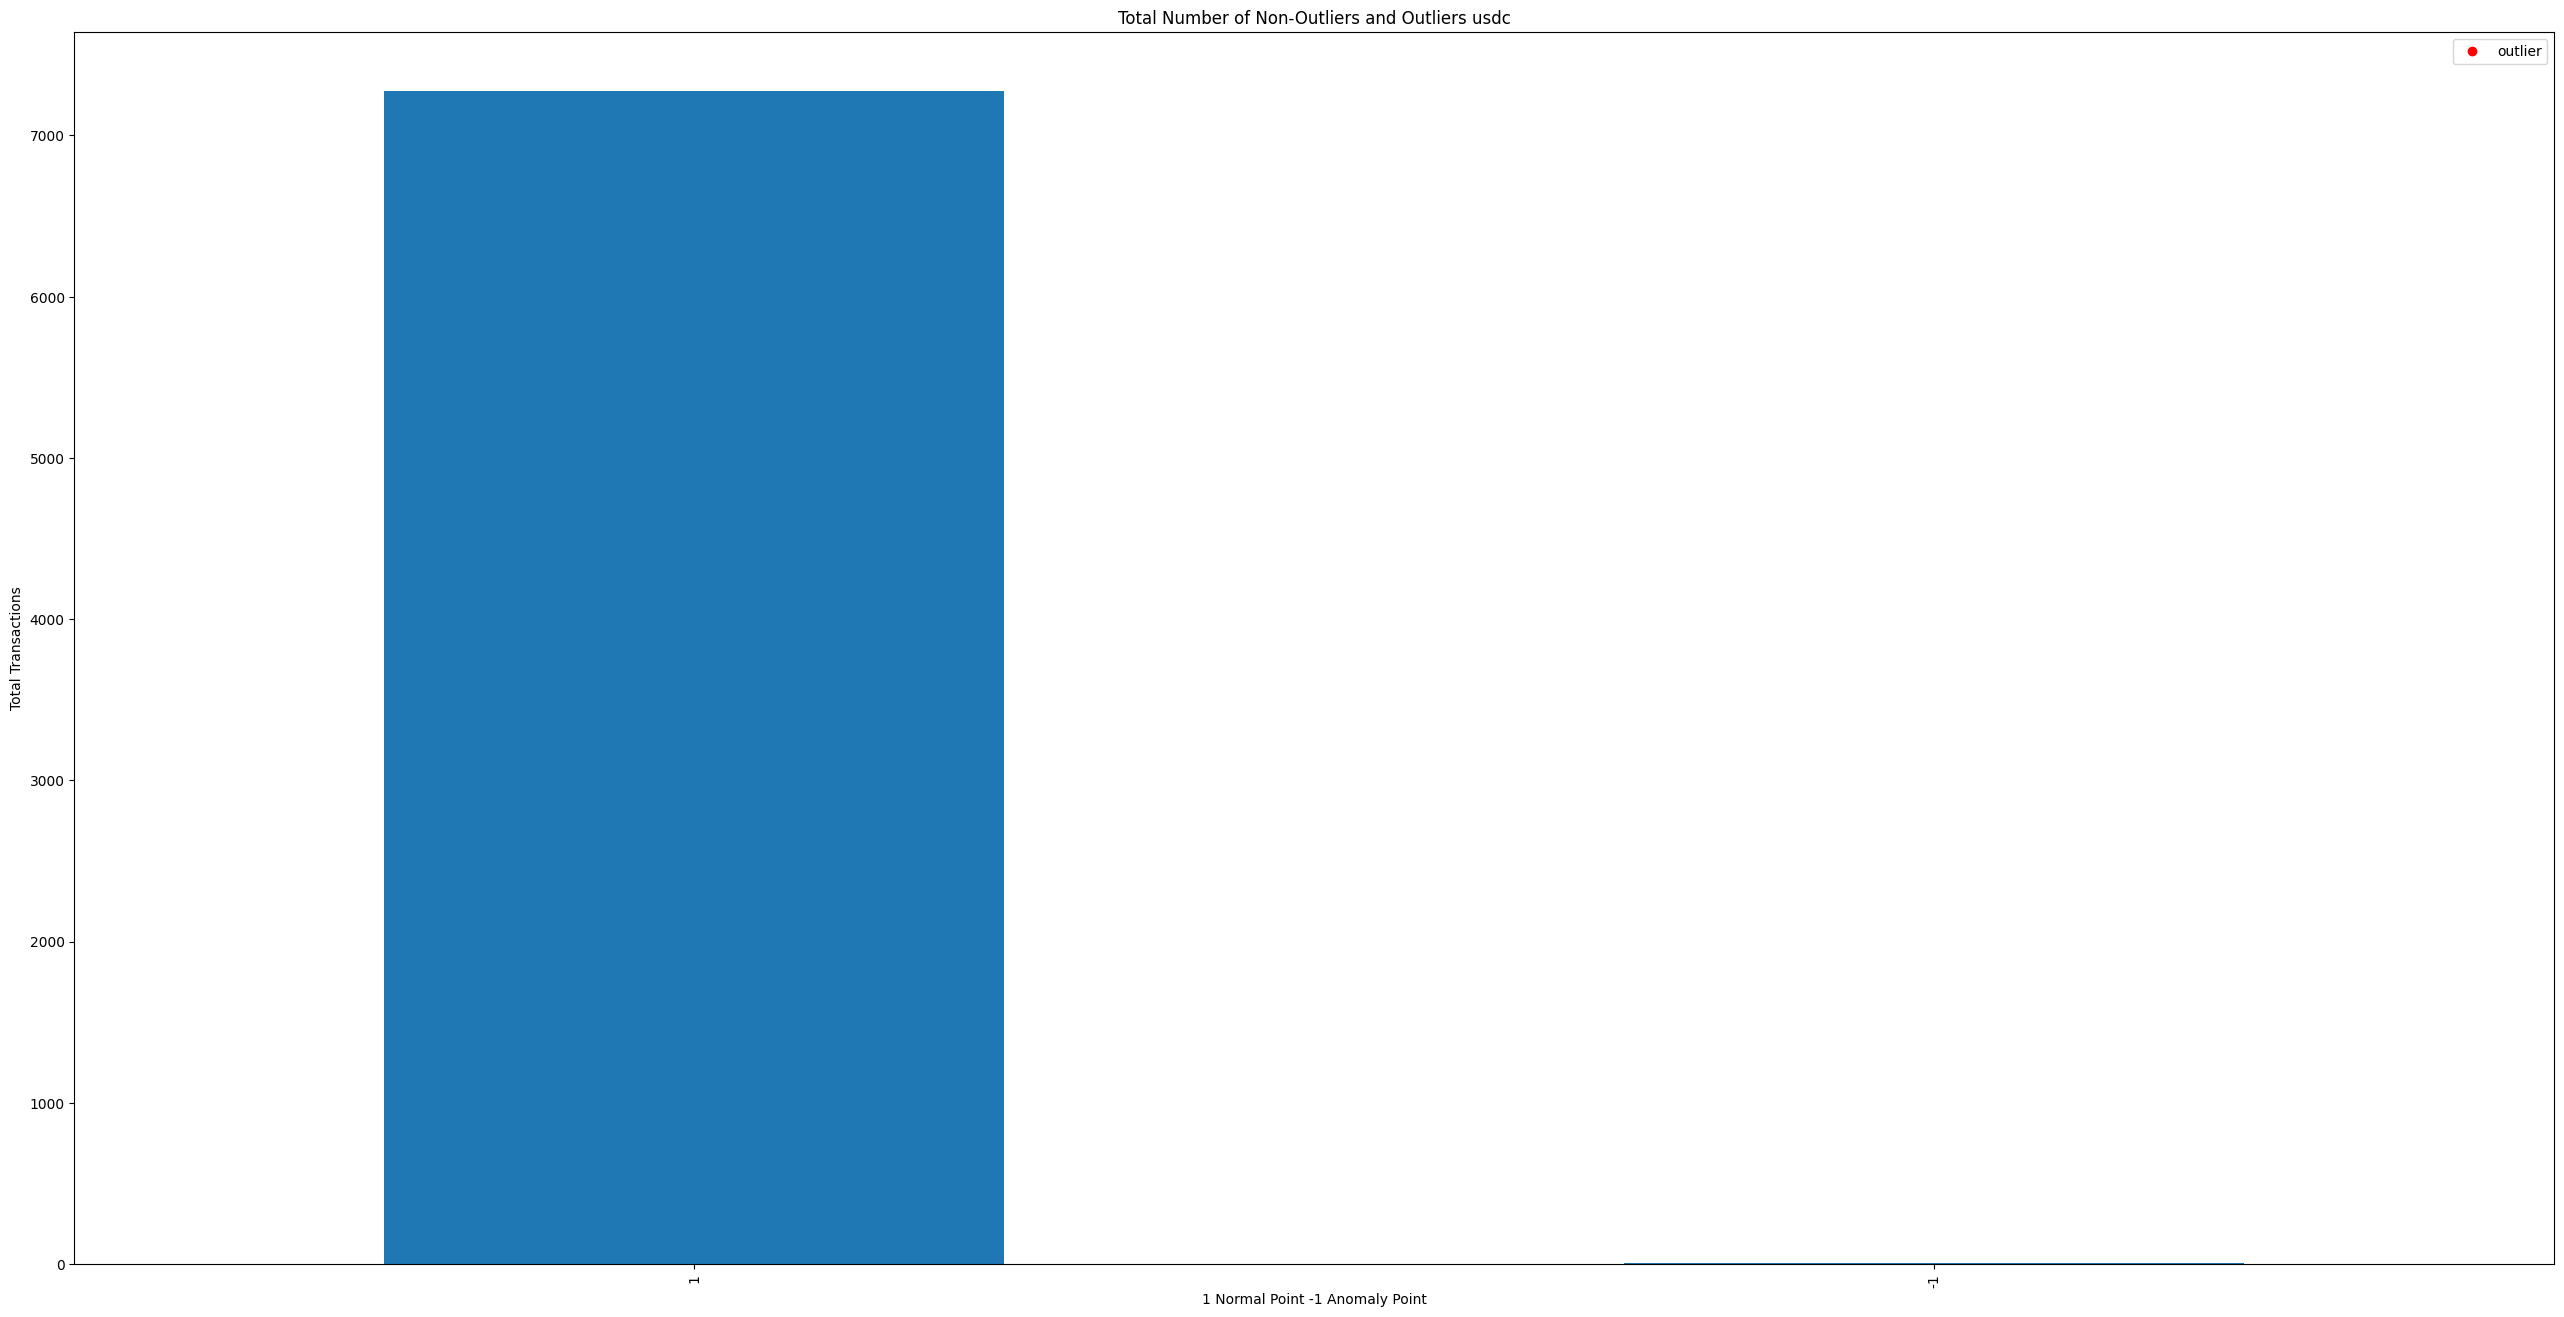

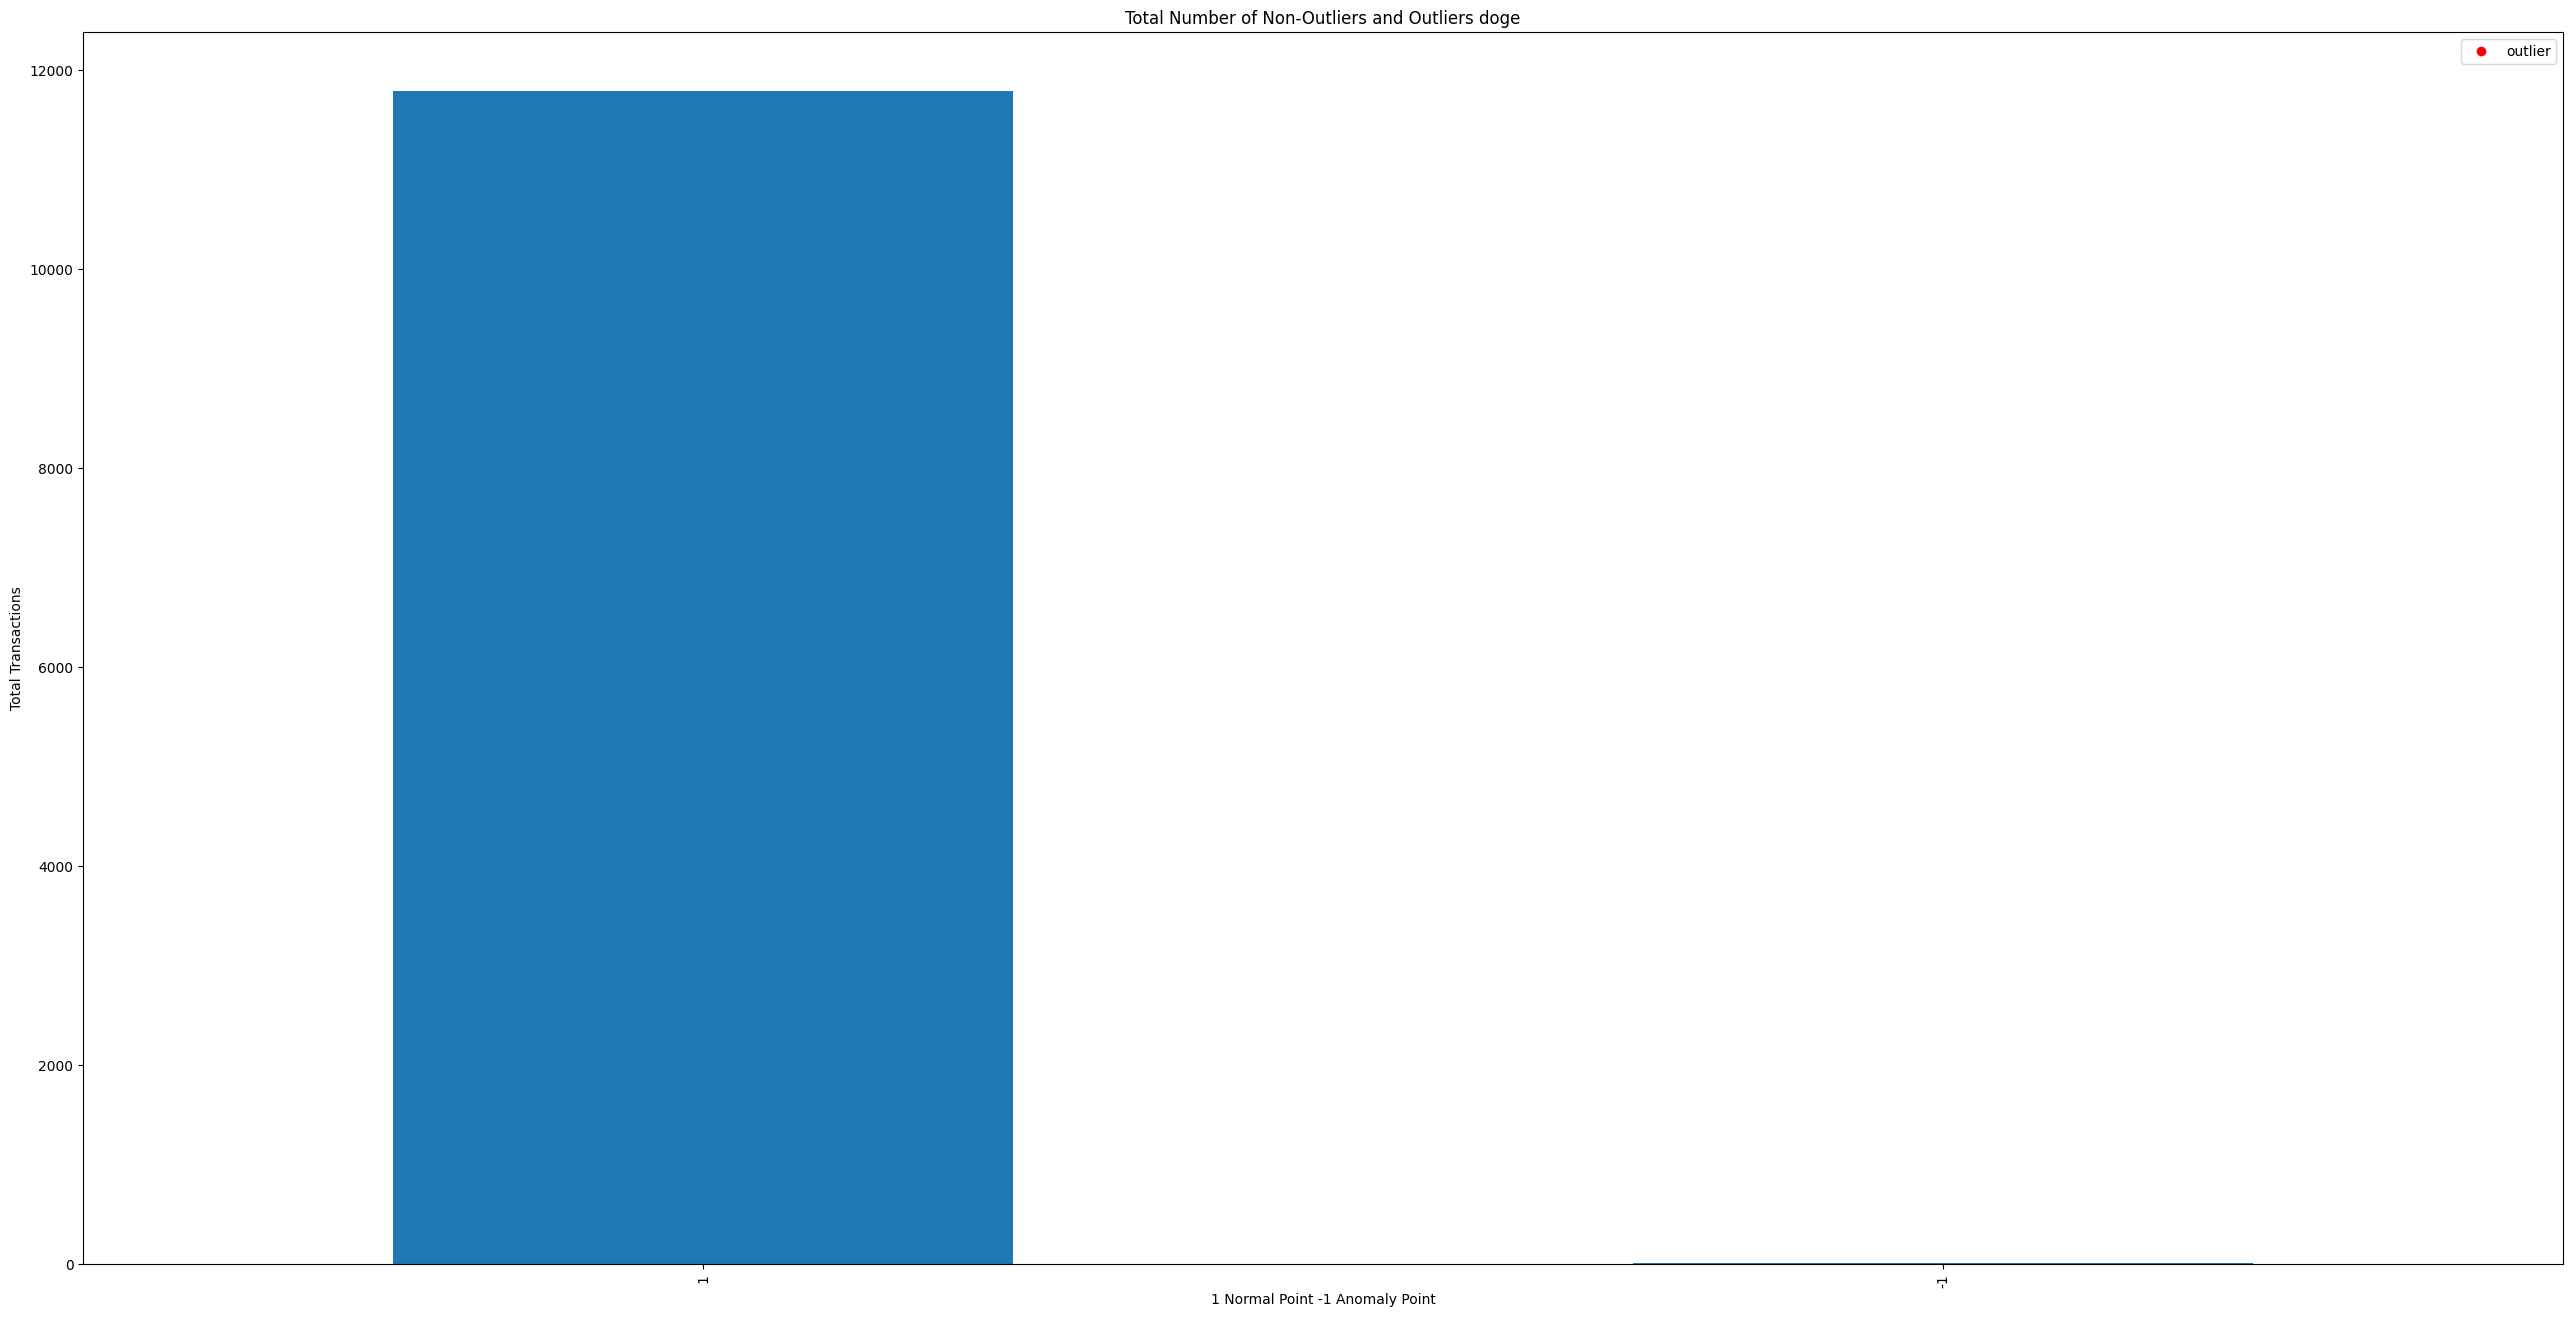

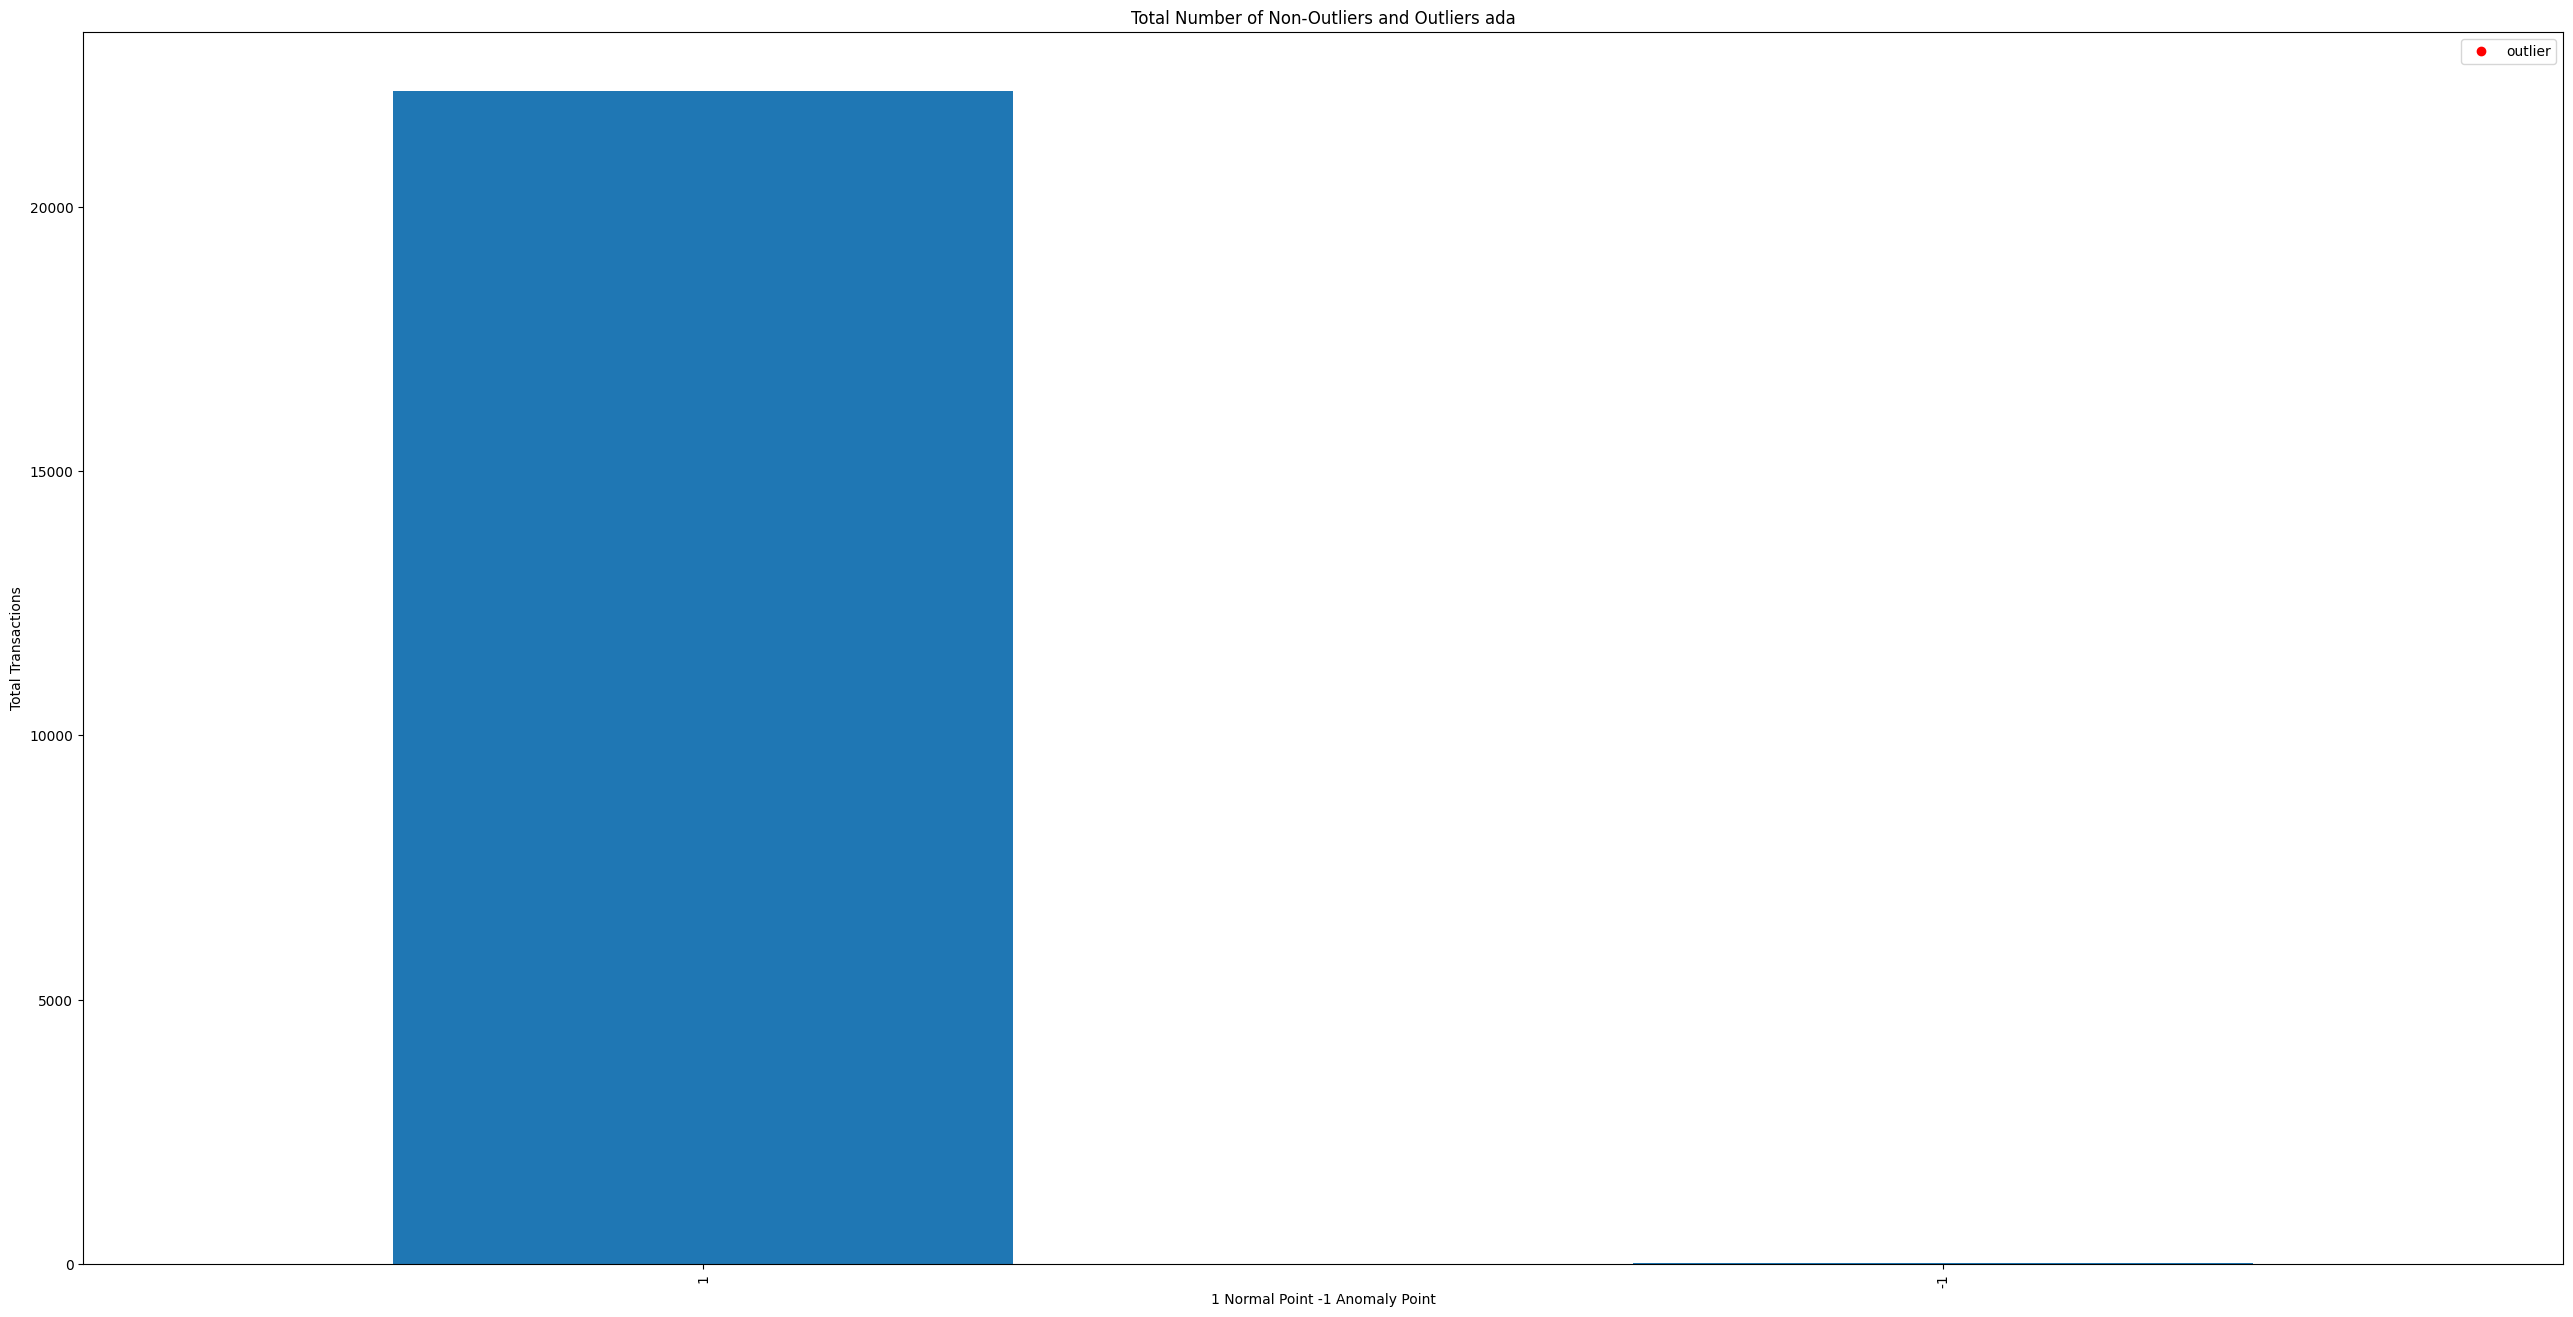

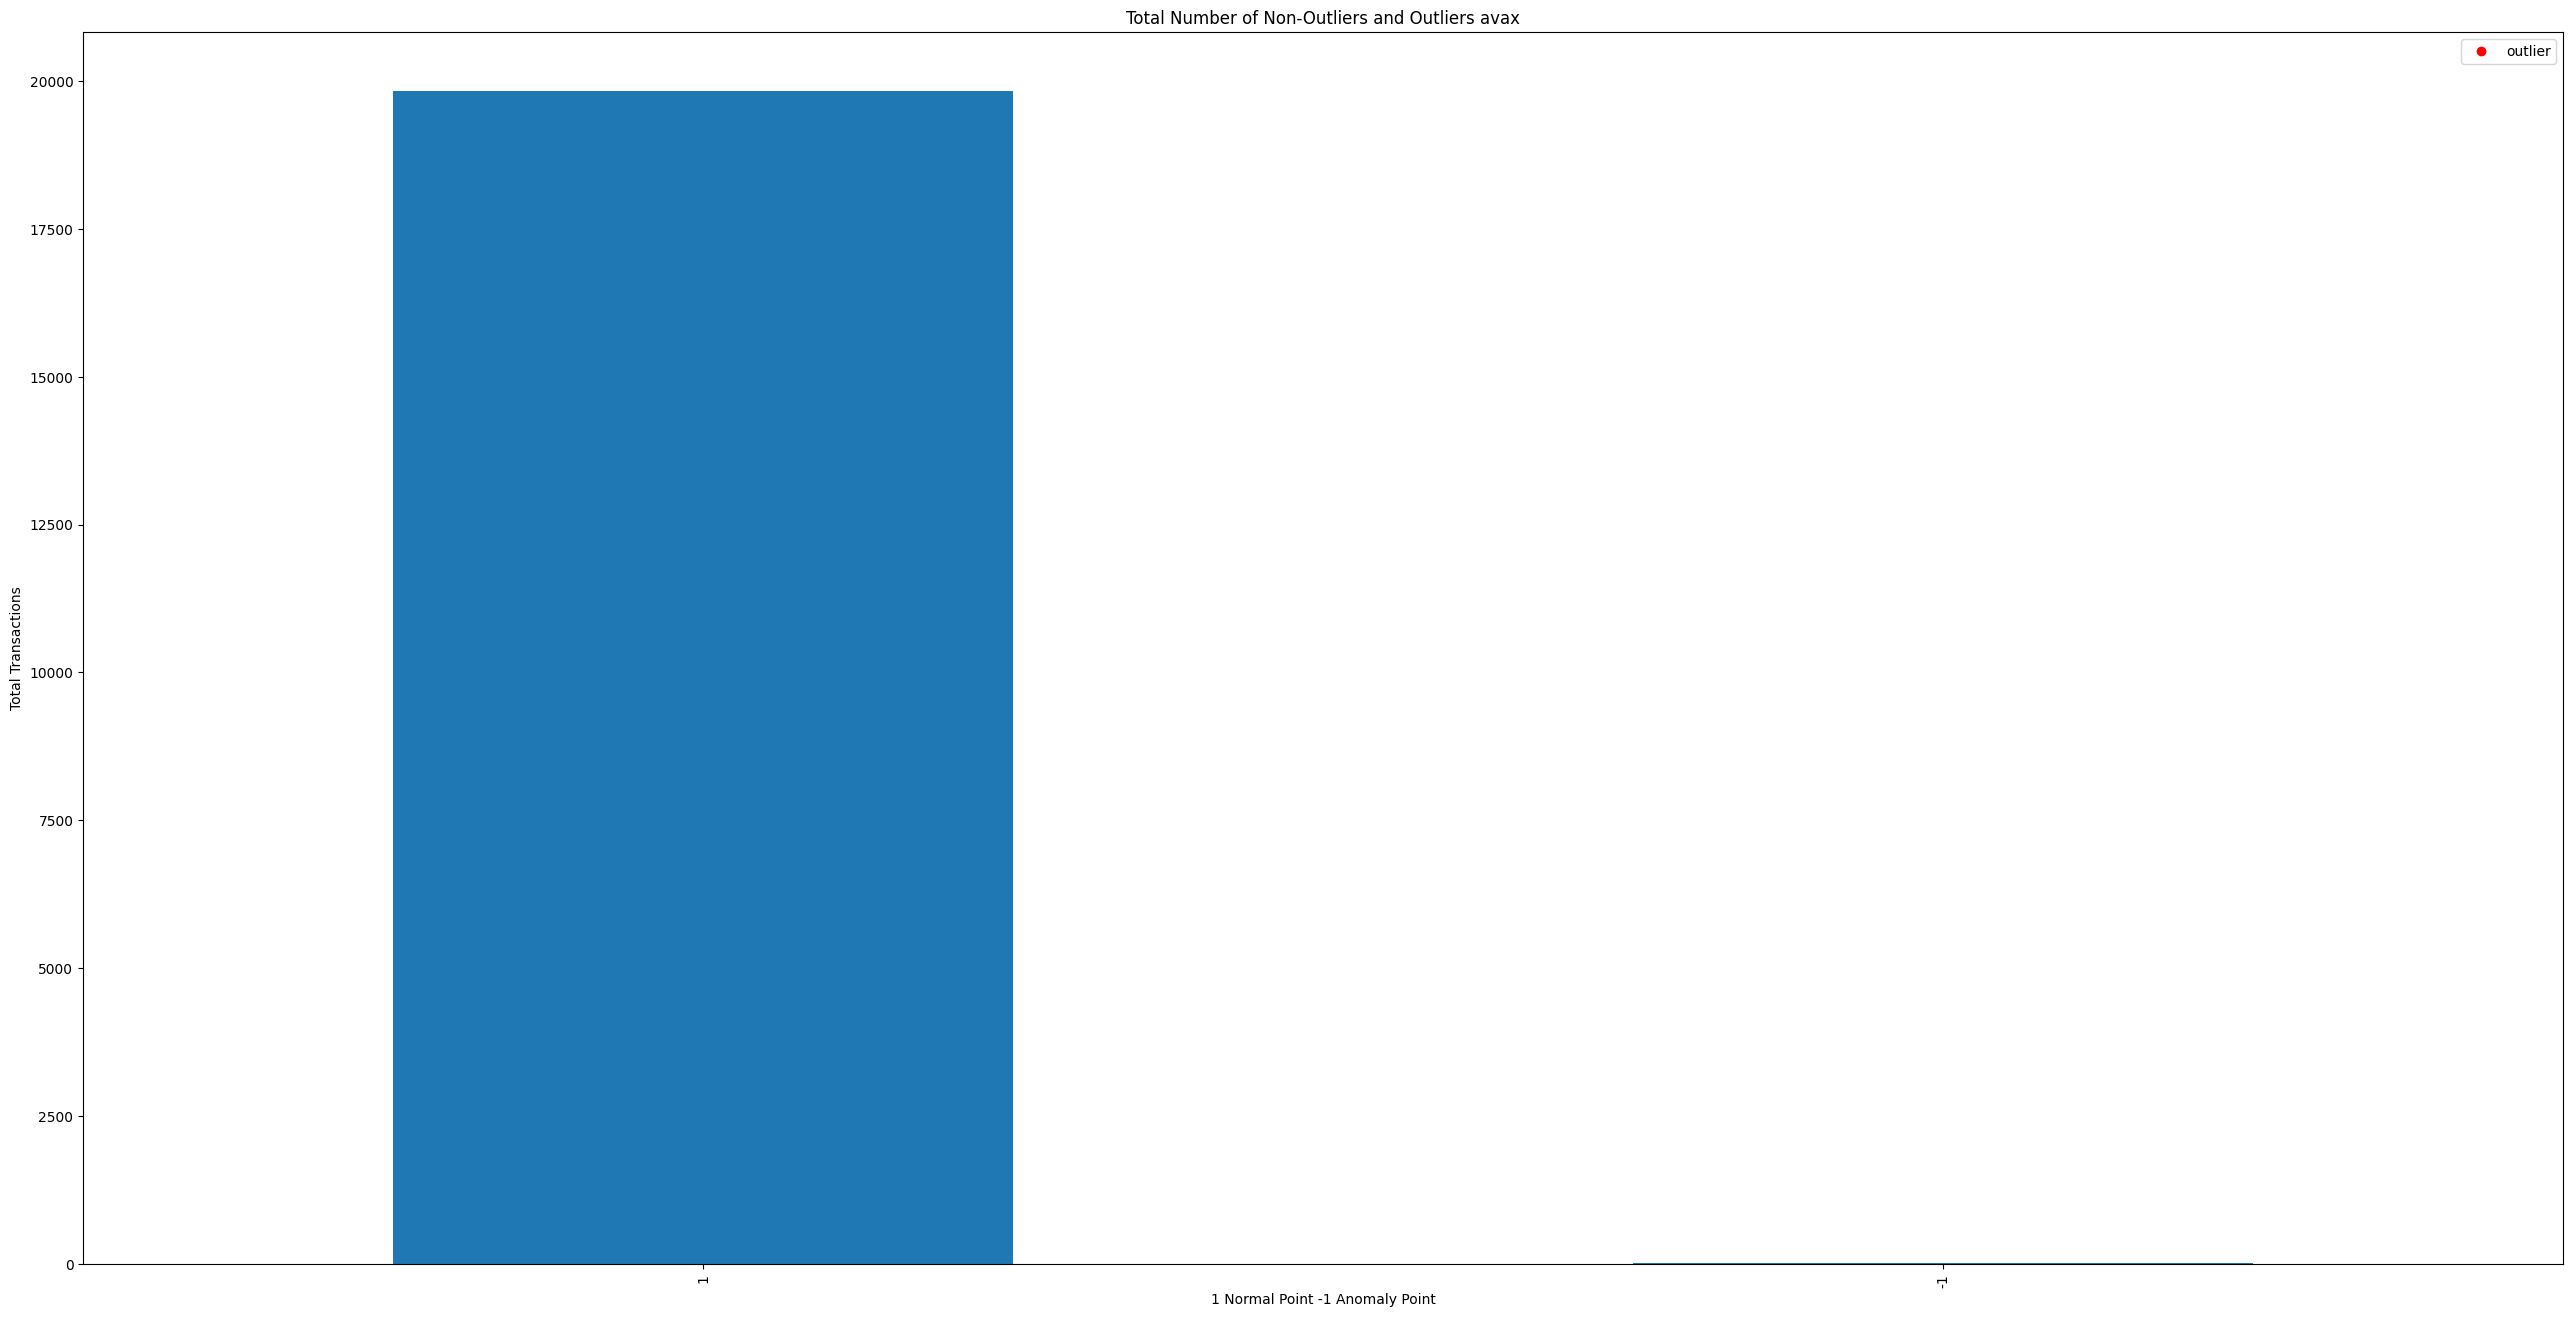

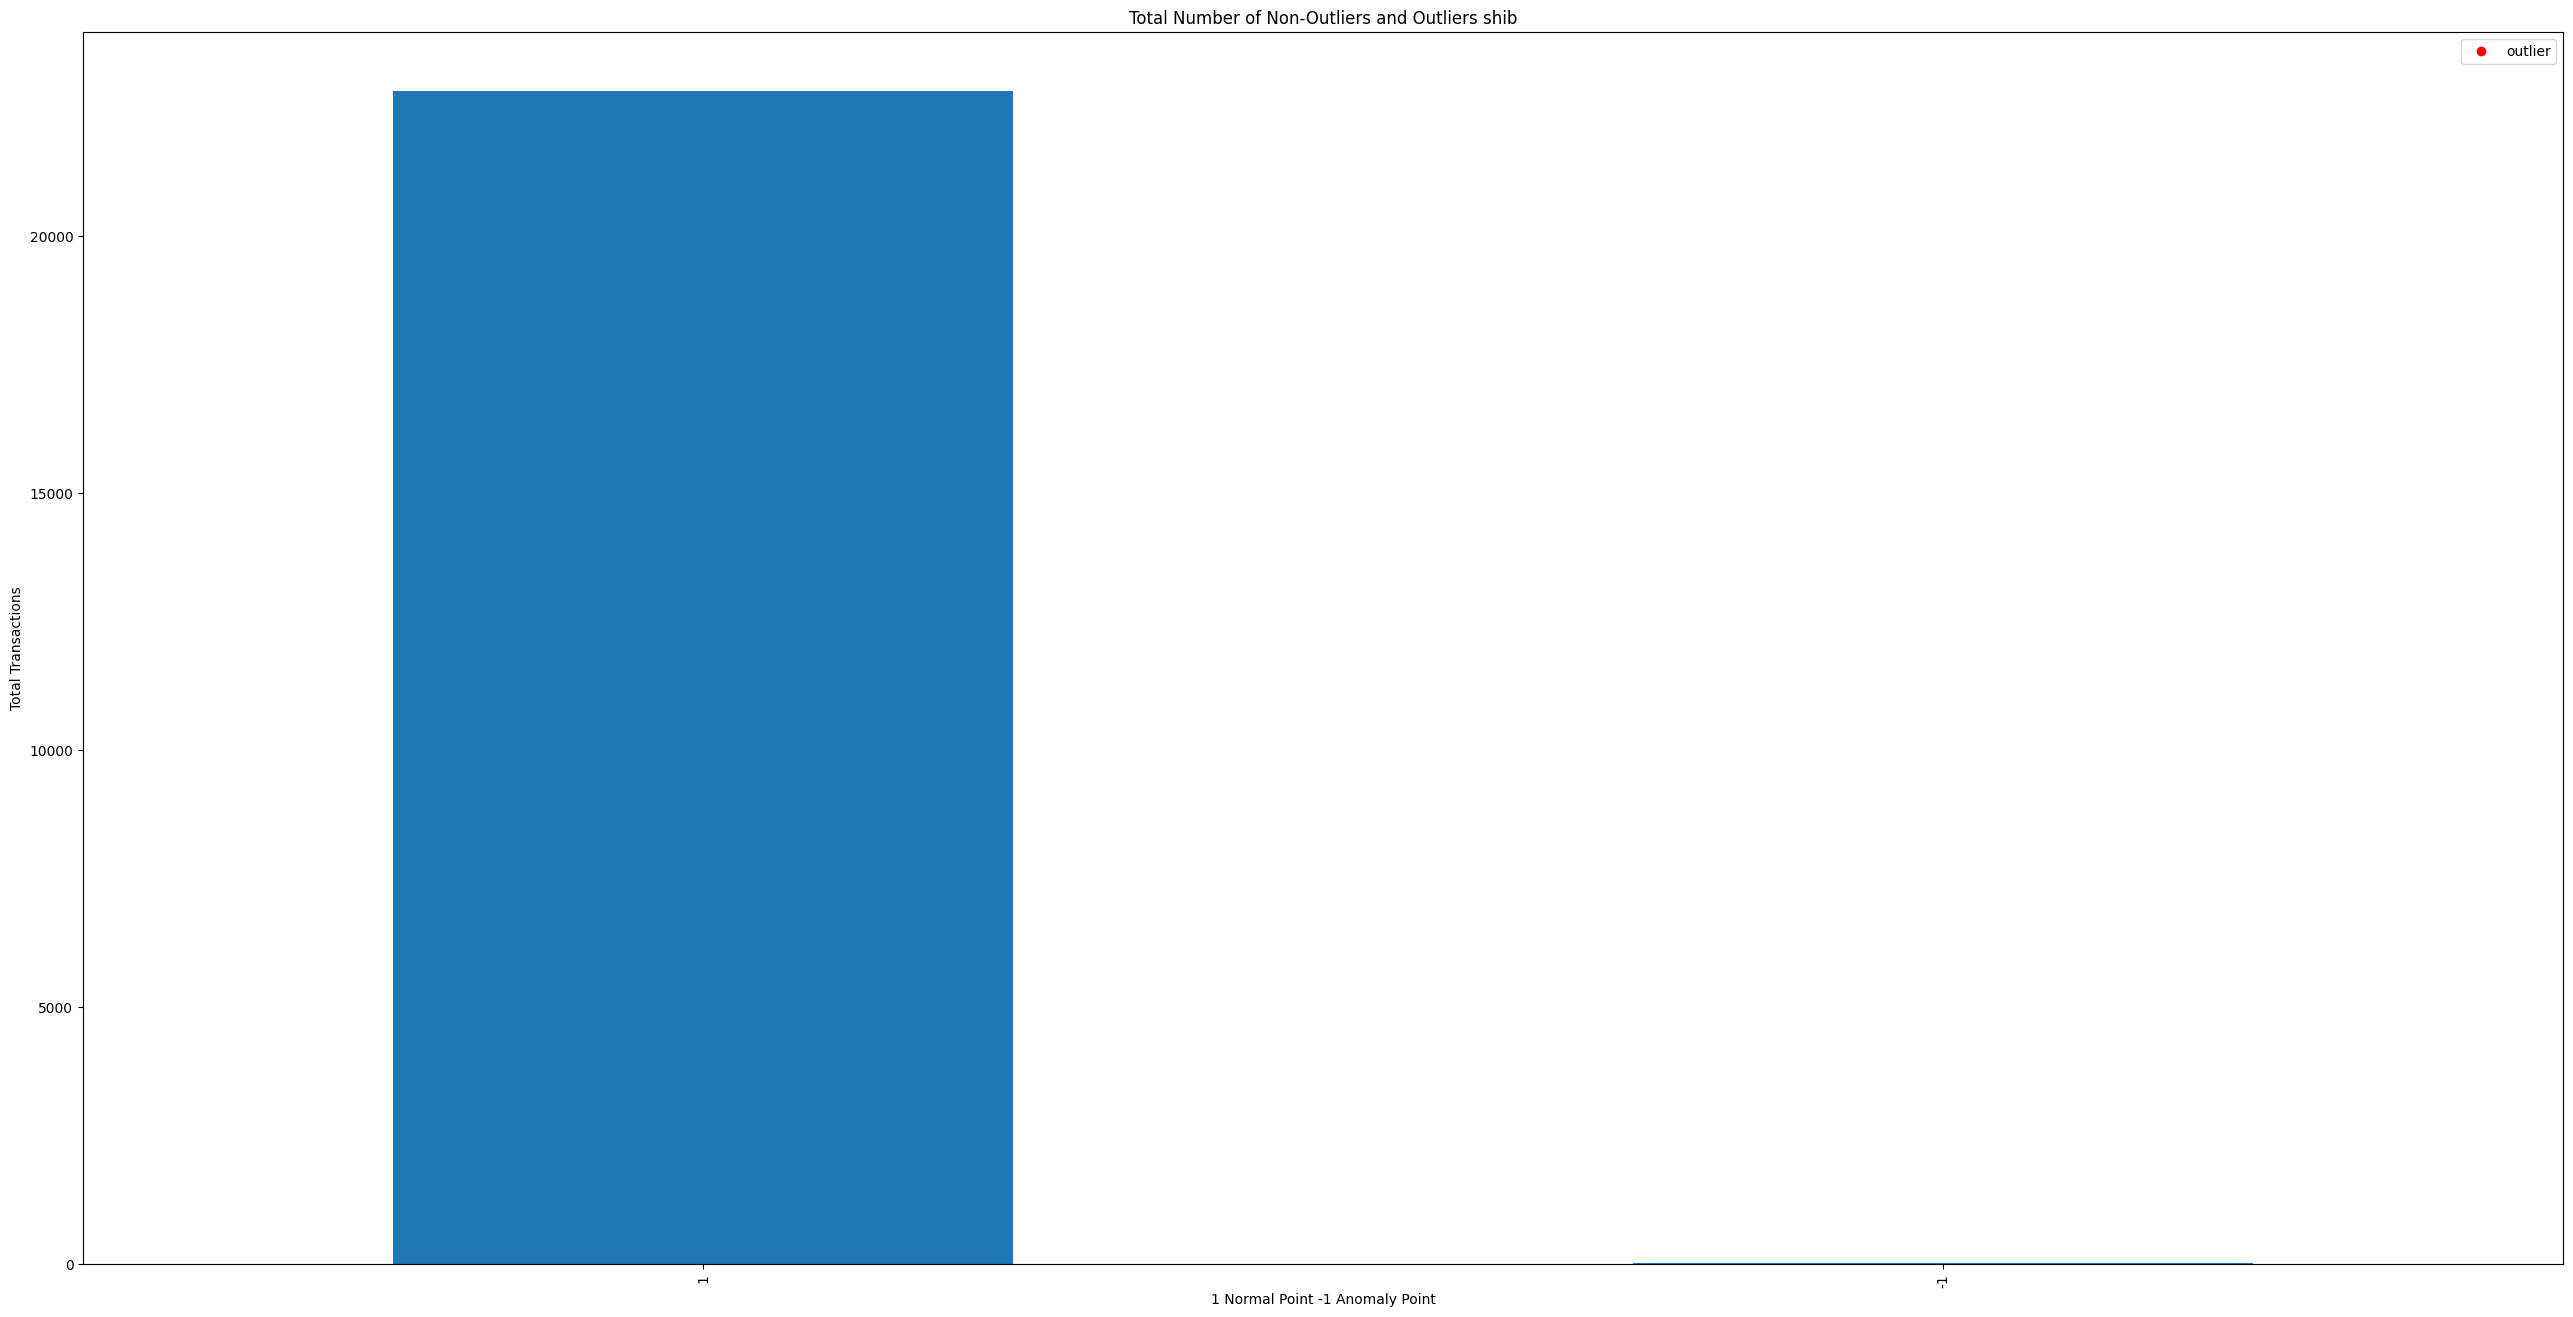

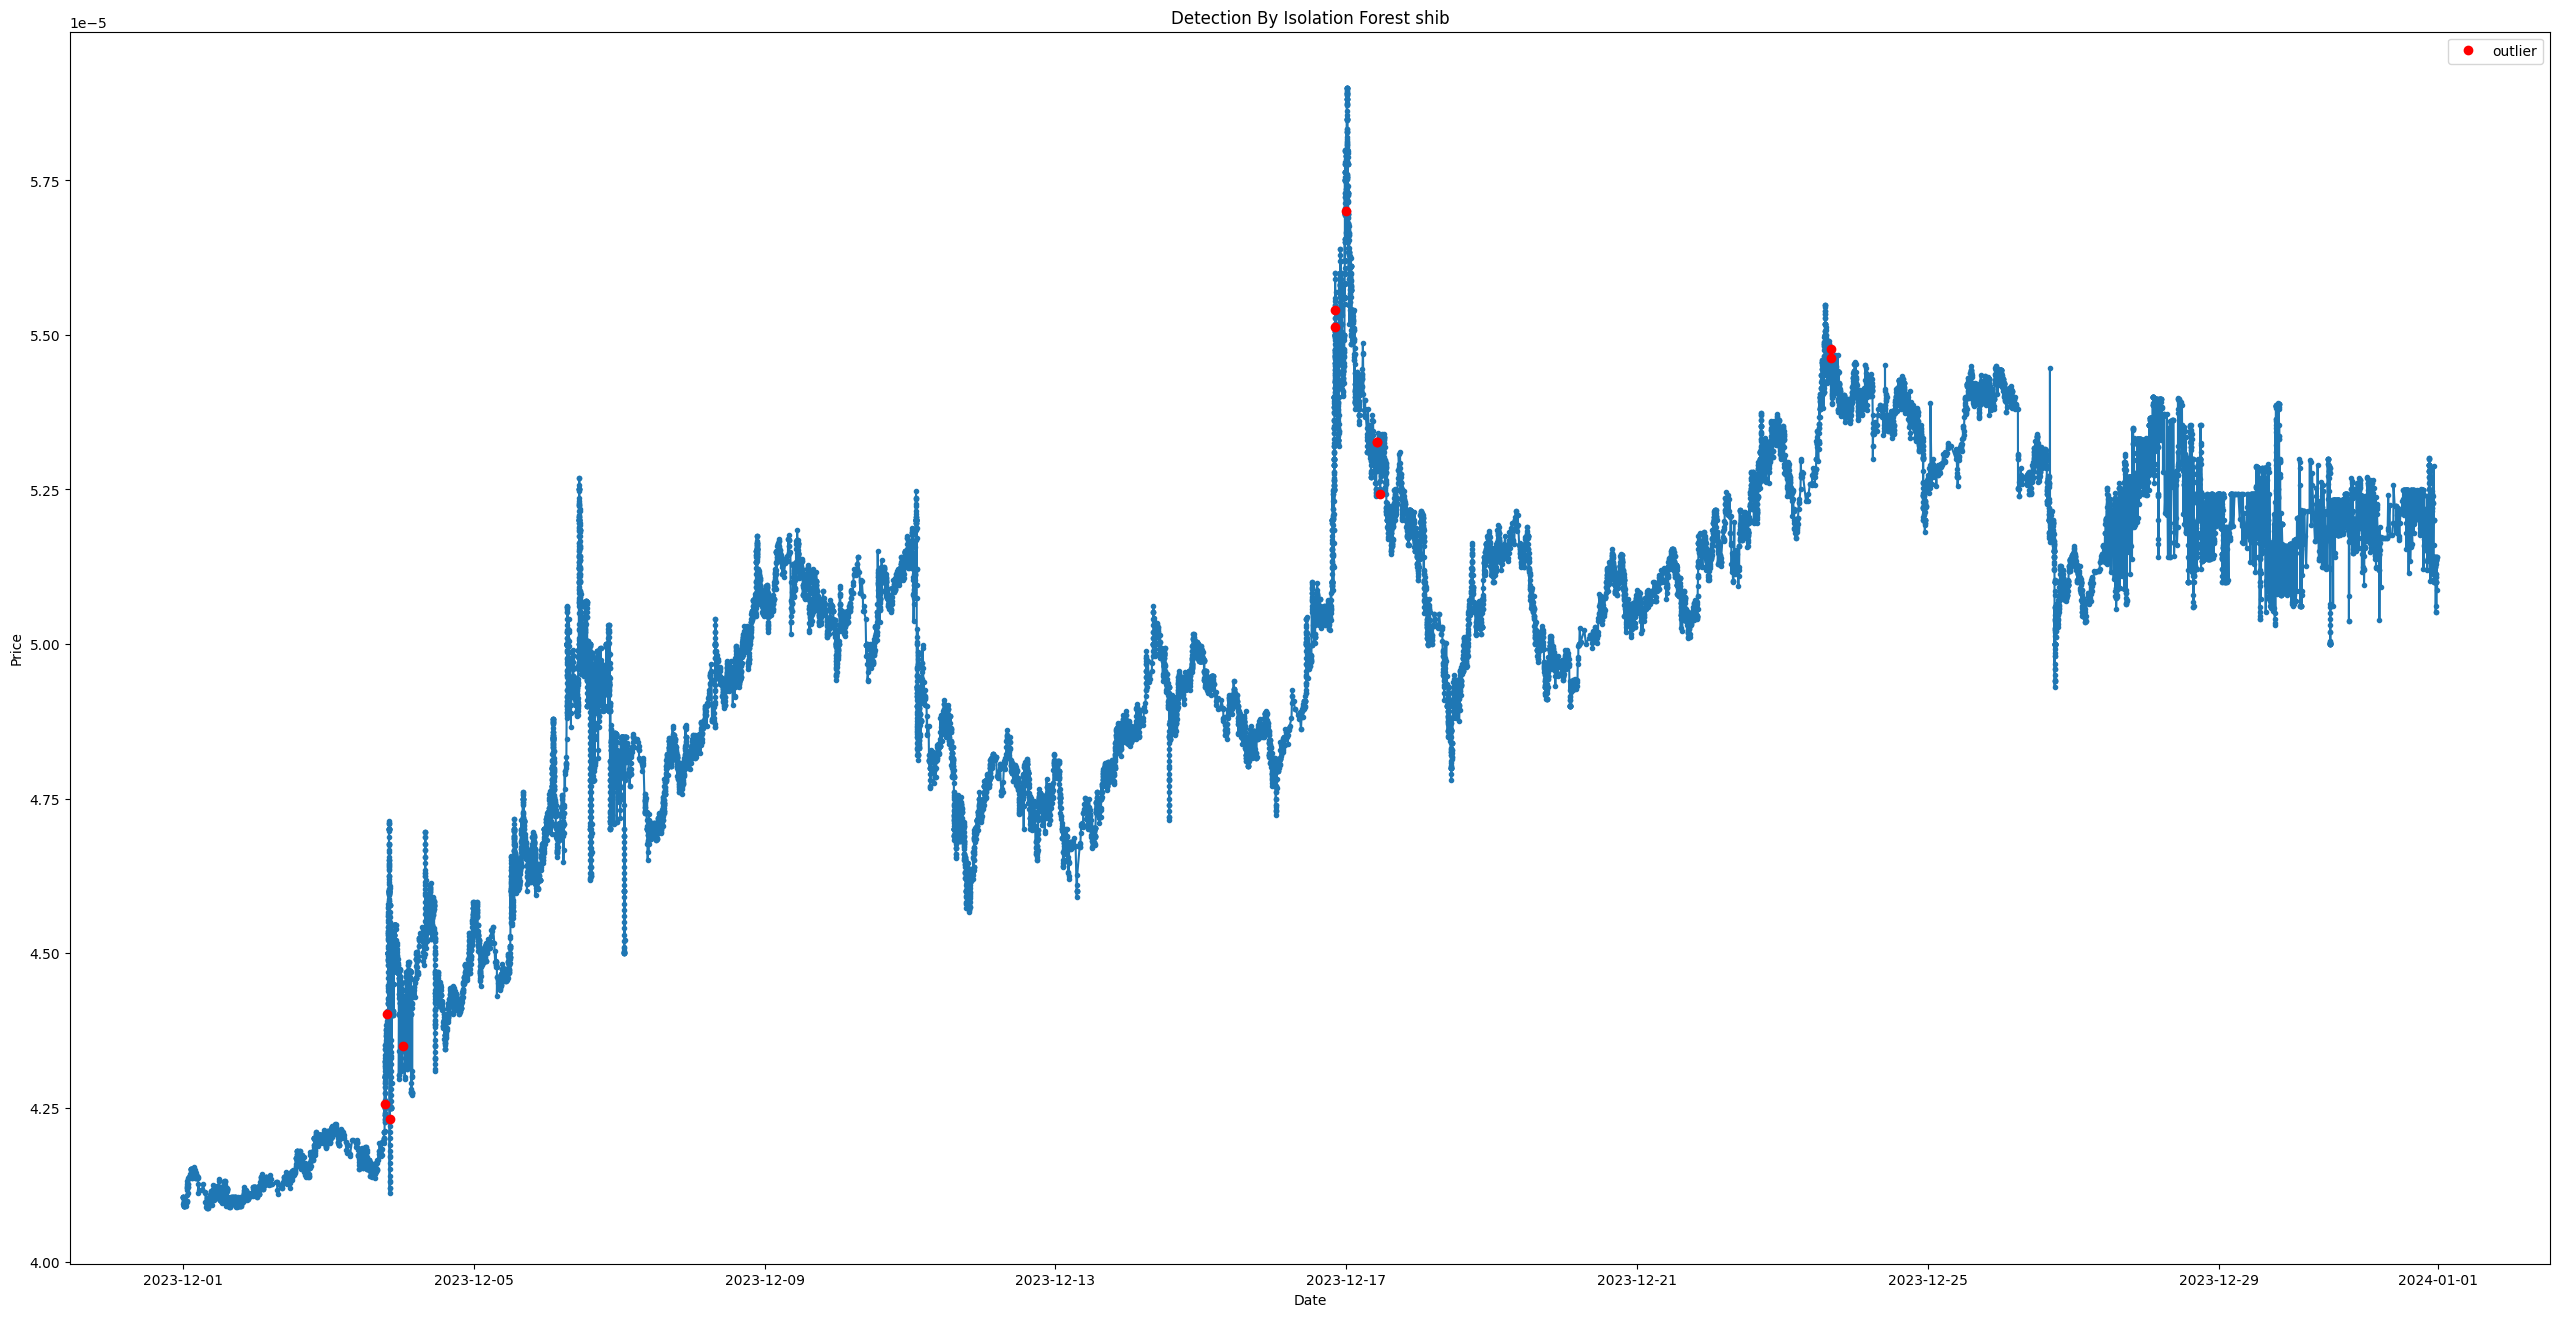

In [232]:
dataset_by_month = dataset_by_time_range(start_date='2023-12-01',
                                        end_date='2023-12-31',
                                        columns=['price', 'amount'])
plot_figures(dataset_by_month, model_month, time_range='month')

#### 1 day dataset

In [233]:
#initiate the model with 0.1% contamination

model_day = IsolationForest(
    n_estimators=1_000,
    max_samples='auto',
    contamination=float(0.001),
    random_state=139,
    n_jobs=-1
)

Total Number of Non-Outliers and Outliers btc:  anomaly_value
 1    4879
-1       5
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers eth:  anomaly_value
 1    2210
-1       3
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers usdt:  anomaly_value
 1    271
-1      1
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers sol:  anomaly_value
 1    1137
-1       2
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers xrp:  anomaly_value
 1    815
-1      1
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers usdc:  anomaly_value
 1    338
-1      1
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers doge:  anomaly_value
 1    343
-1      1
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers ada:  anomaly_value
 1    1327
-1       2
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers avax:  anomaly_value
 1    1332
-1       2
Name: count, dtype: int64
Total Number o

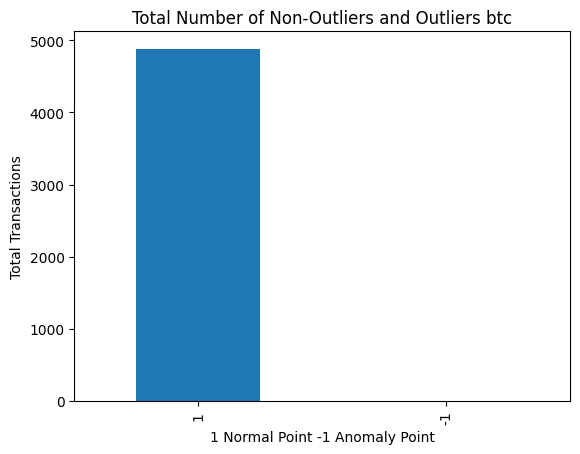

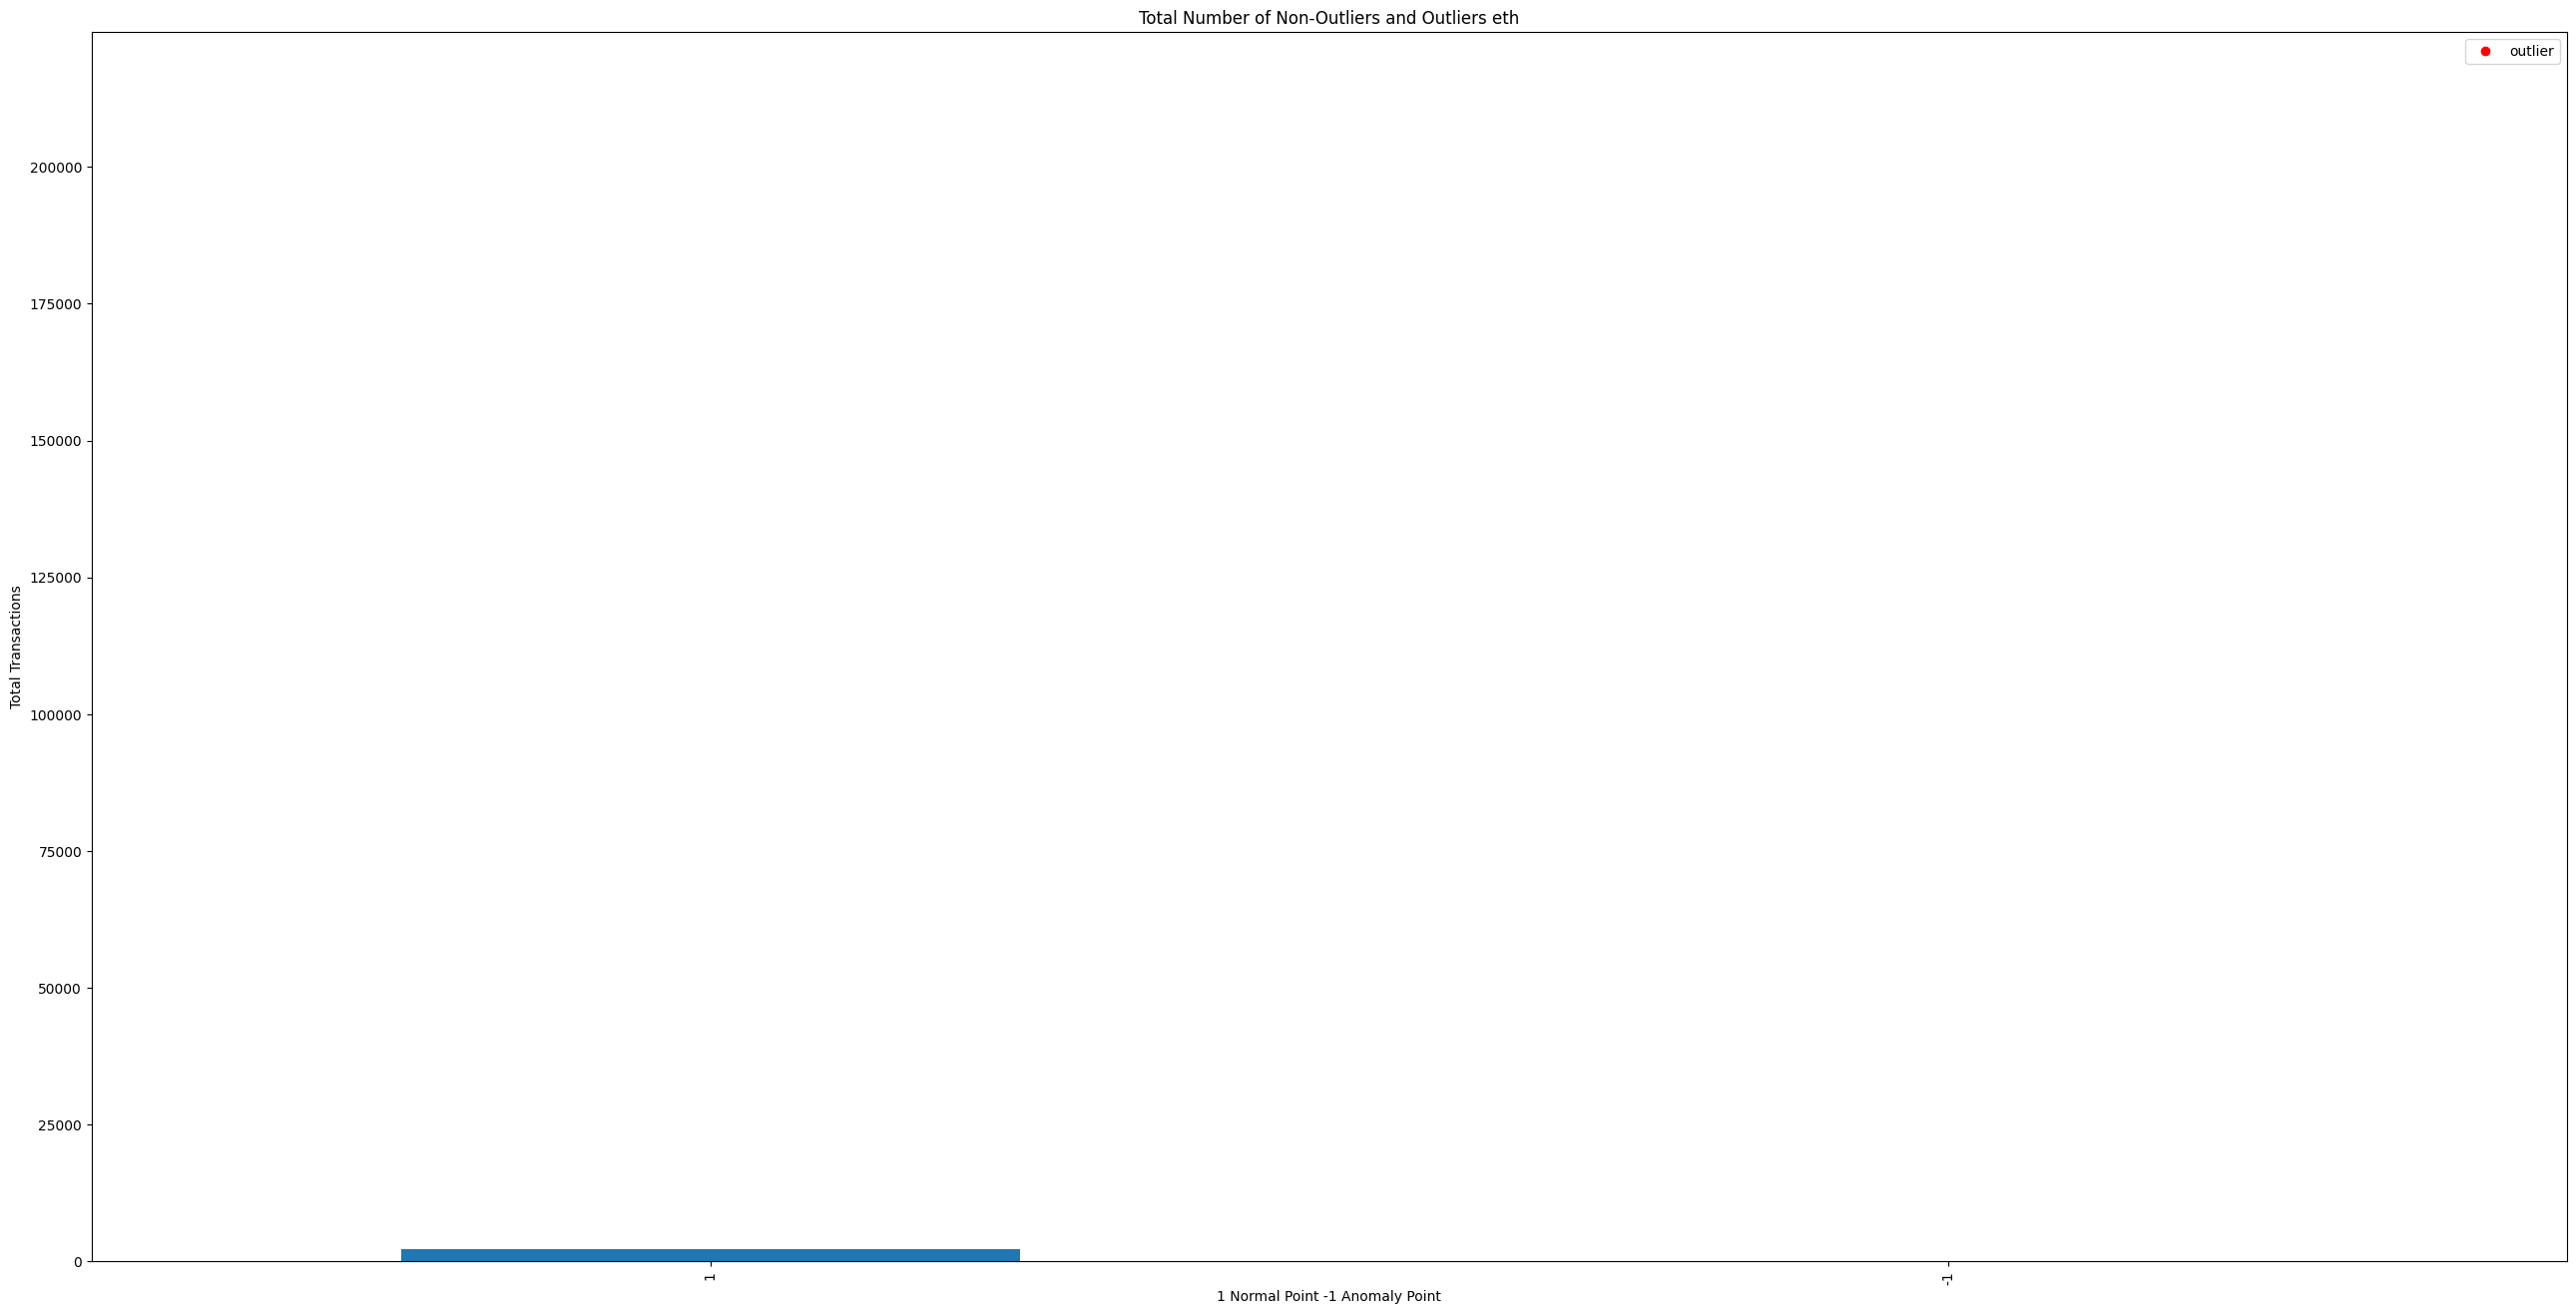

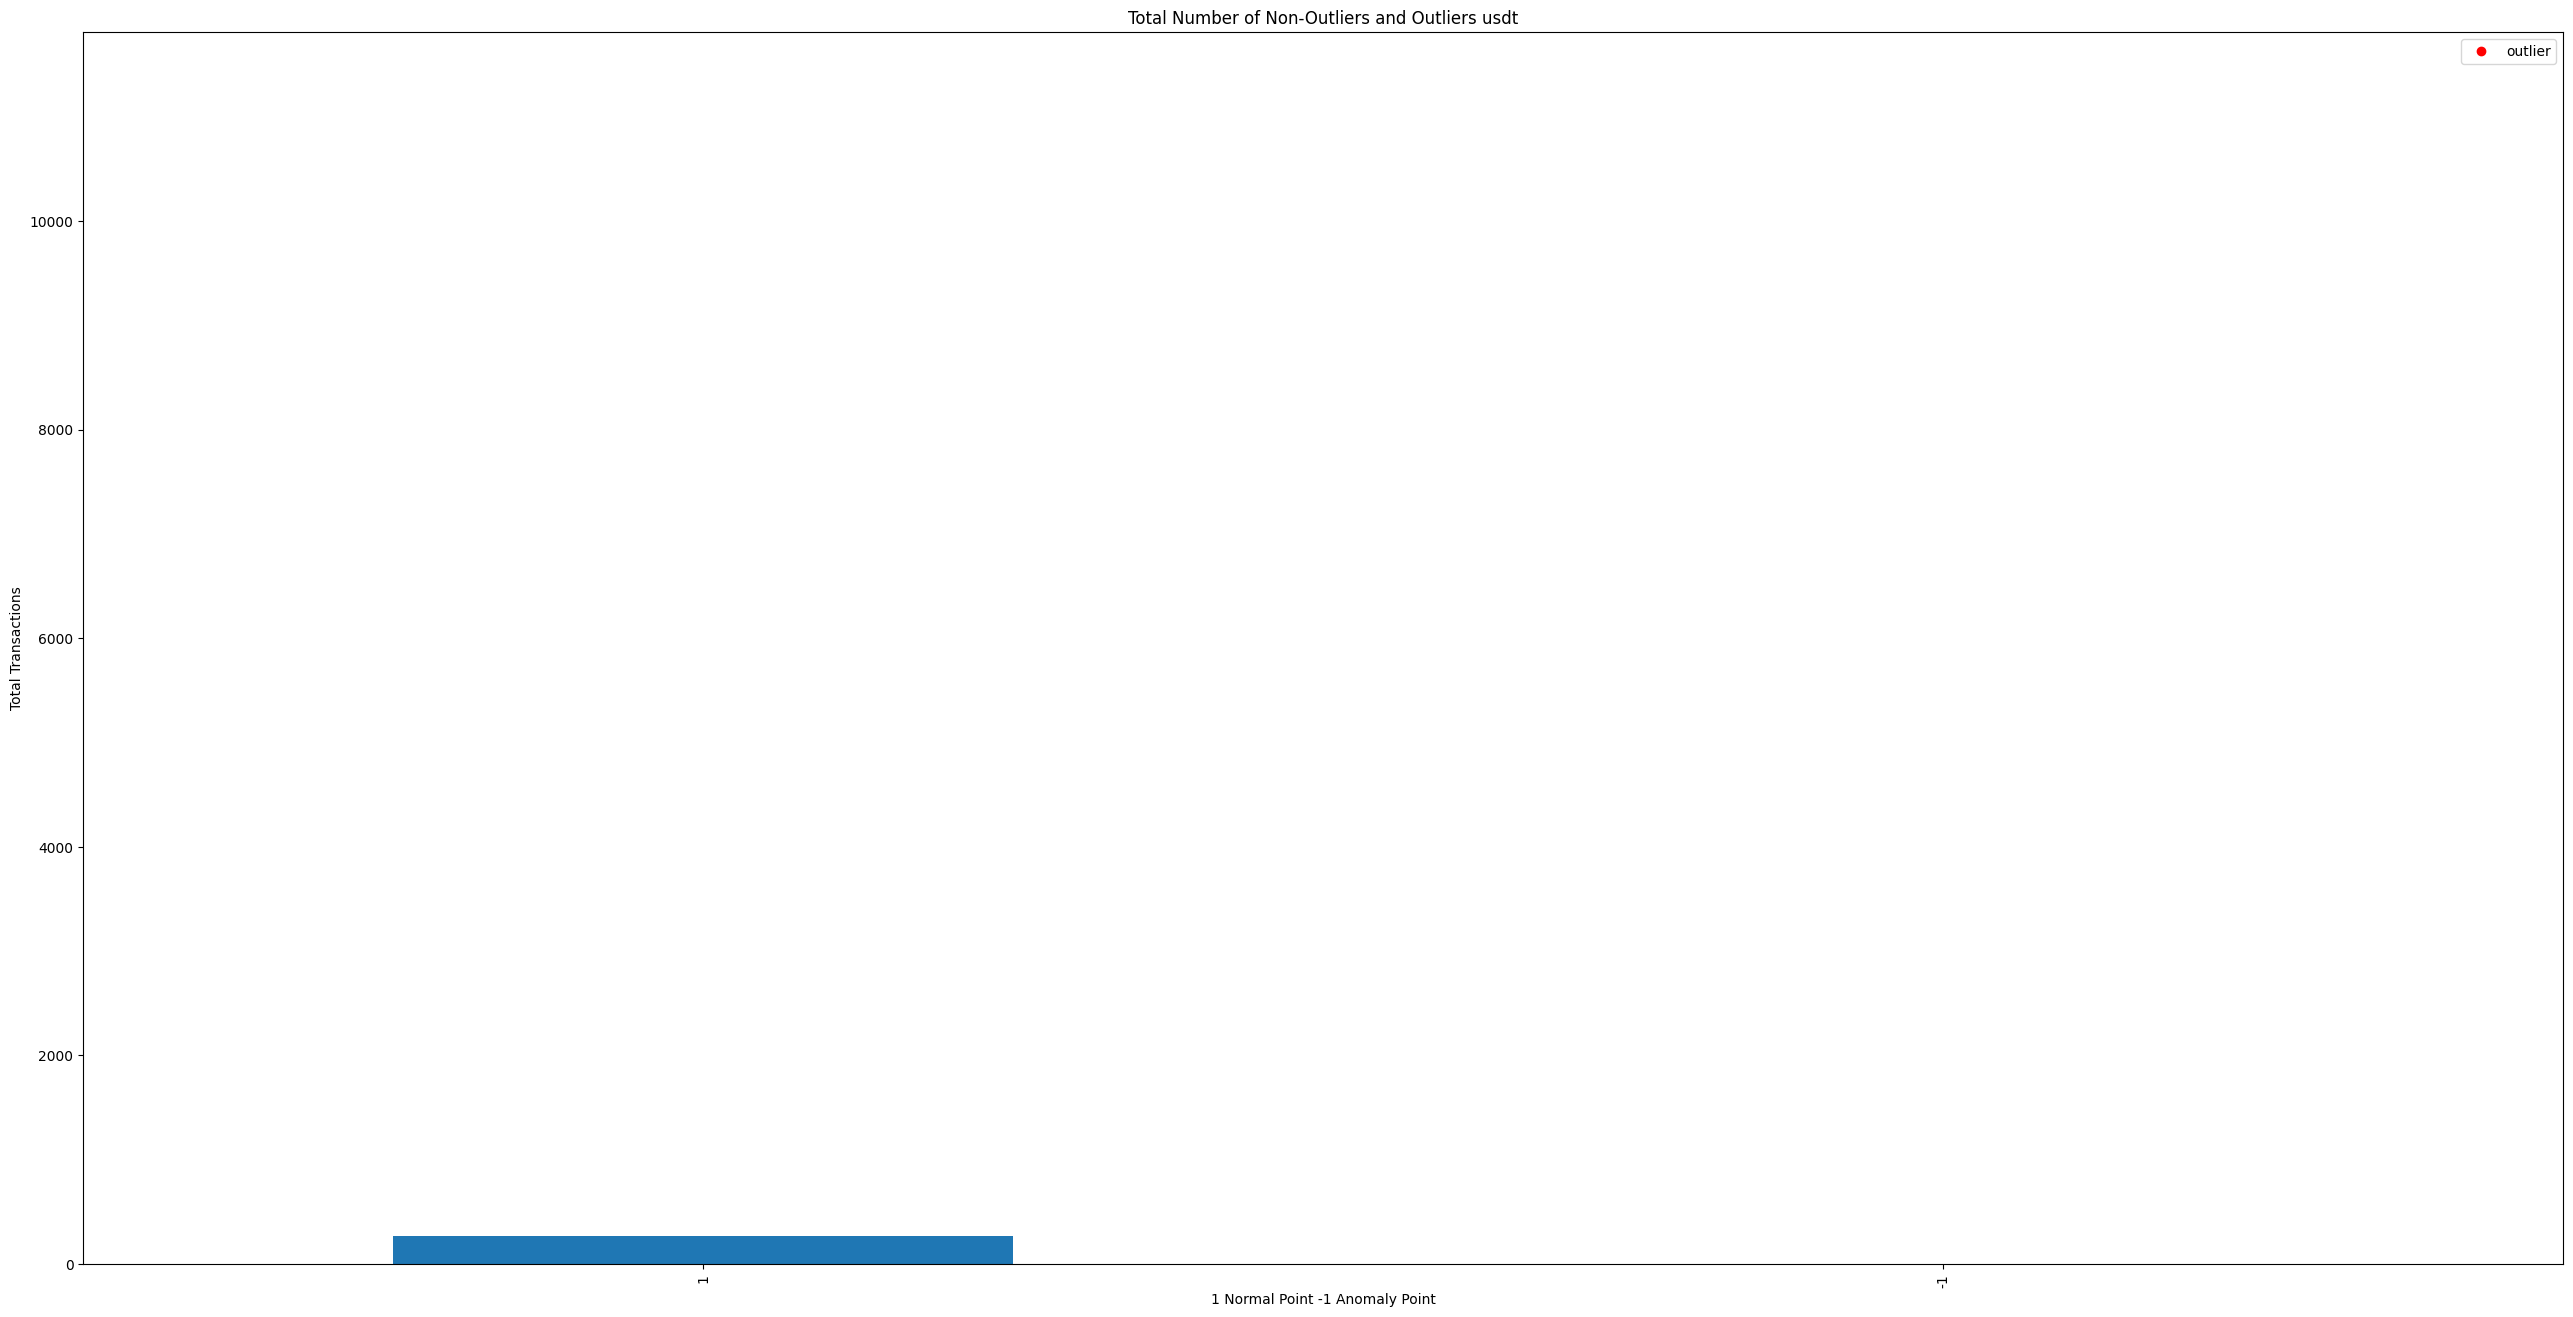

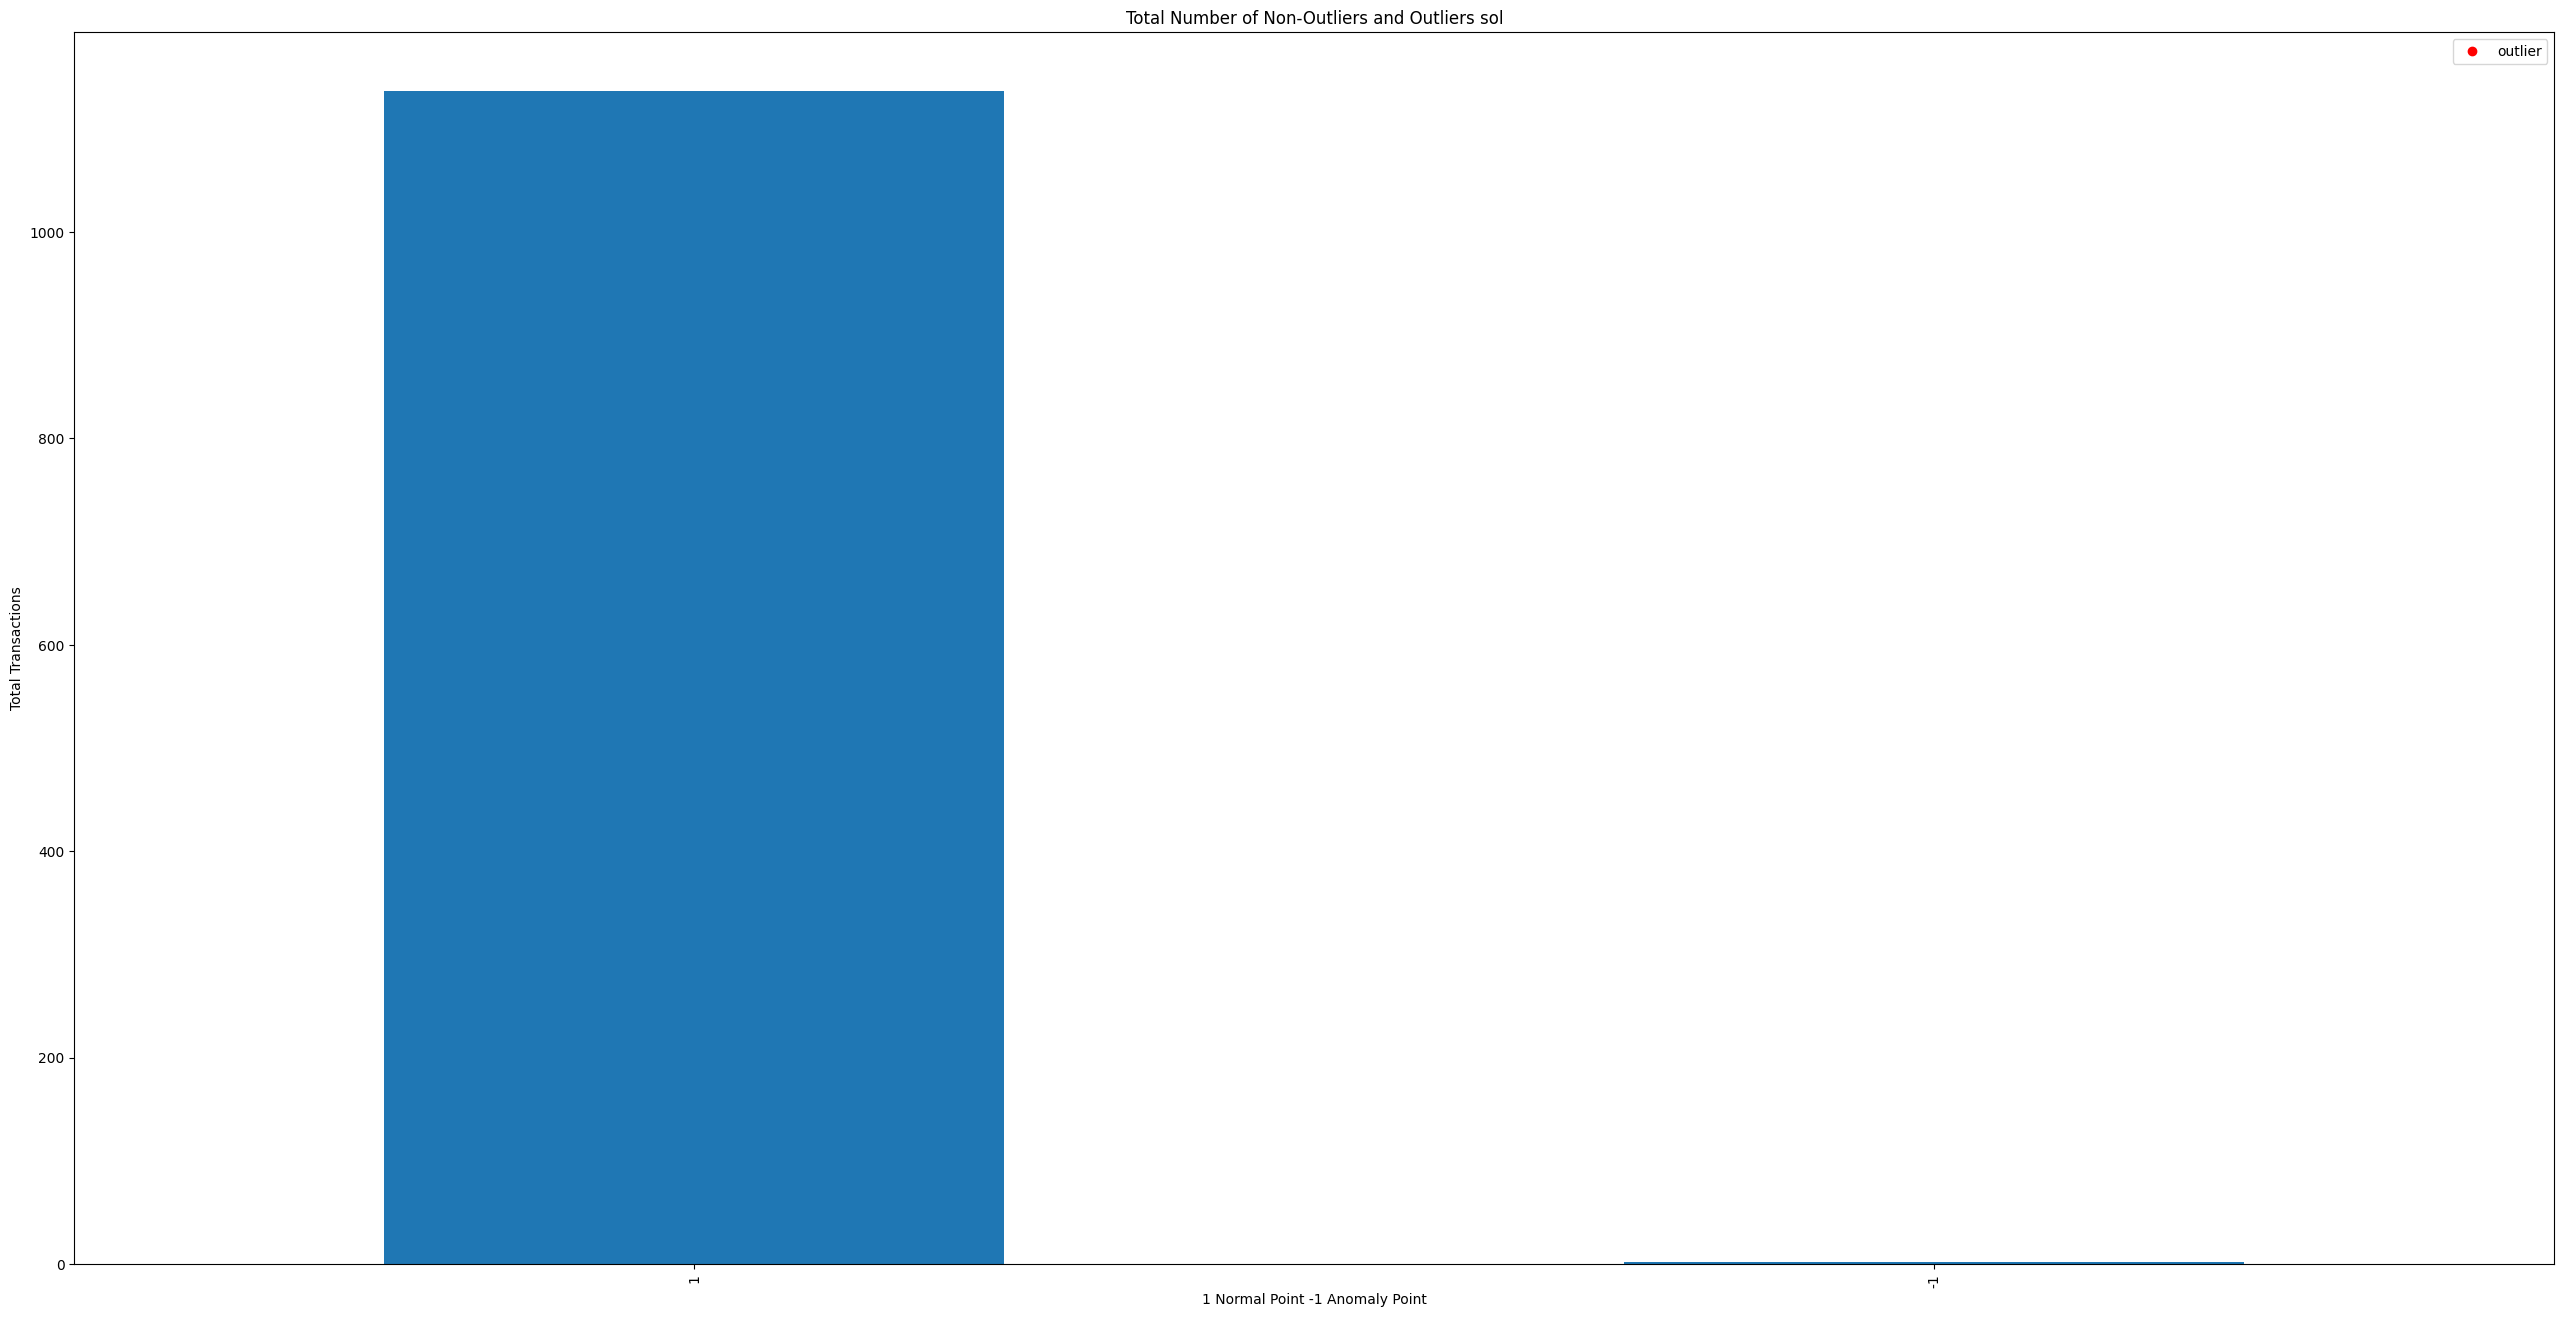

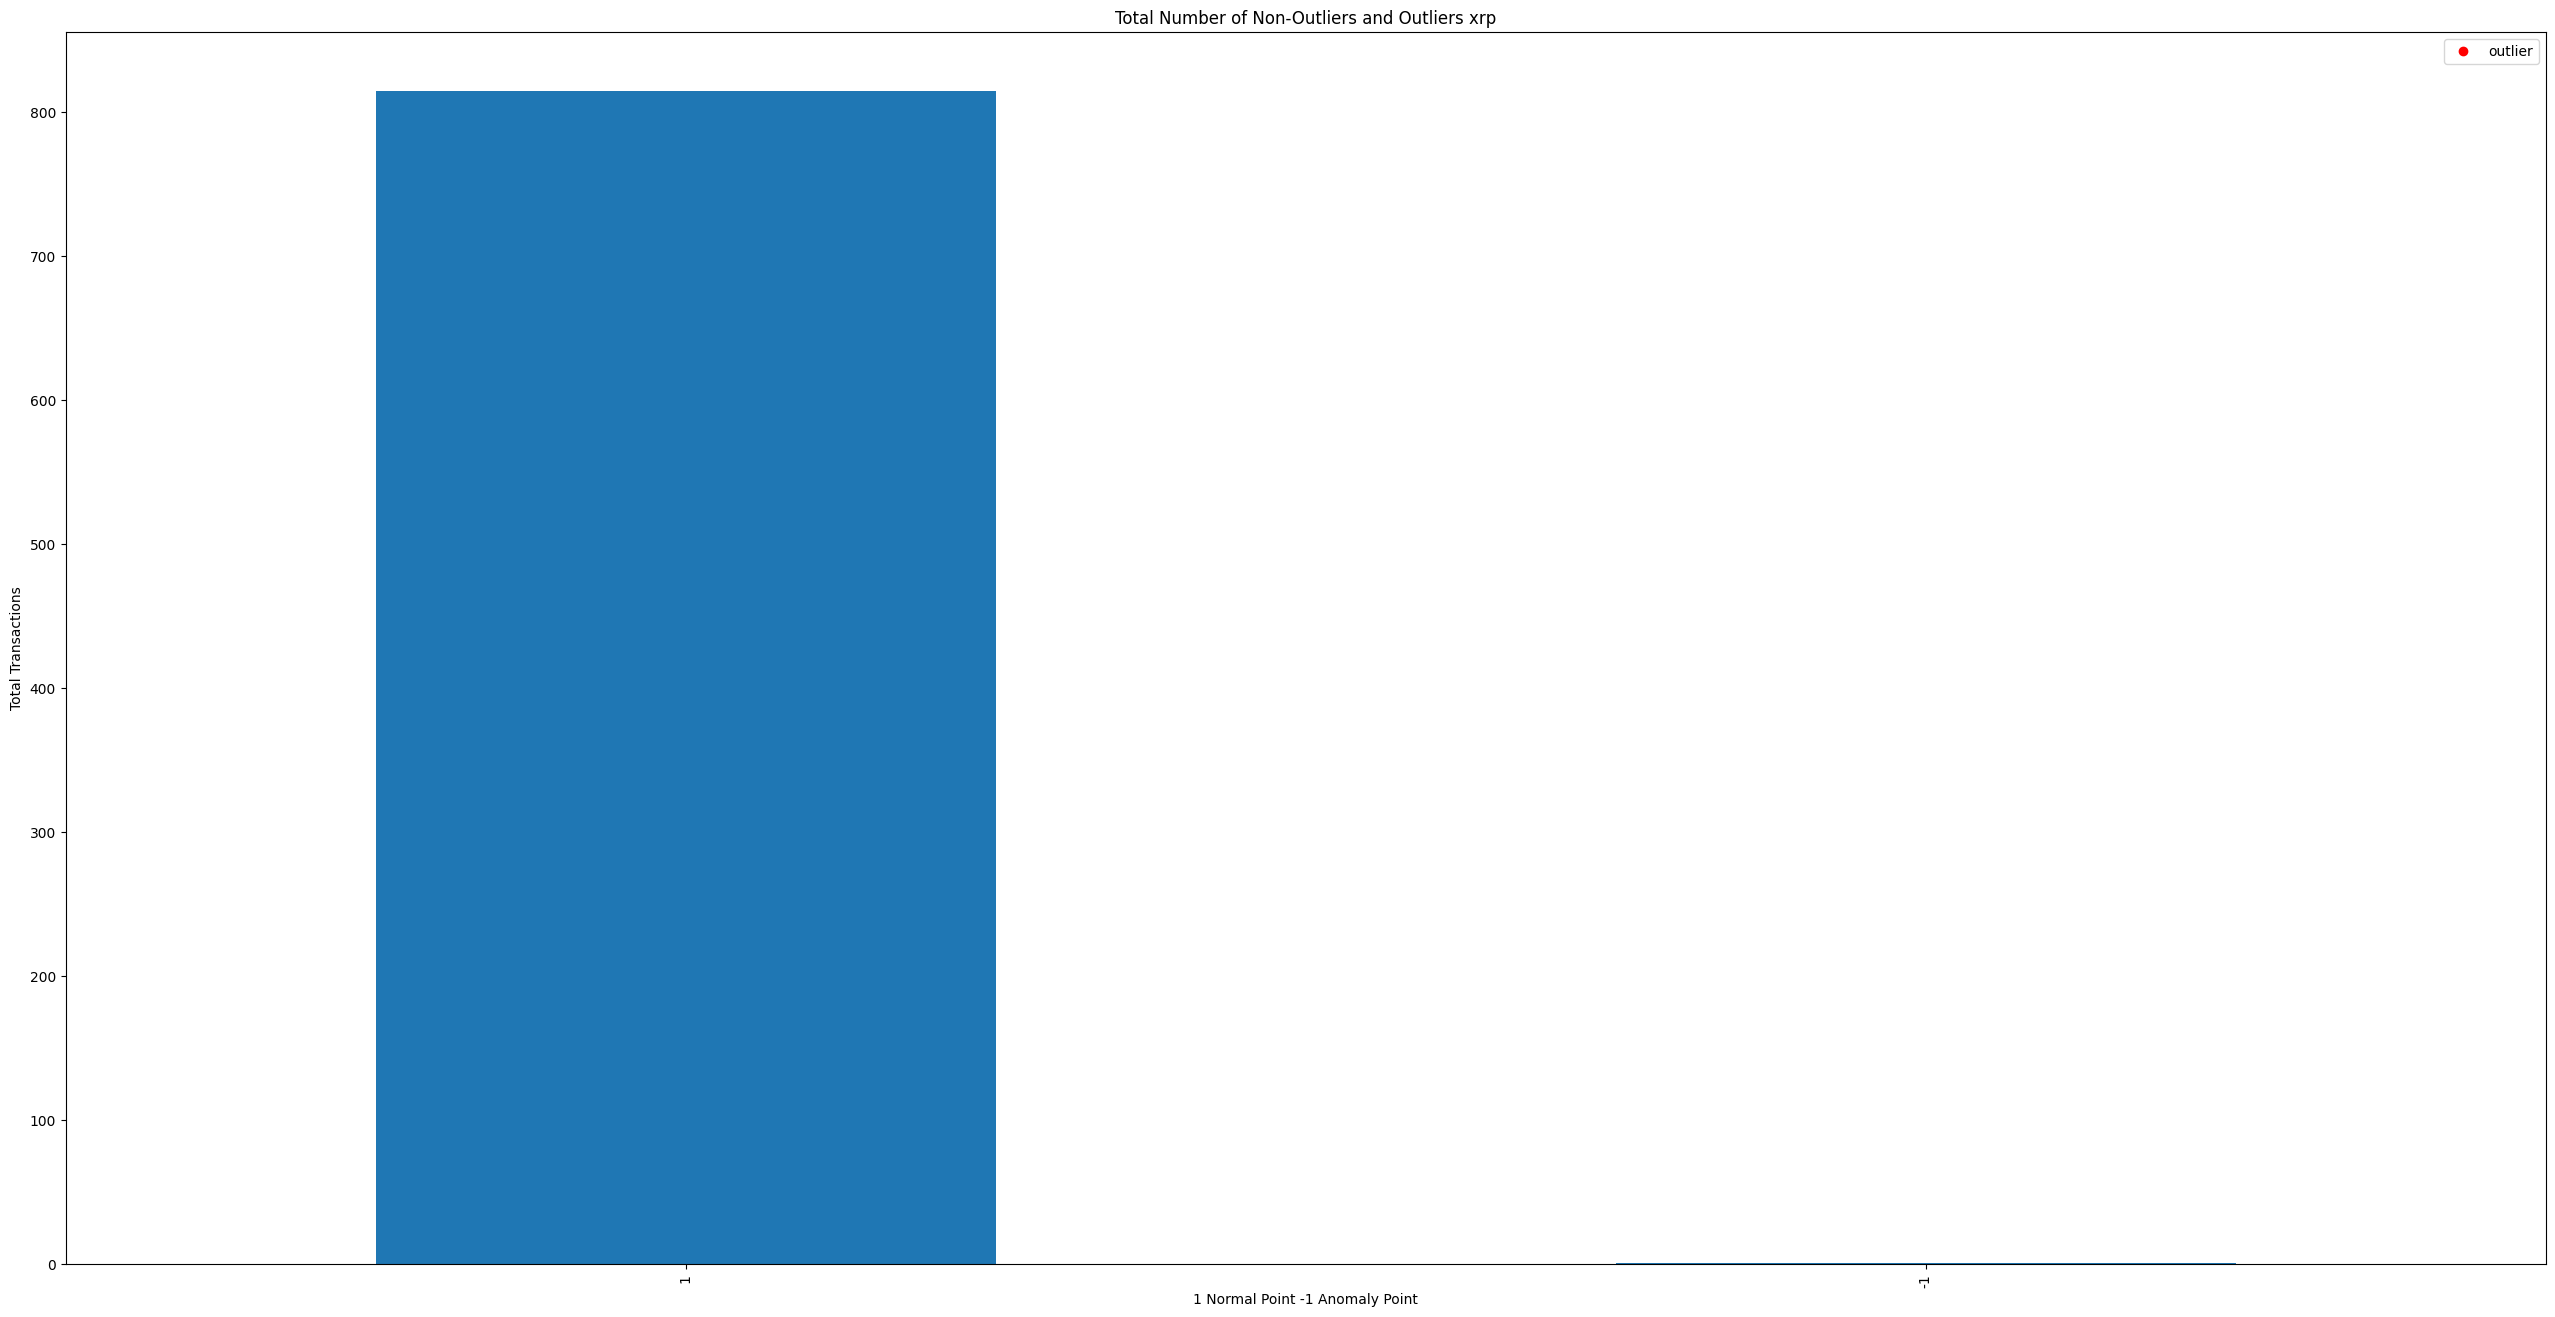

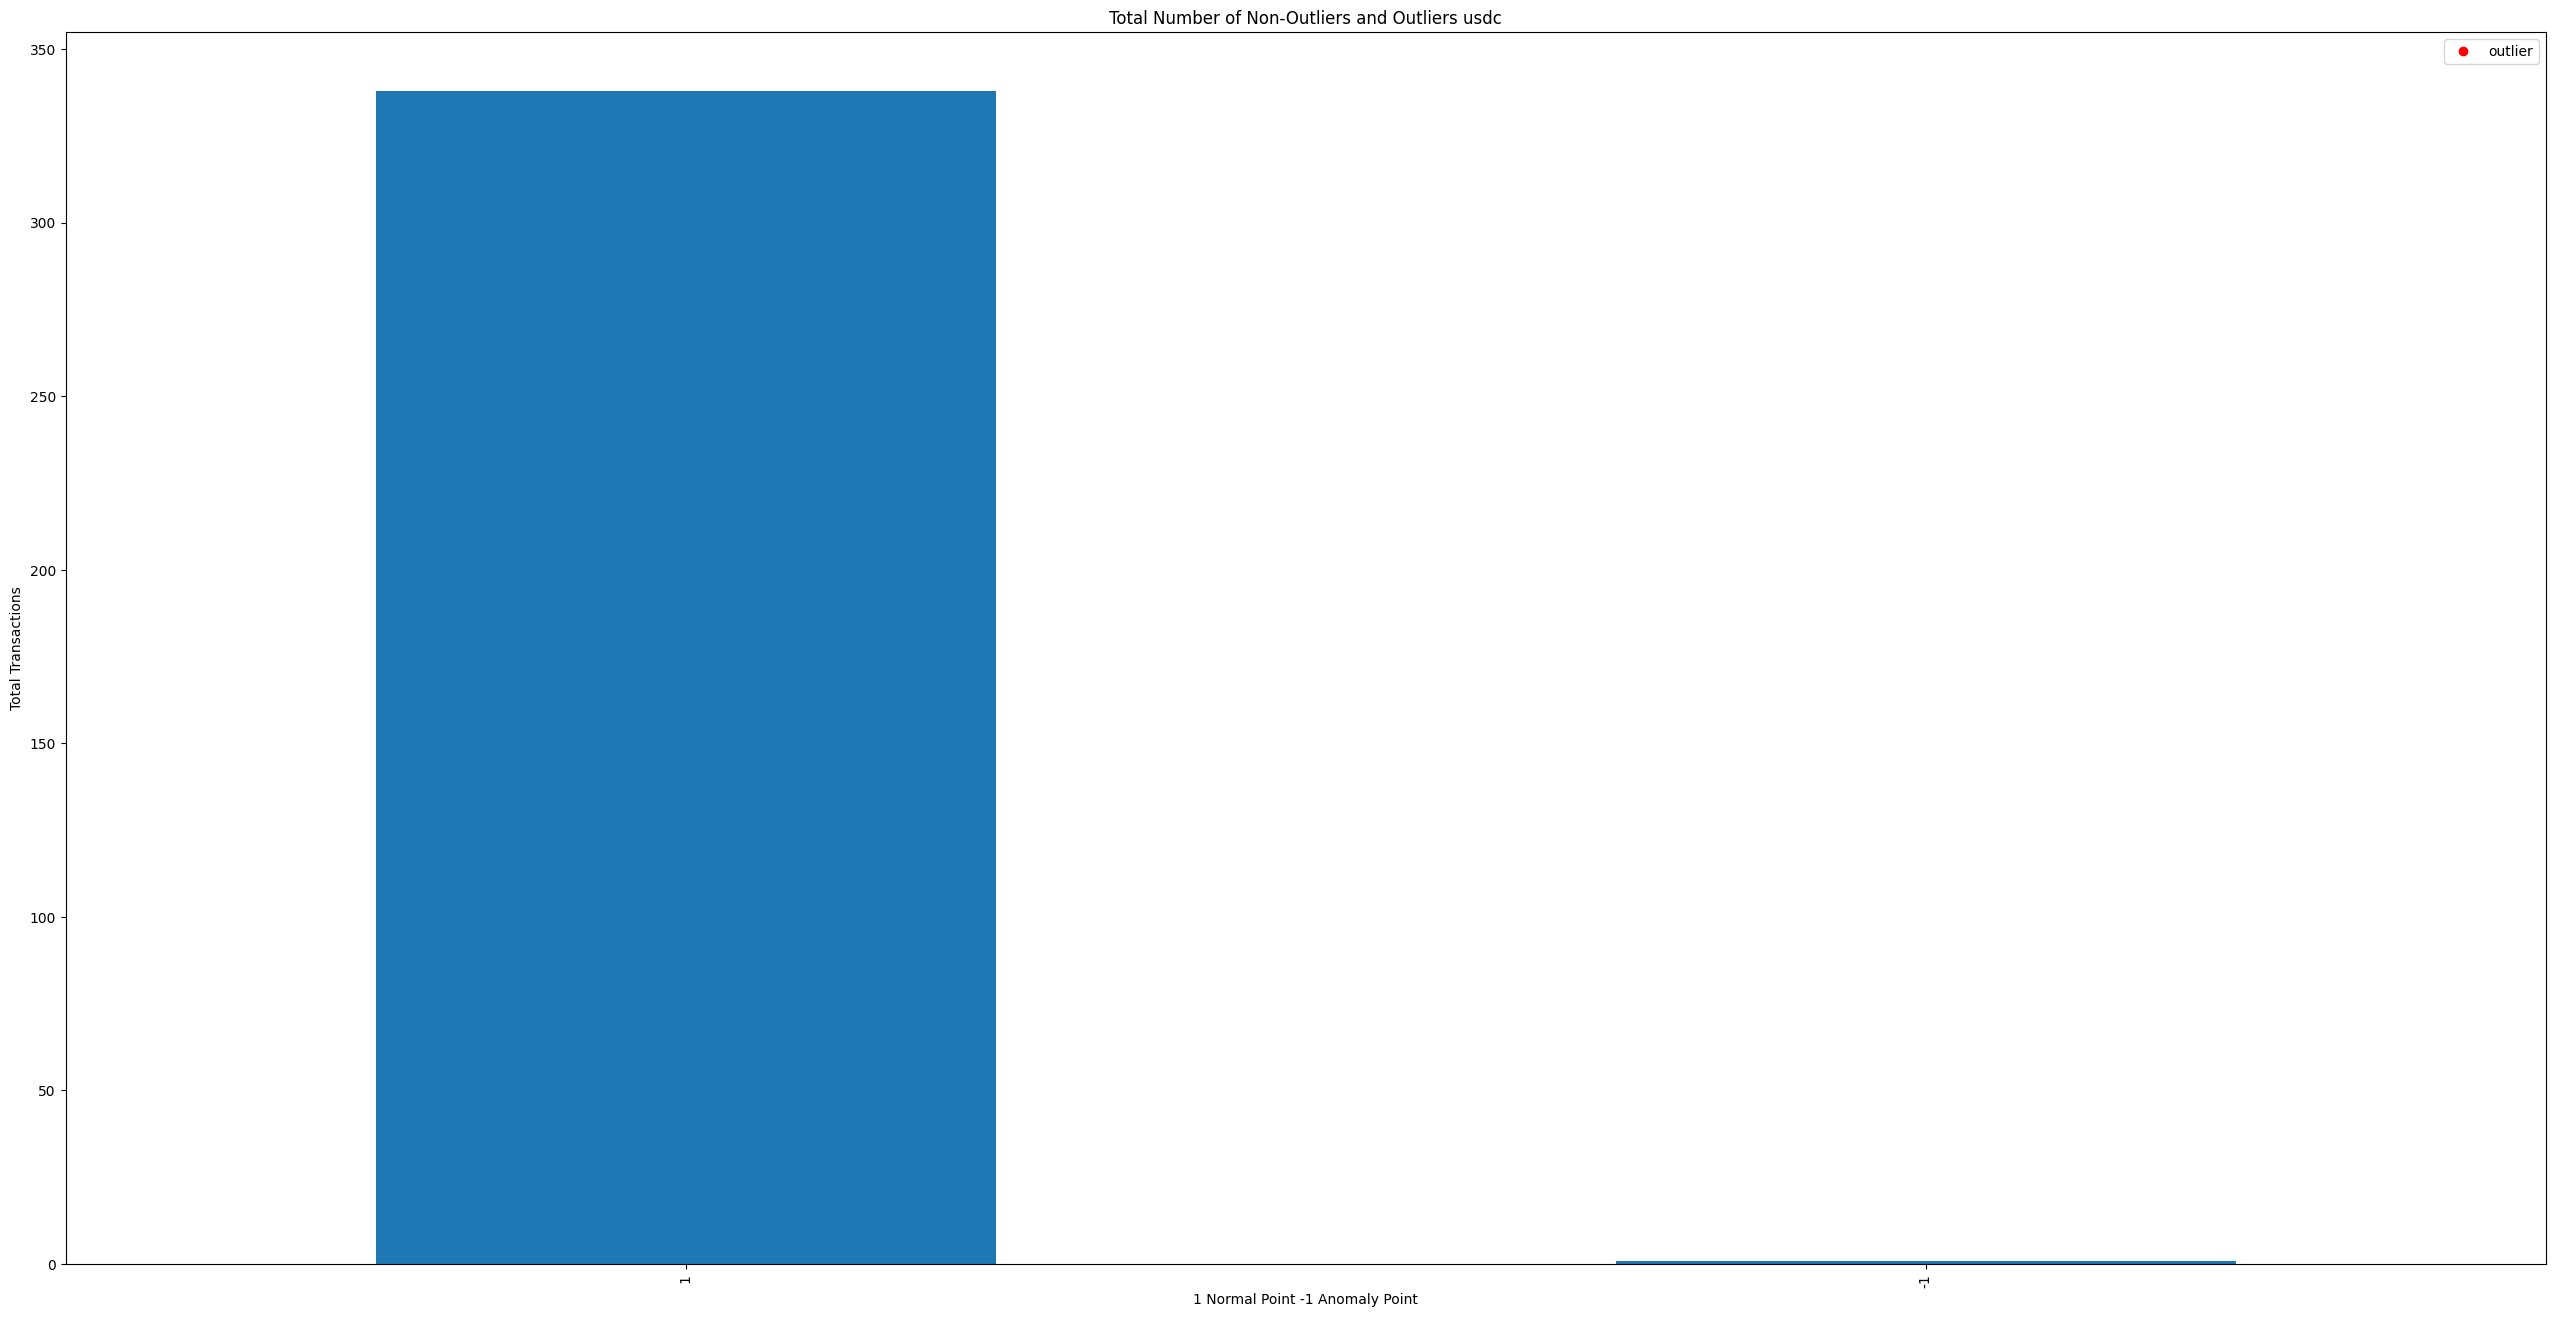

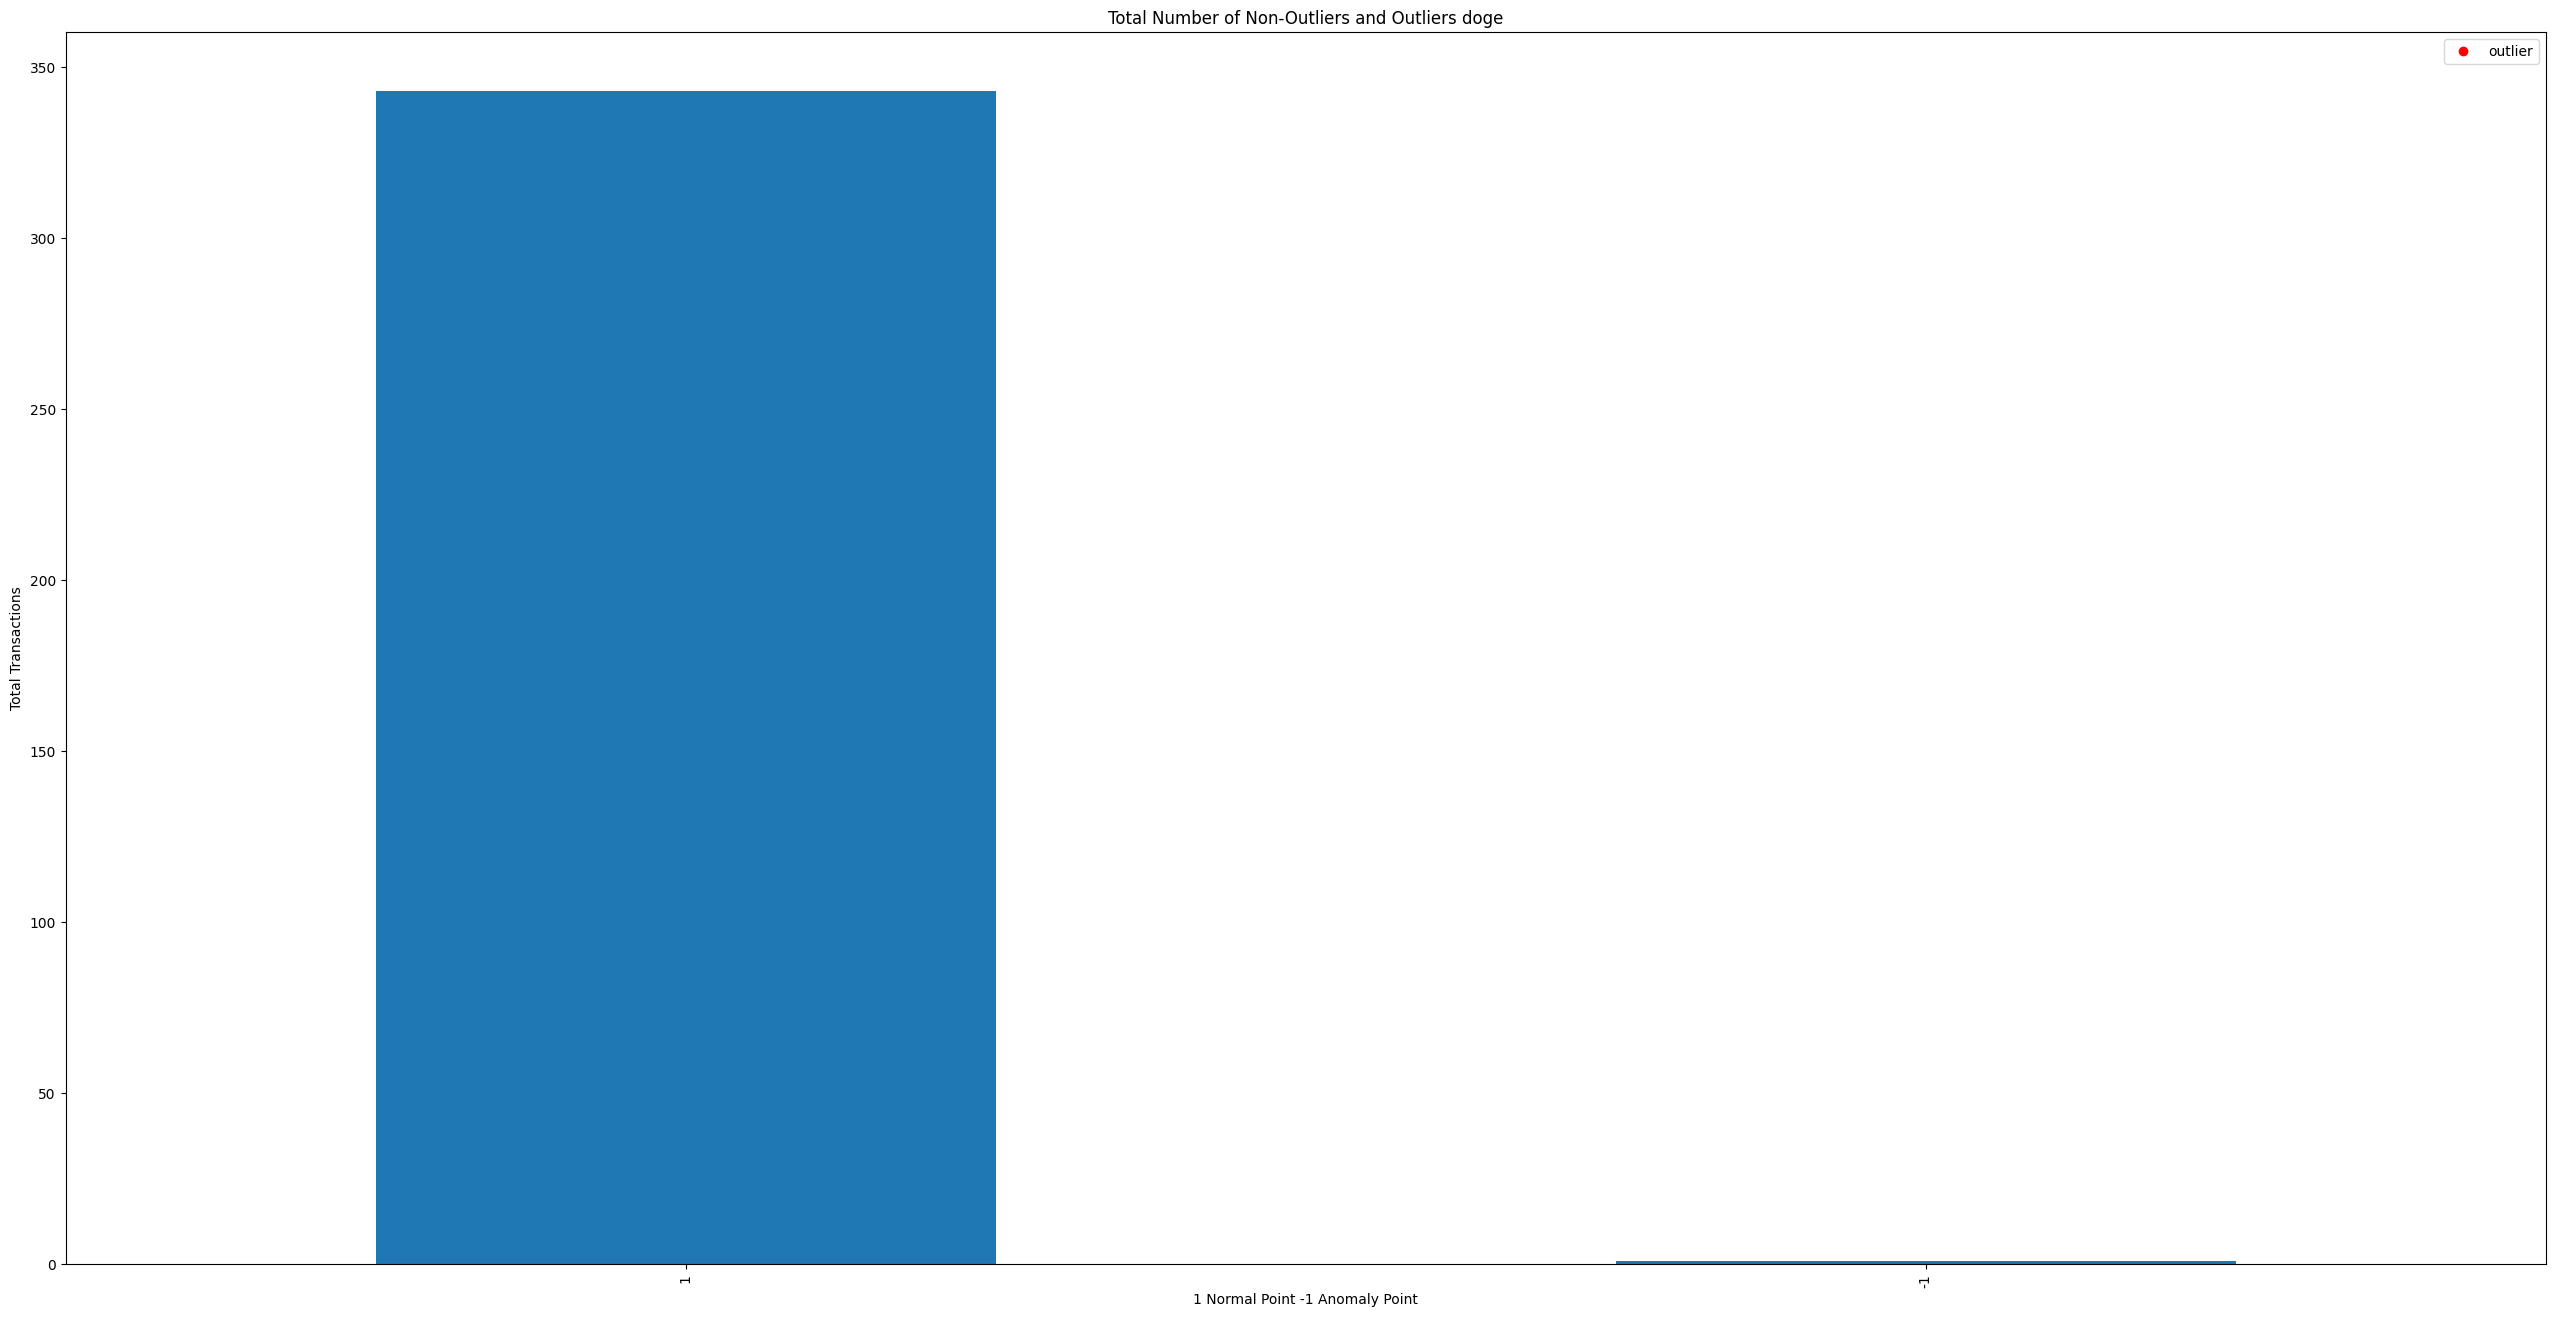

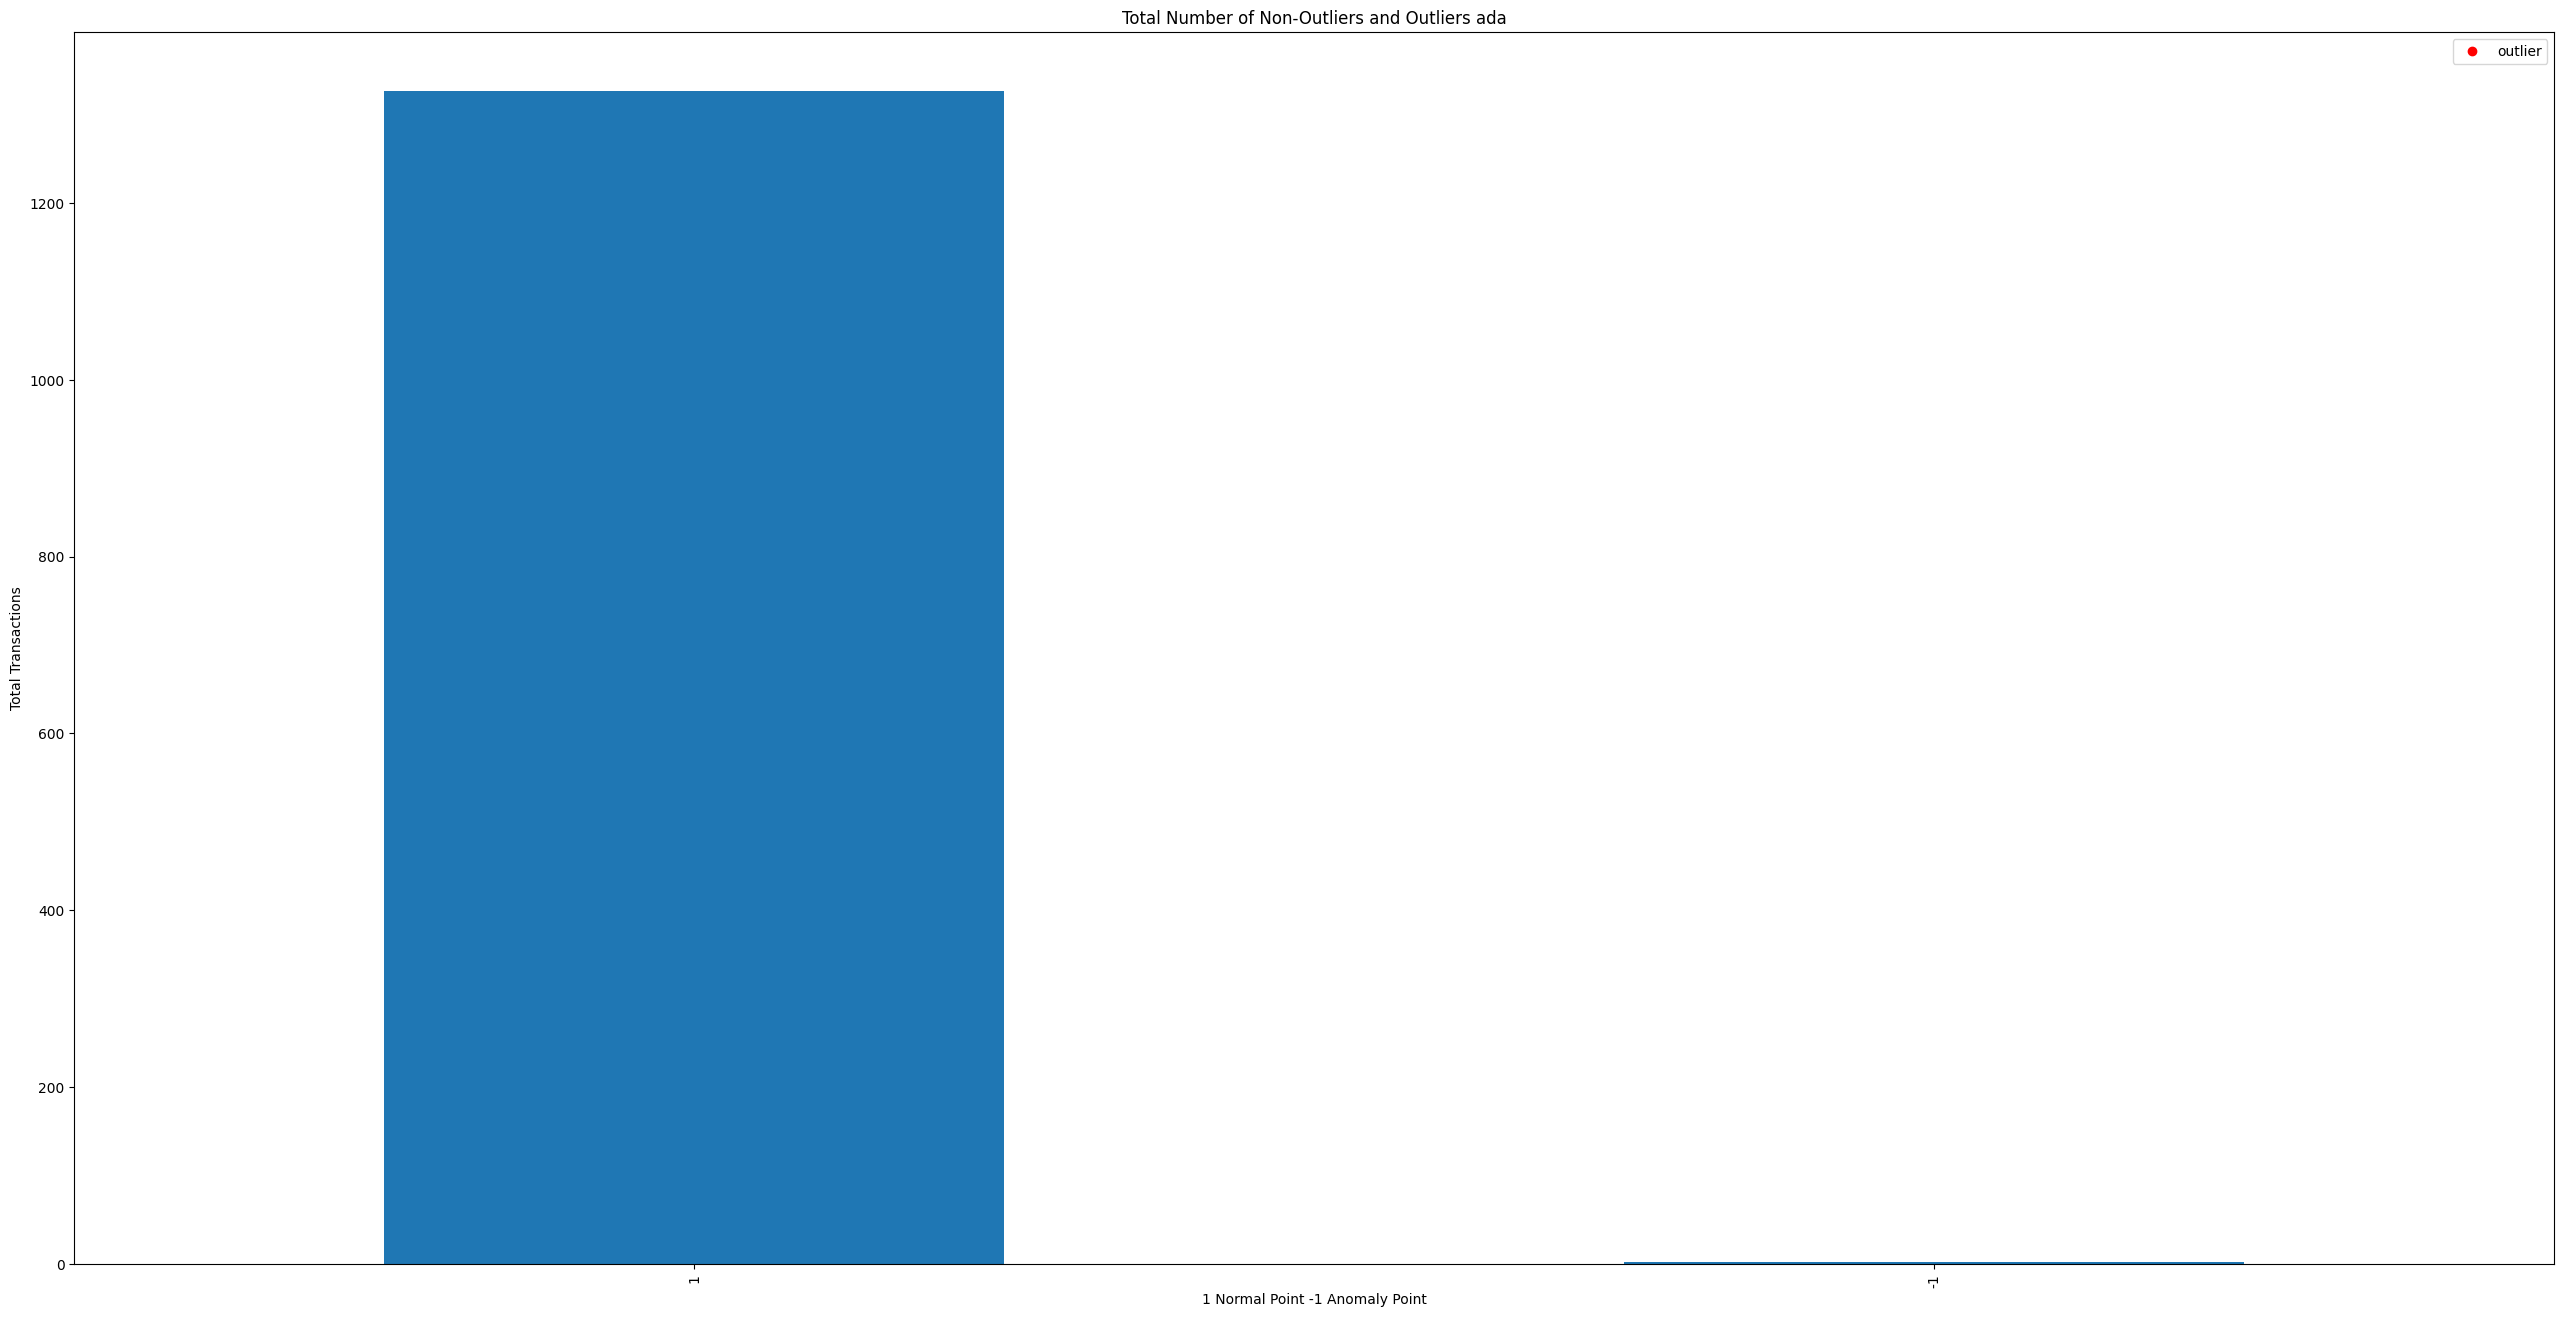

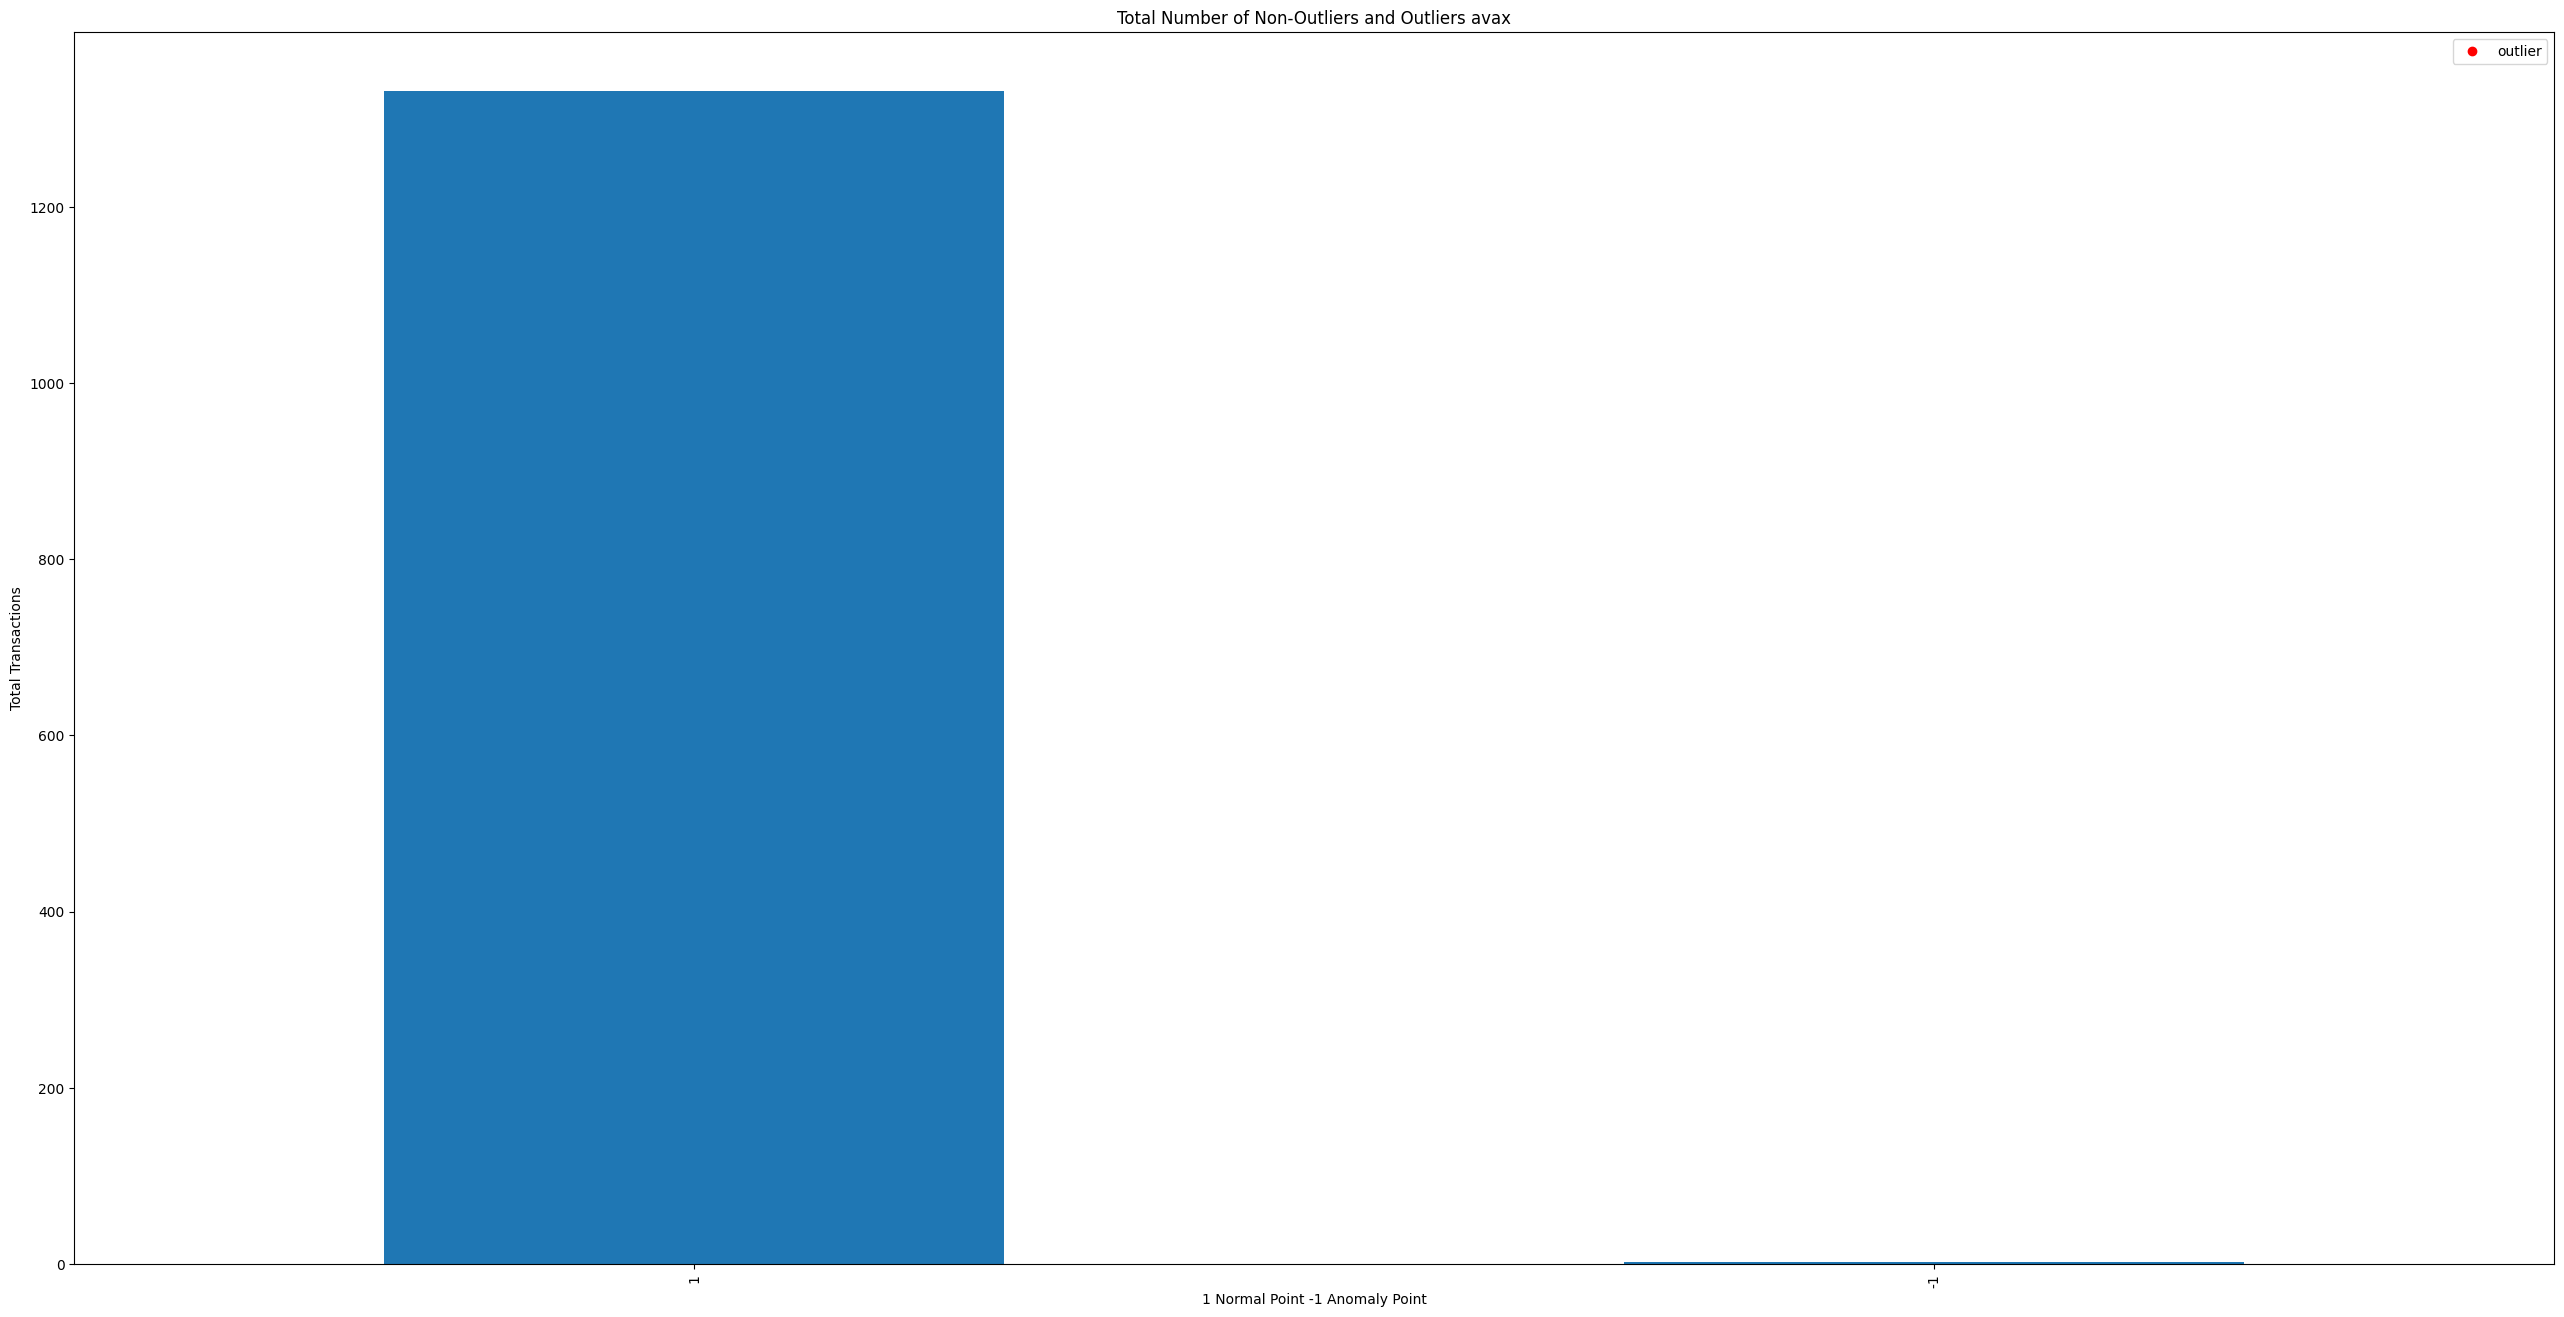

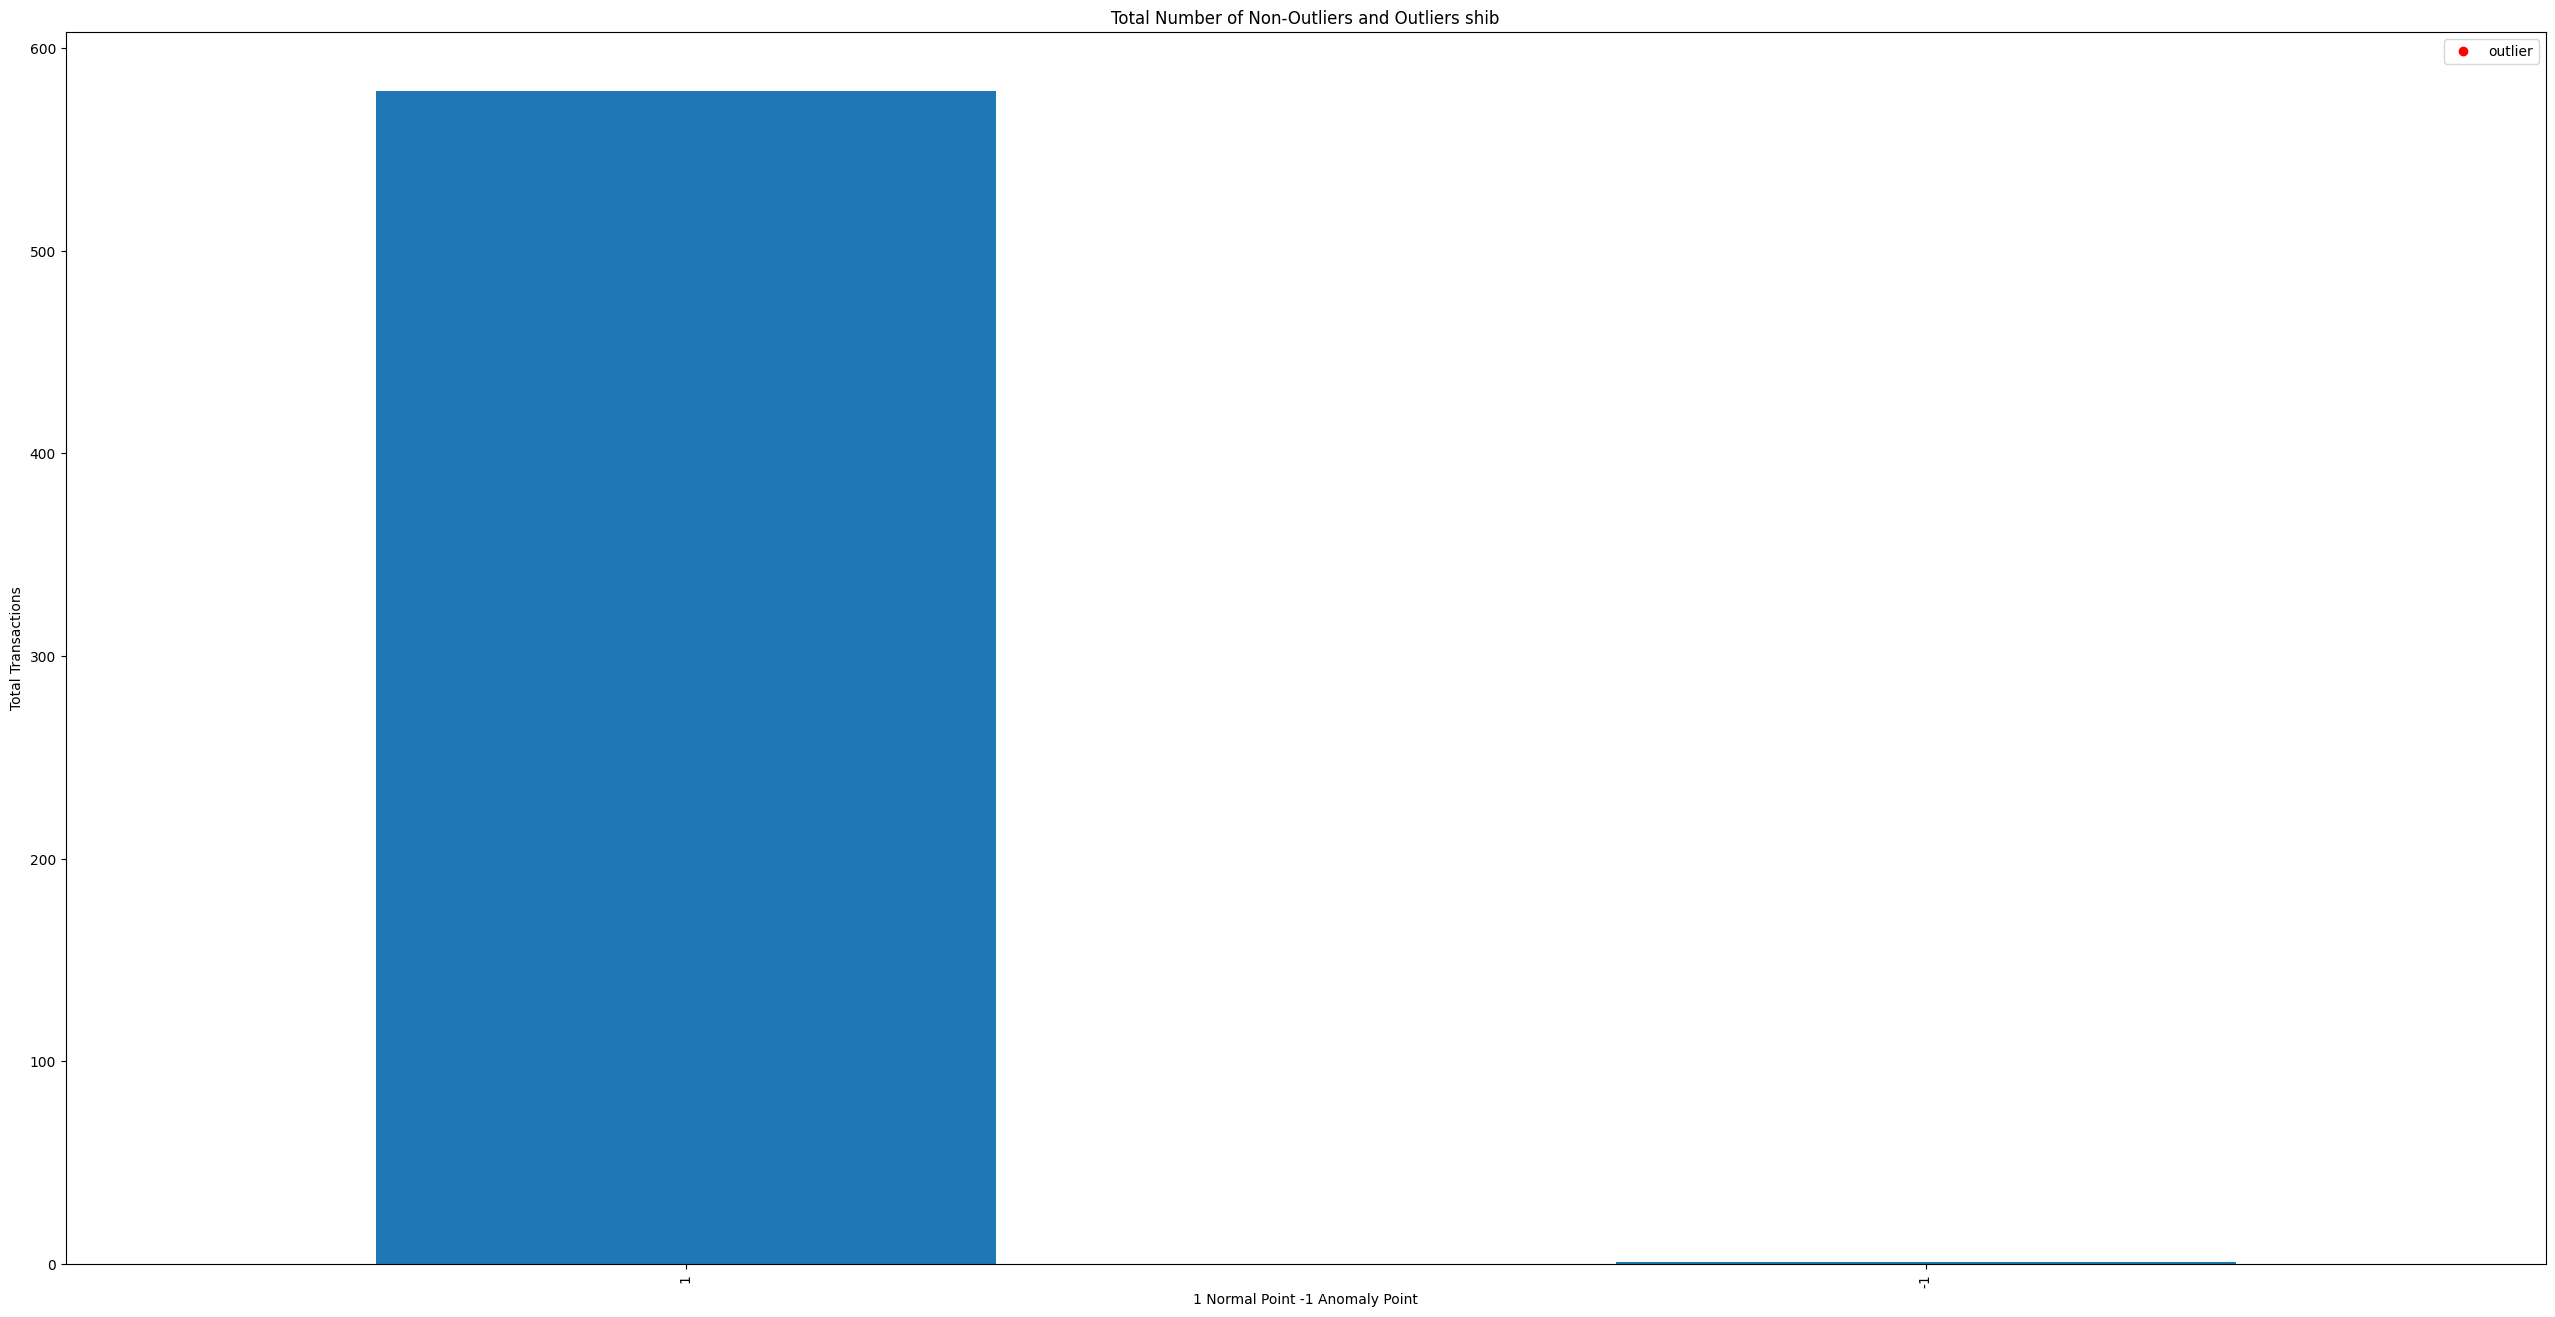

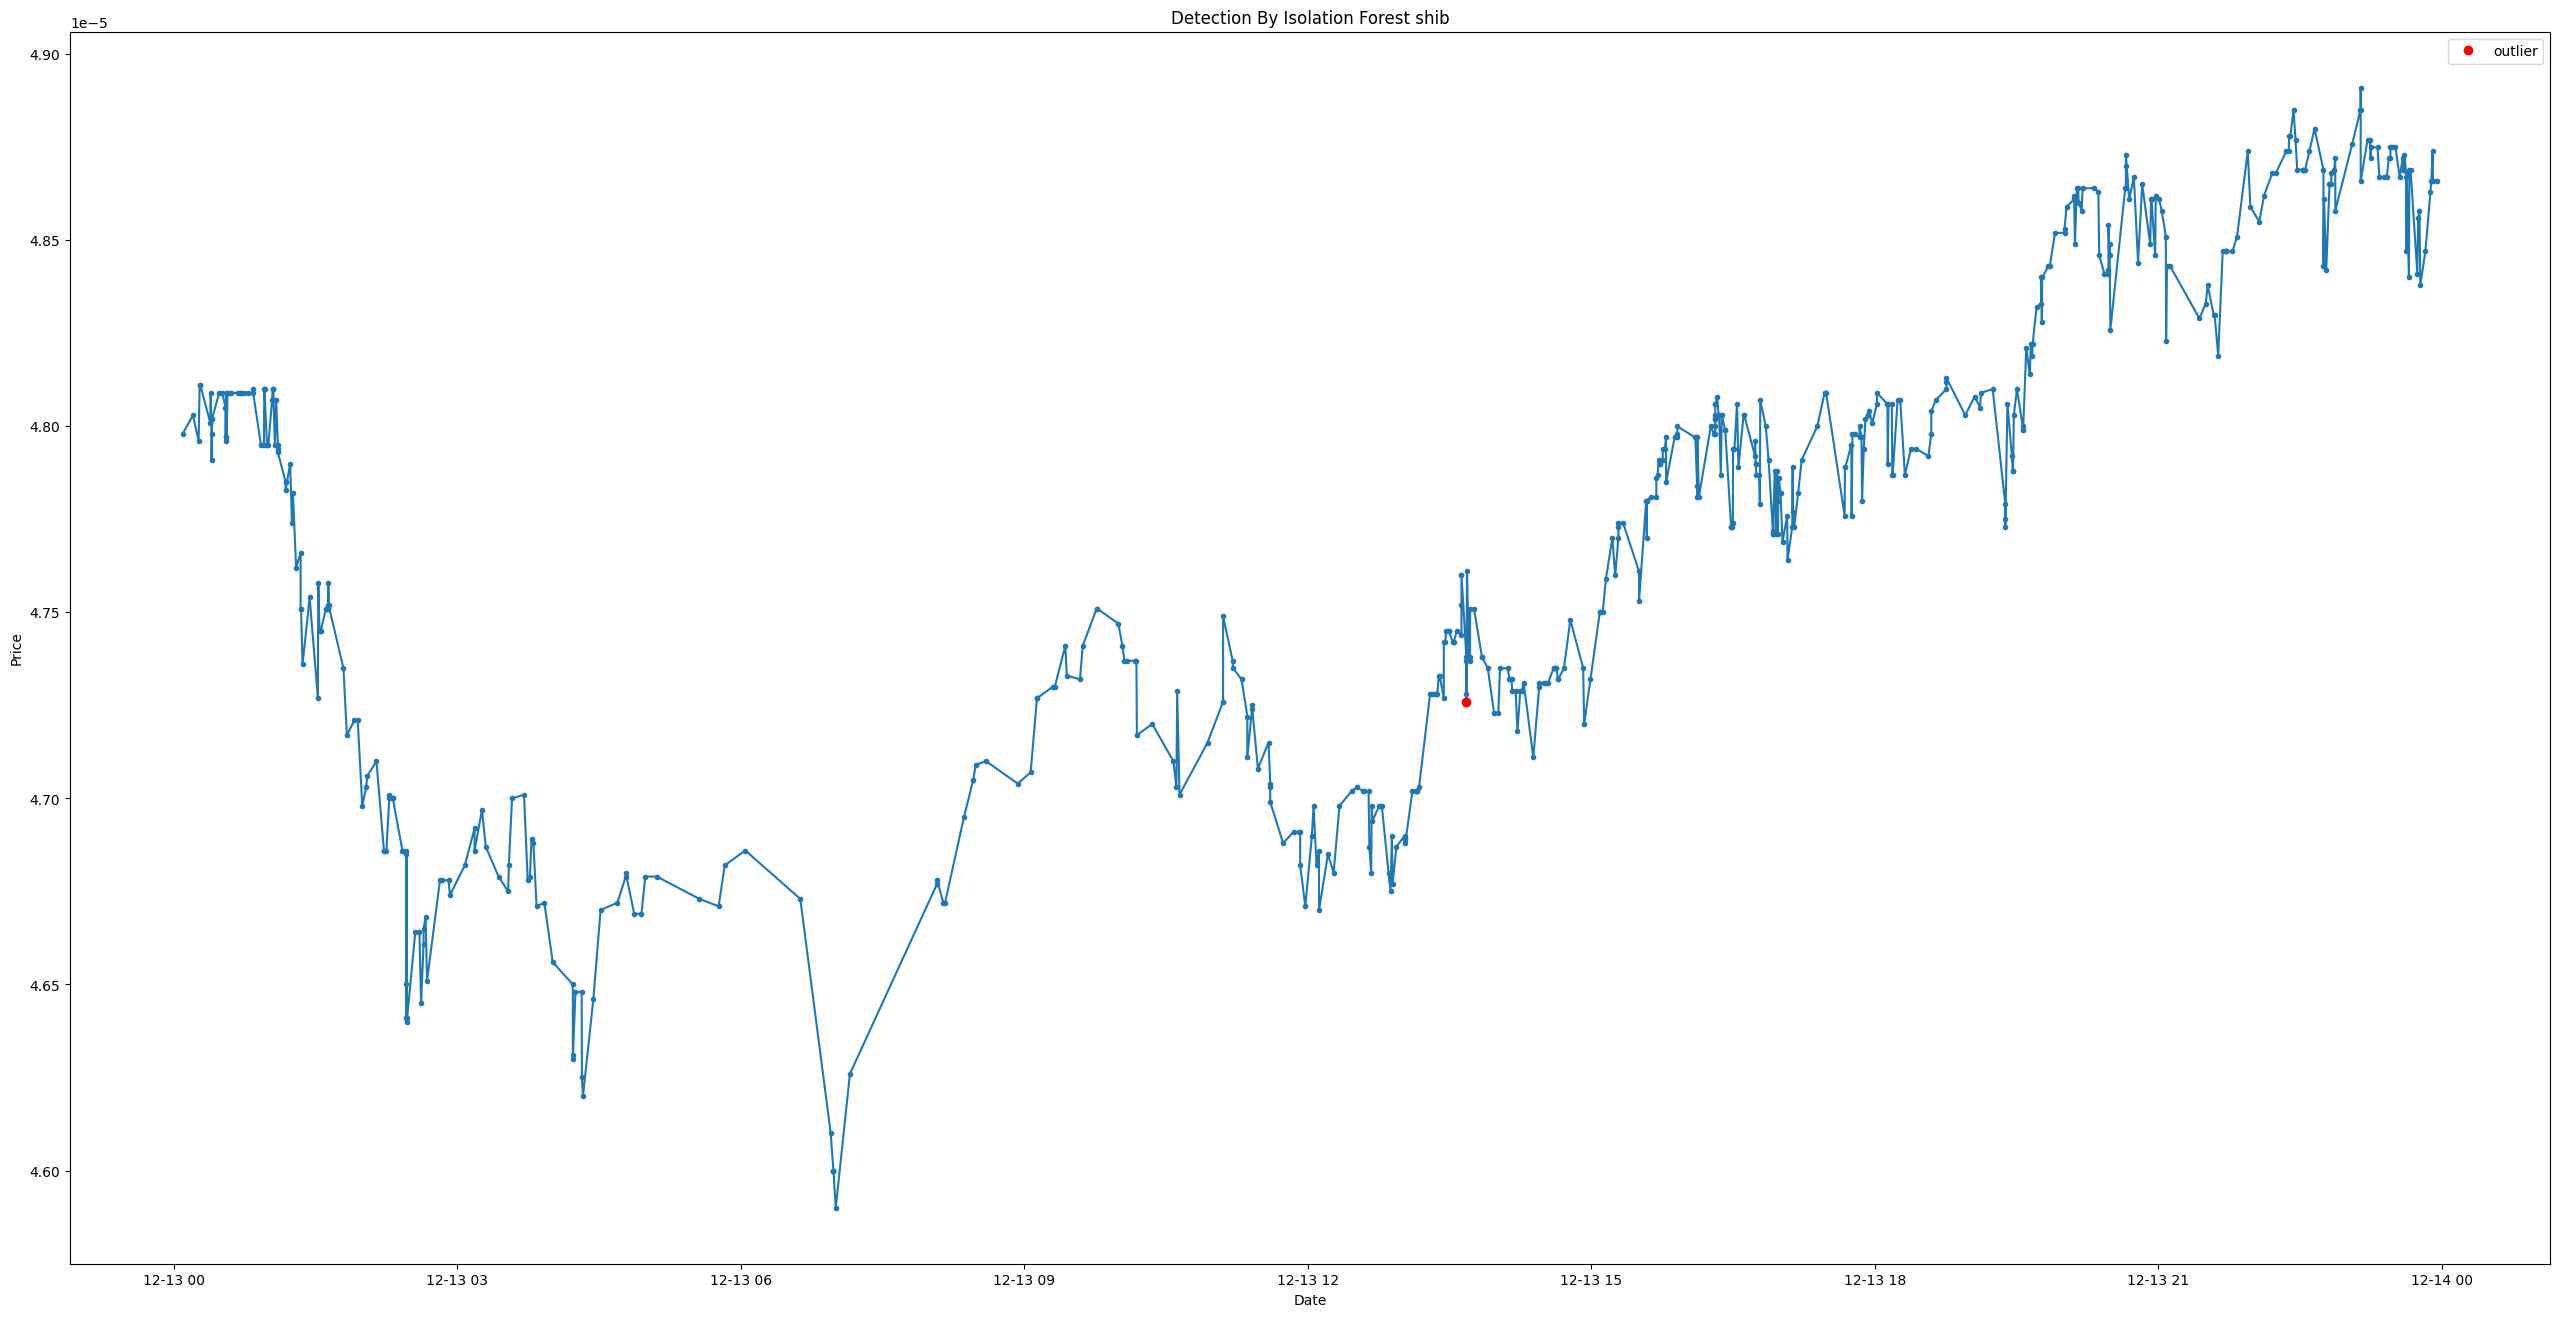

In [234]:
dataset_by_day = dataset_by_time_range(start_date='2023-12-13',
                                        end_date='2023-12-13',
                                        columns=['price', 'amount'])
plot_figures(dataset_by_day, model_day, time_range='day')

#### 1 hour dataset

In [235]:
#initiate the model with 1% contamination

model_hour = IsolationForest(
    n_estimators=1_000,
    max_samples='auto',
    contamination=float(0.1),
    random_state=139,
    n_jobs=-1
)

Total Number of Non-Outliers and Outliers btc:  anomaly_value
 1    83
-1    10
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers eth:  anomaly_value
 1    48
-1     6
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers usdt:  anomaly_value
 1    3
-1    1
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers sol:  anomaly_value
 1    45
-1     5
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers xrp:  anomaly_value
 1    11
-1     2
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers usdc:  anomaly_value
 1    2
-1    1
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers doge:  anomaly_value
 1    11
-1     2
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers ada:  anomaly_value
 1    15
-1     2
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers avax:  anomaly_value
 1    10
-1     1
Name: count, dtype: int64
Total Number of Non-Outliers and Outliers shib

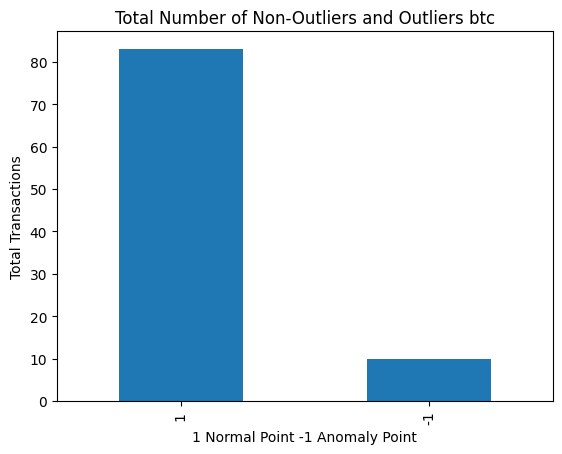

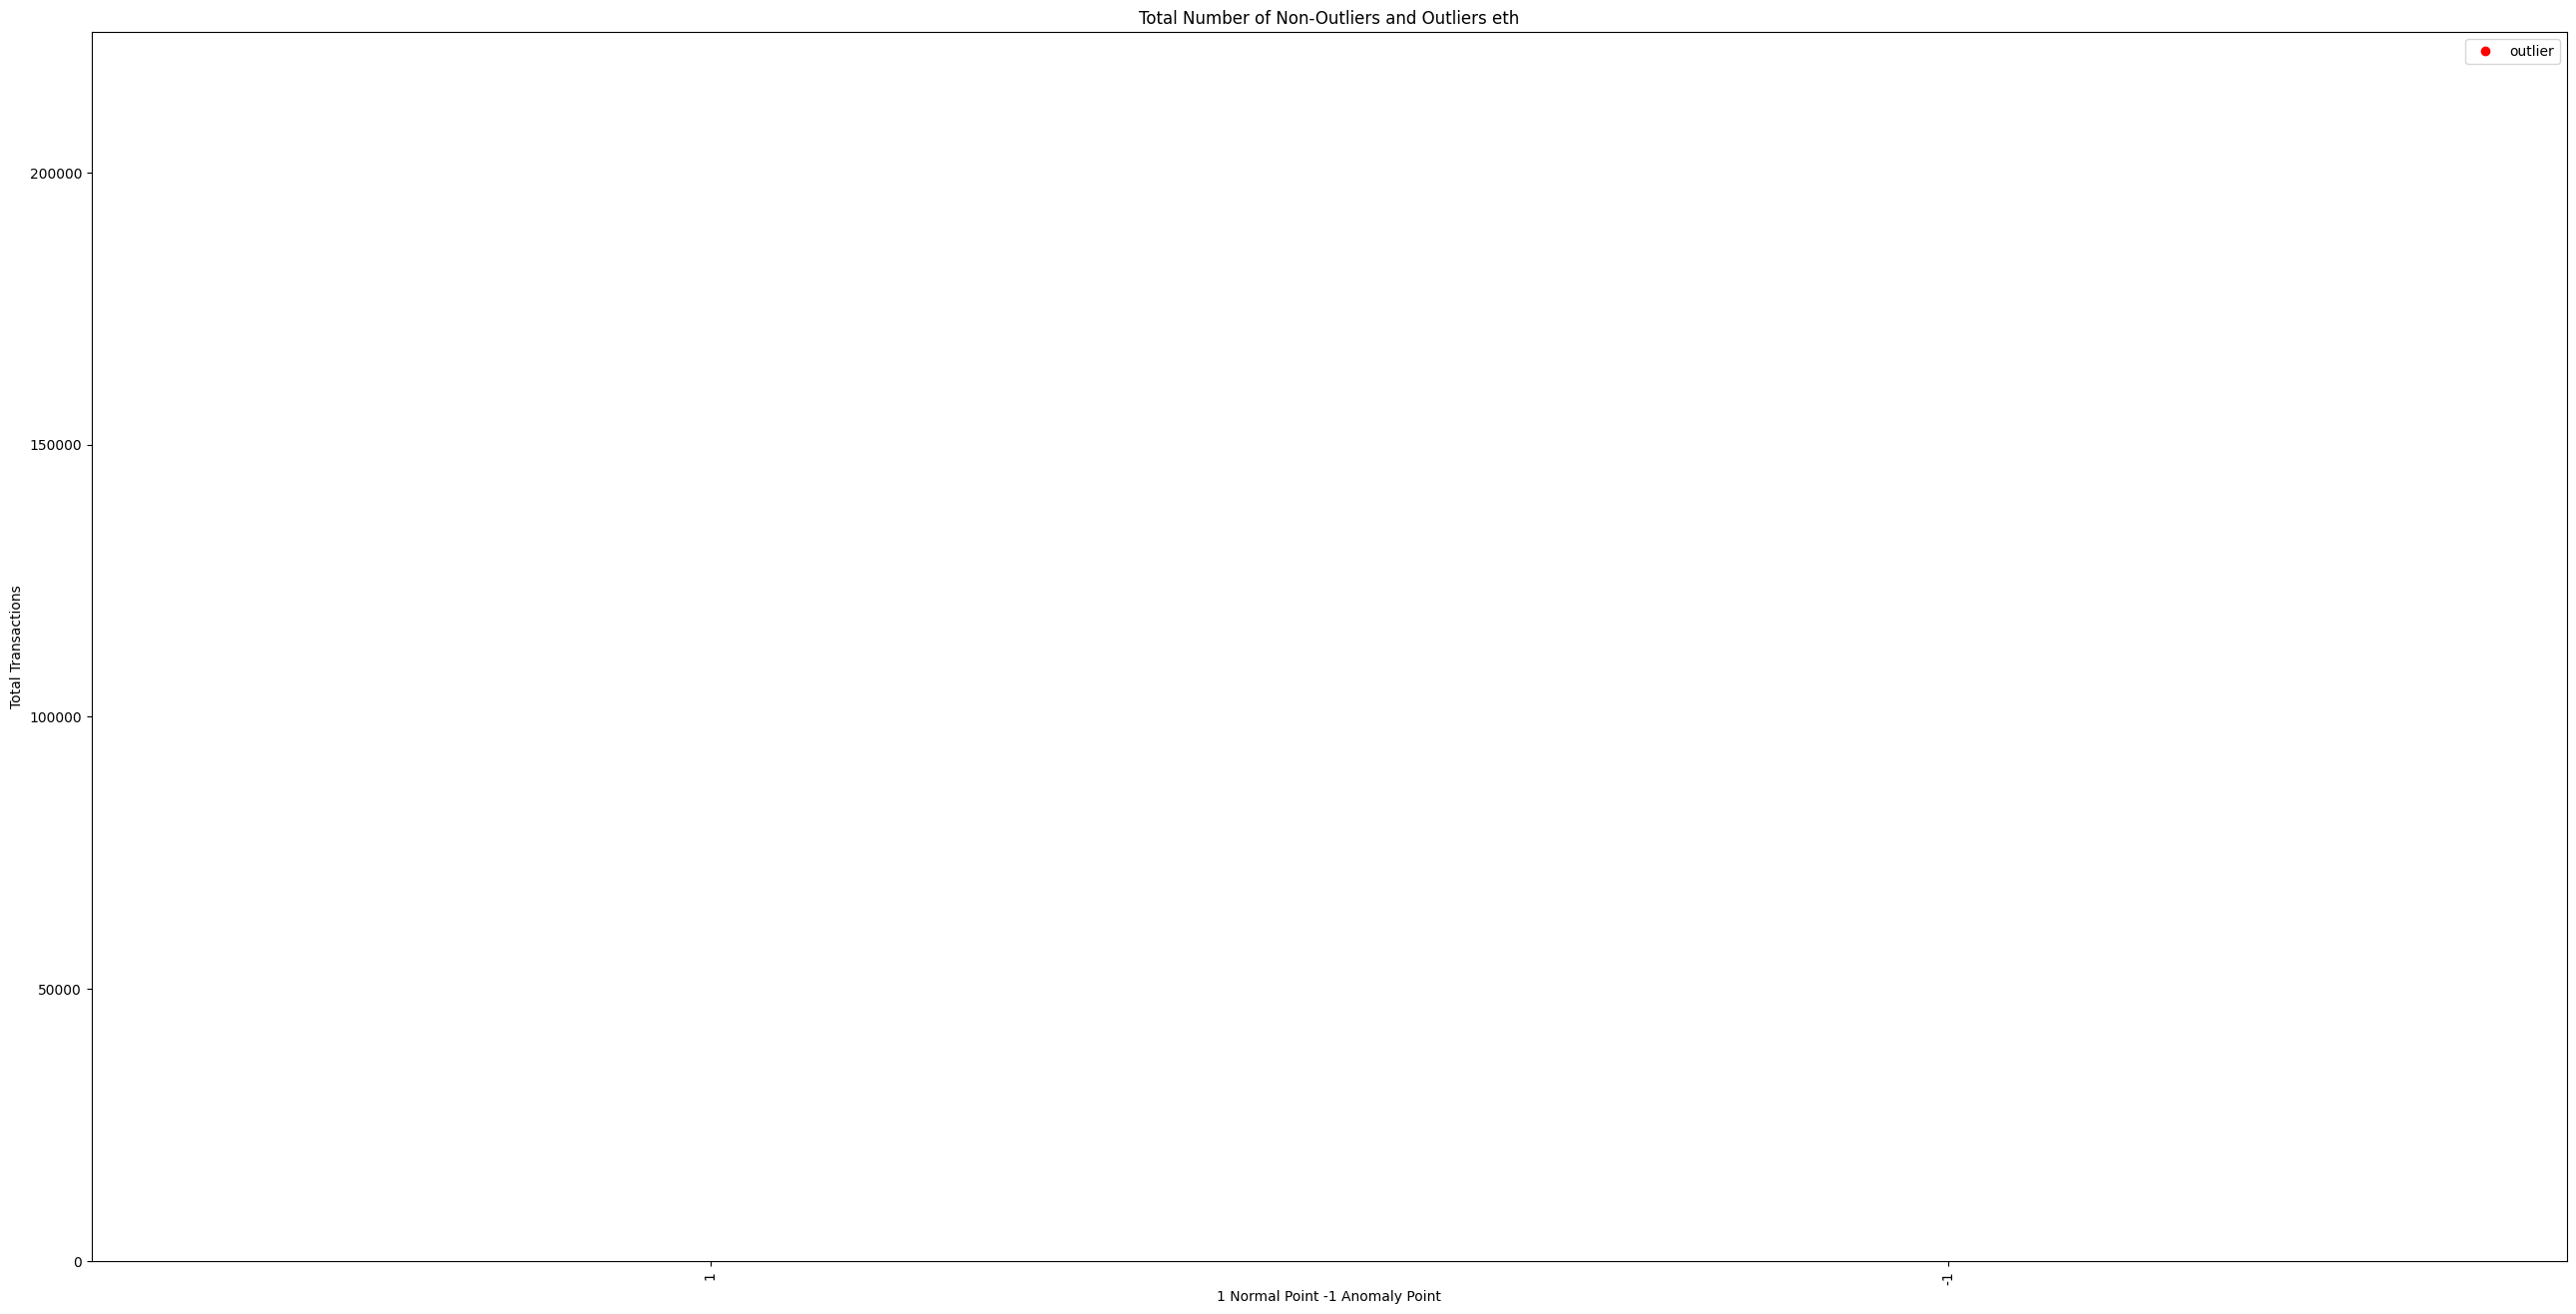

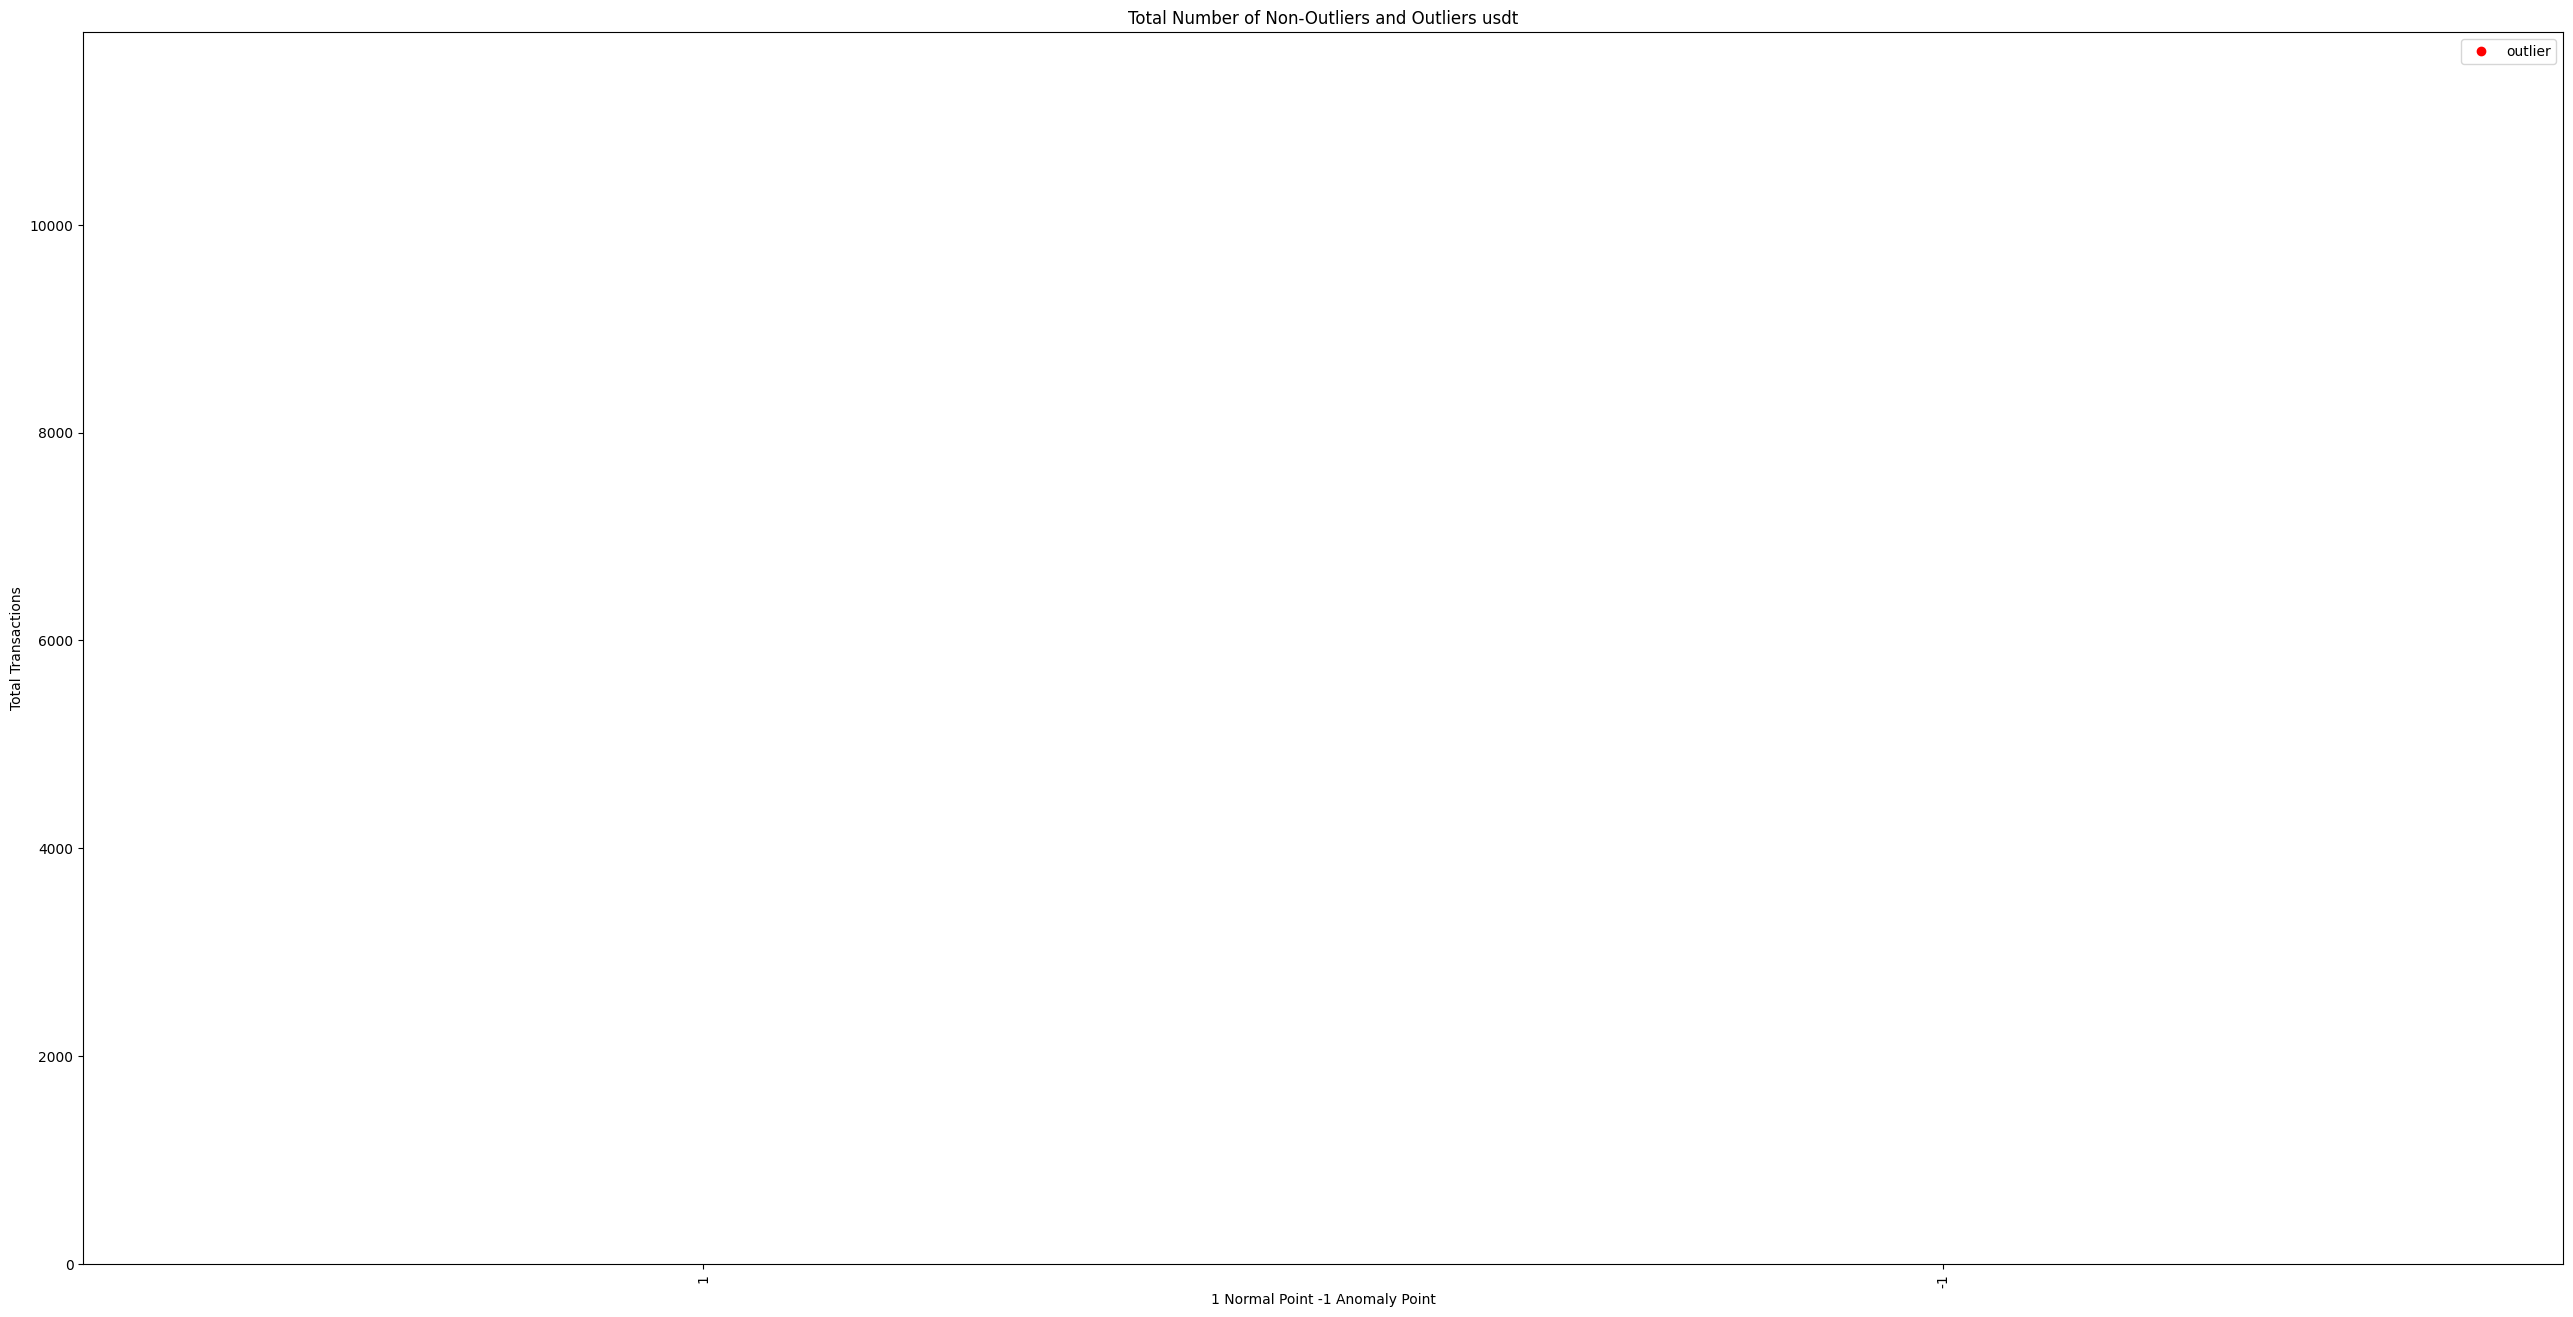

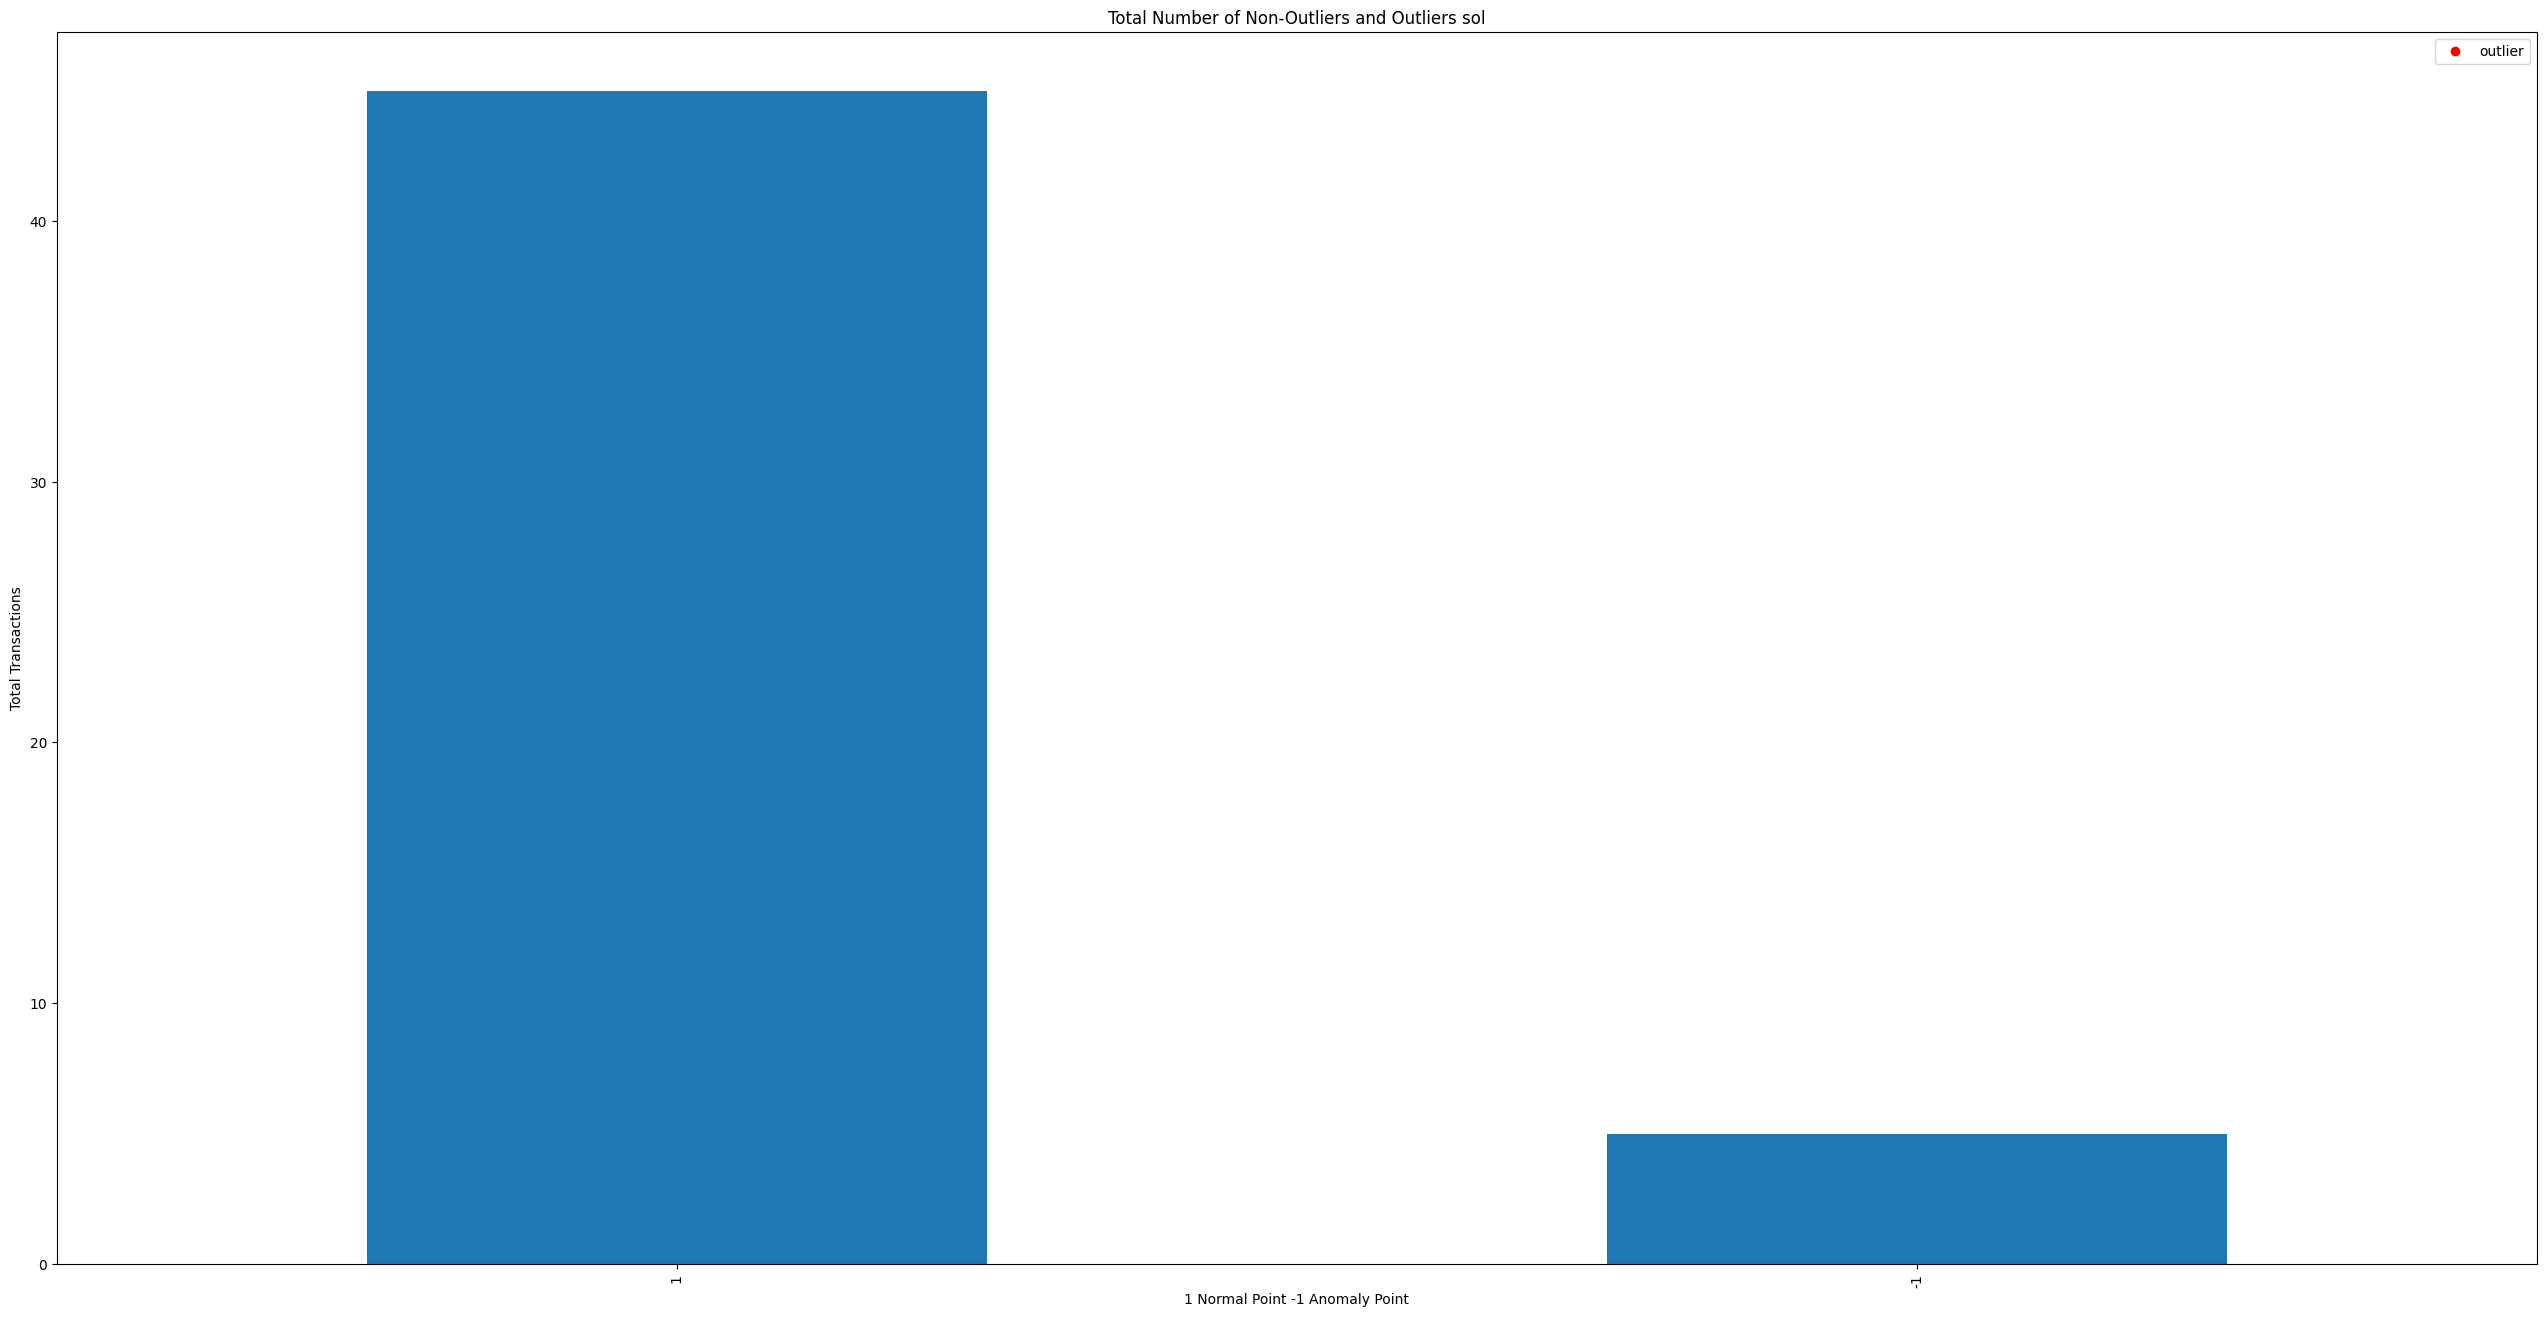

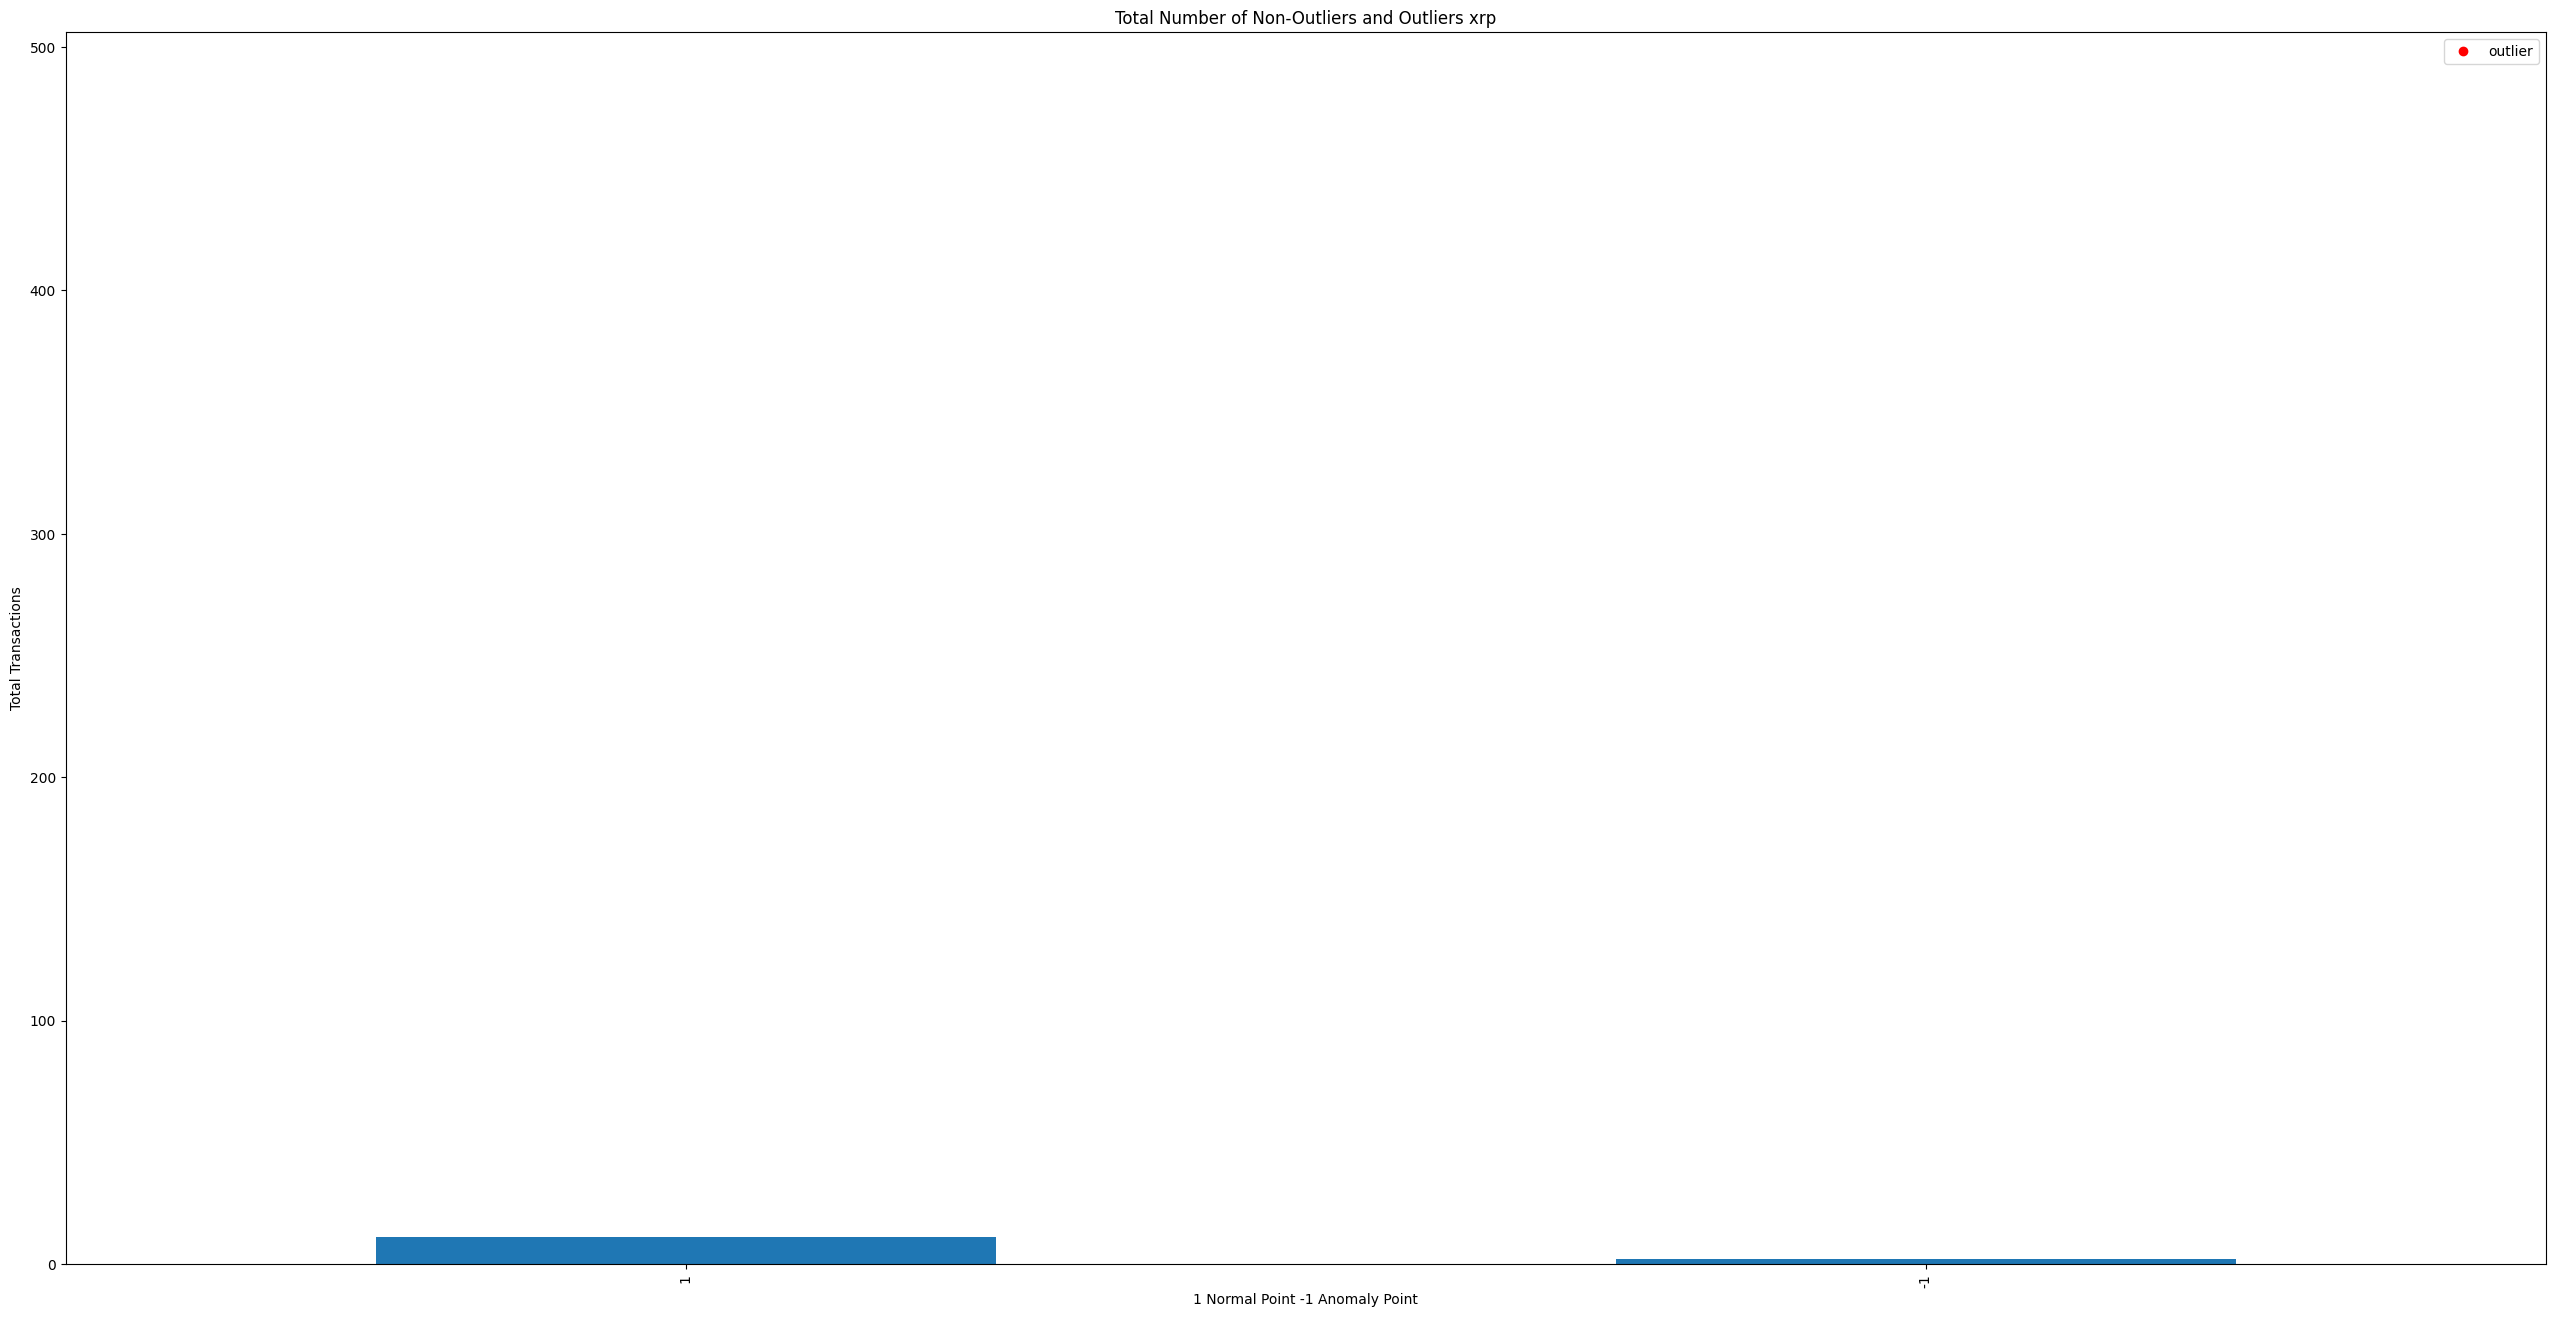

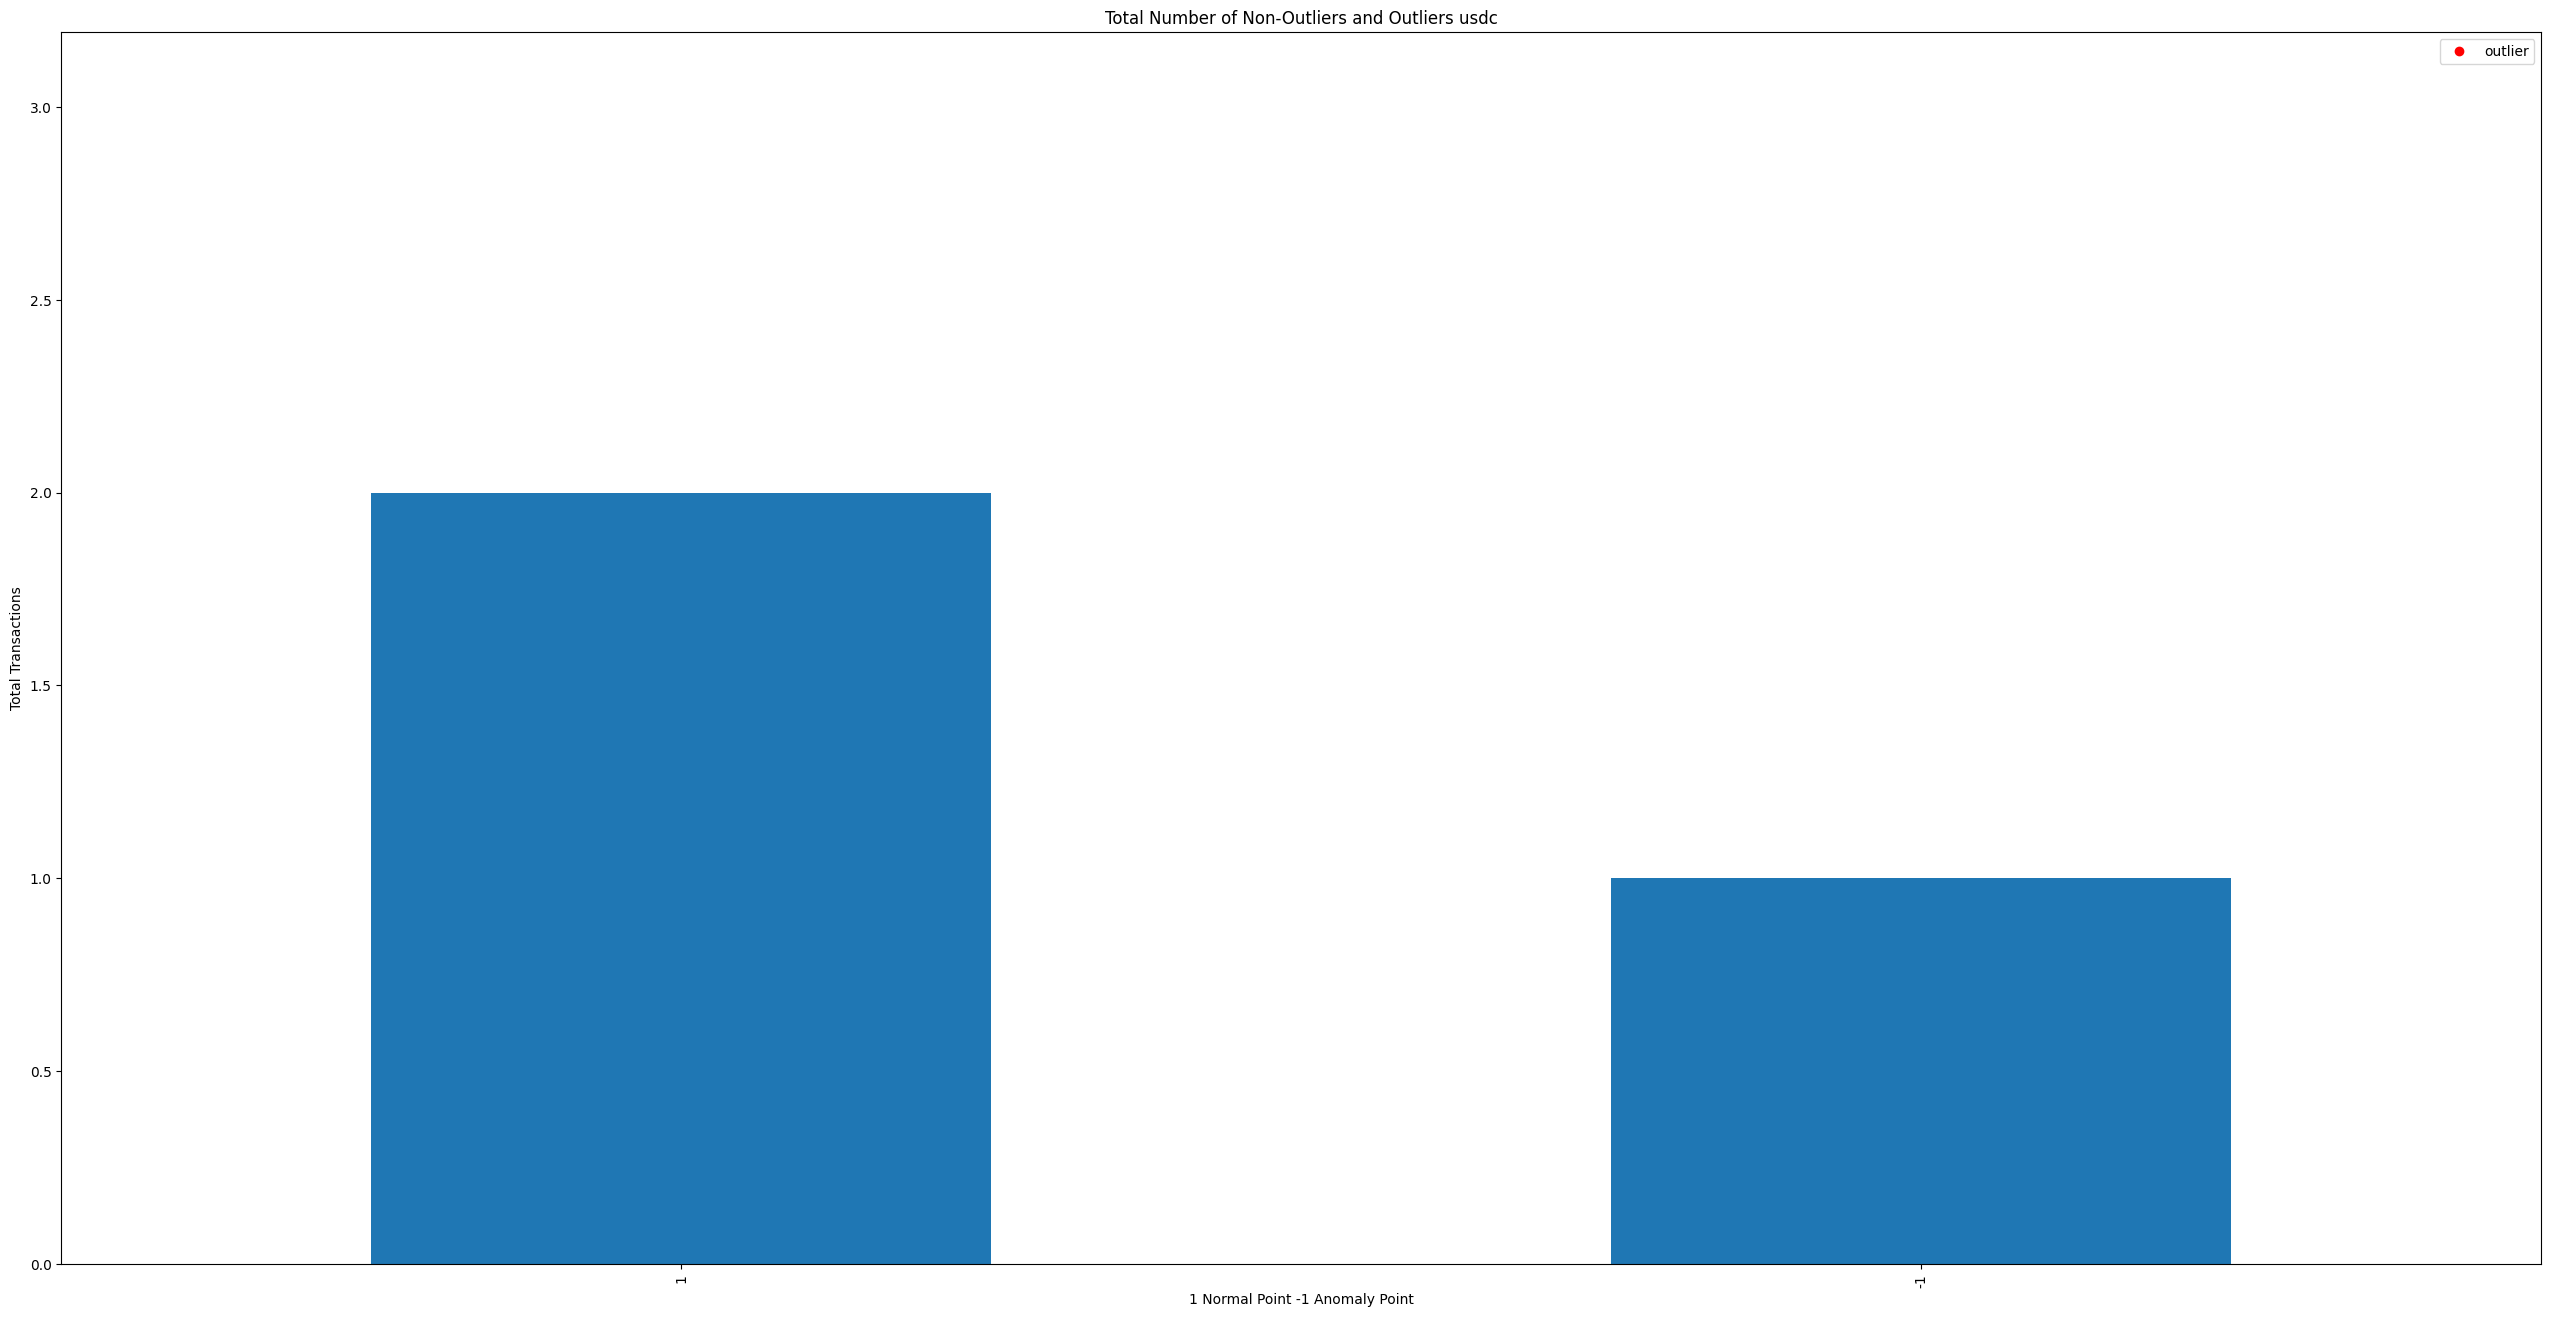

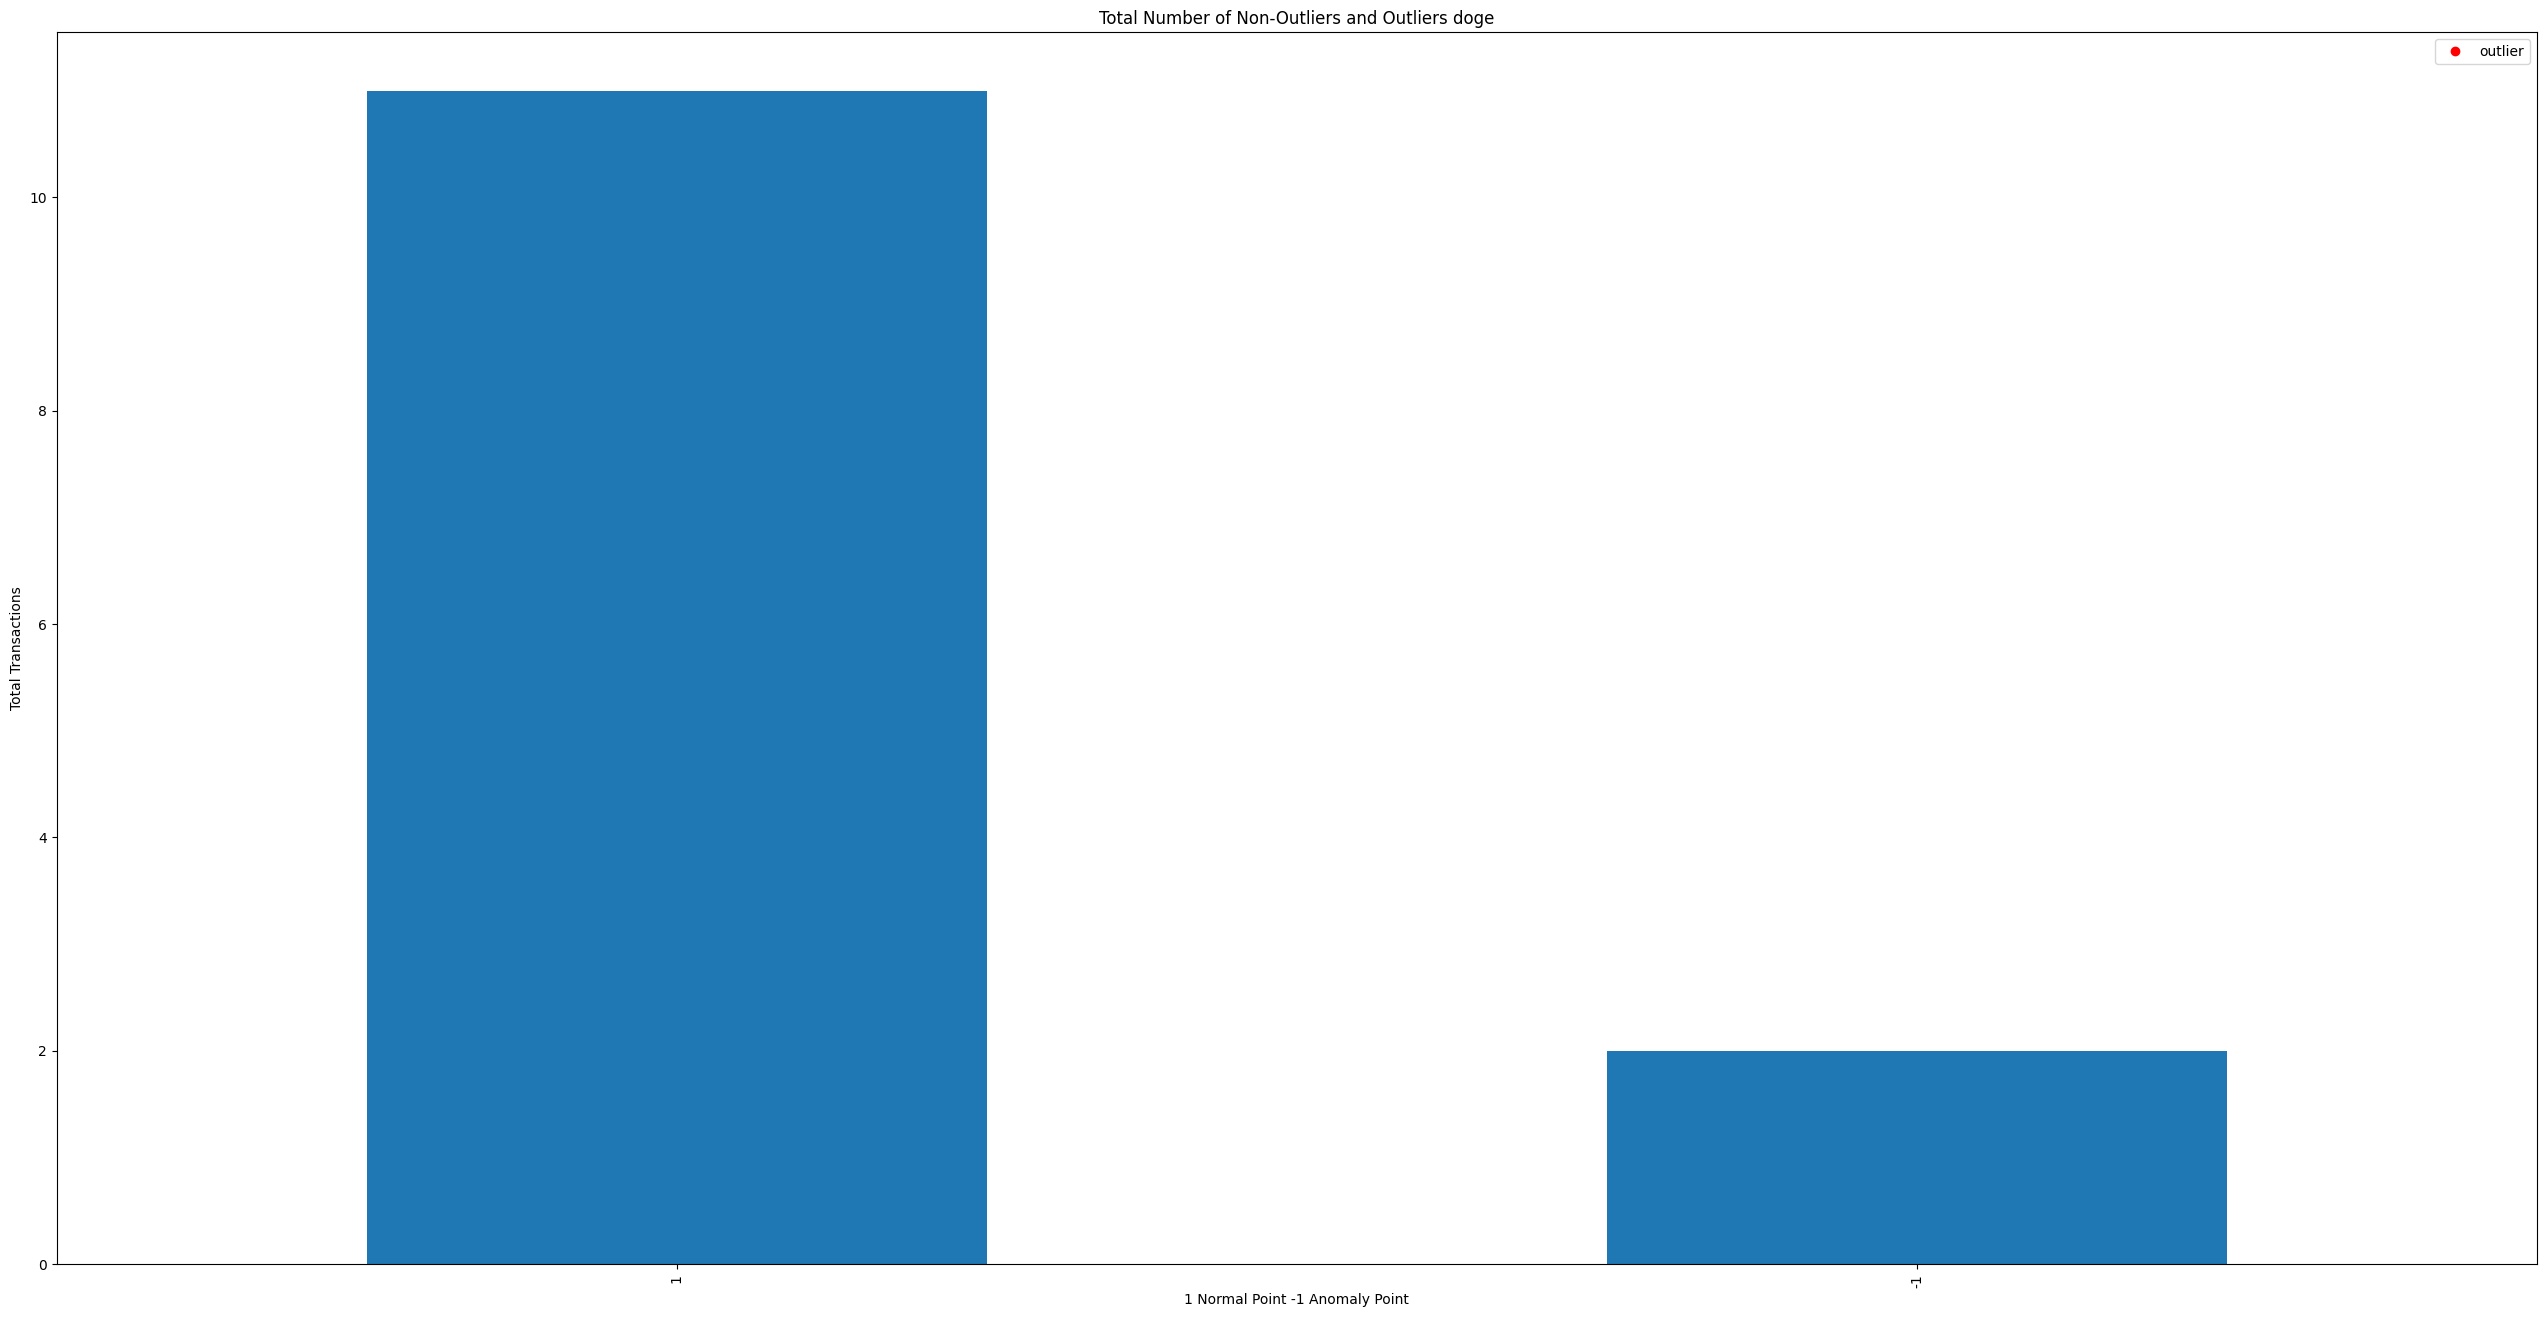

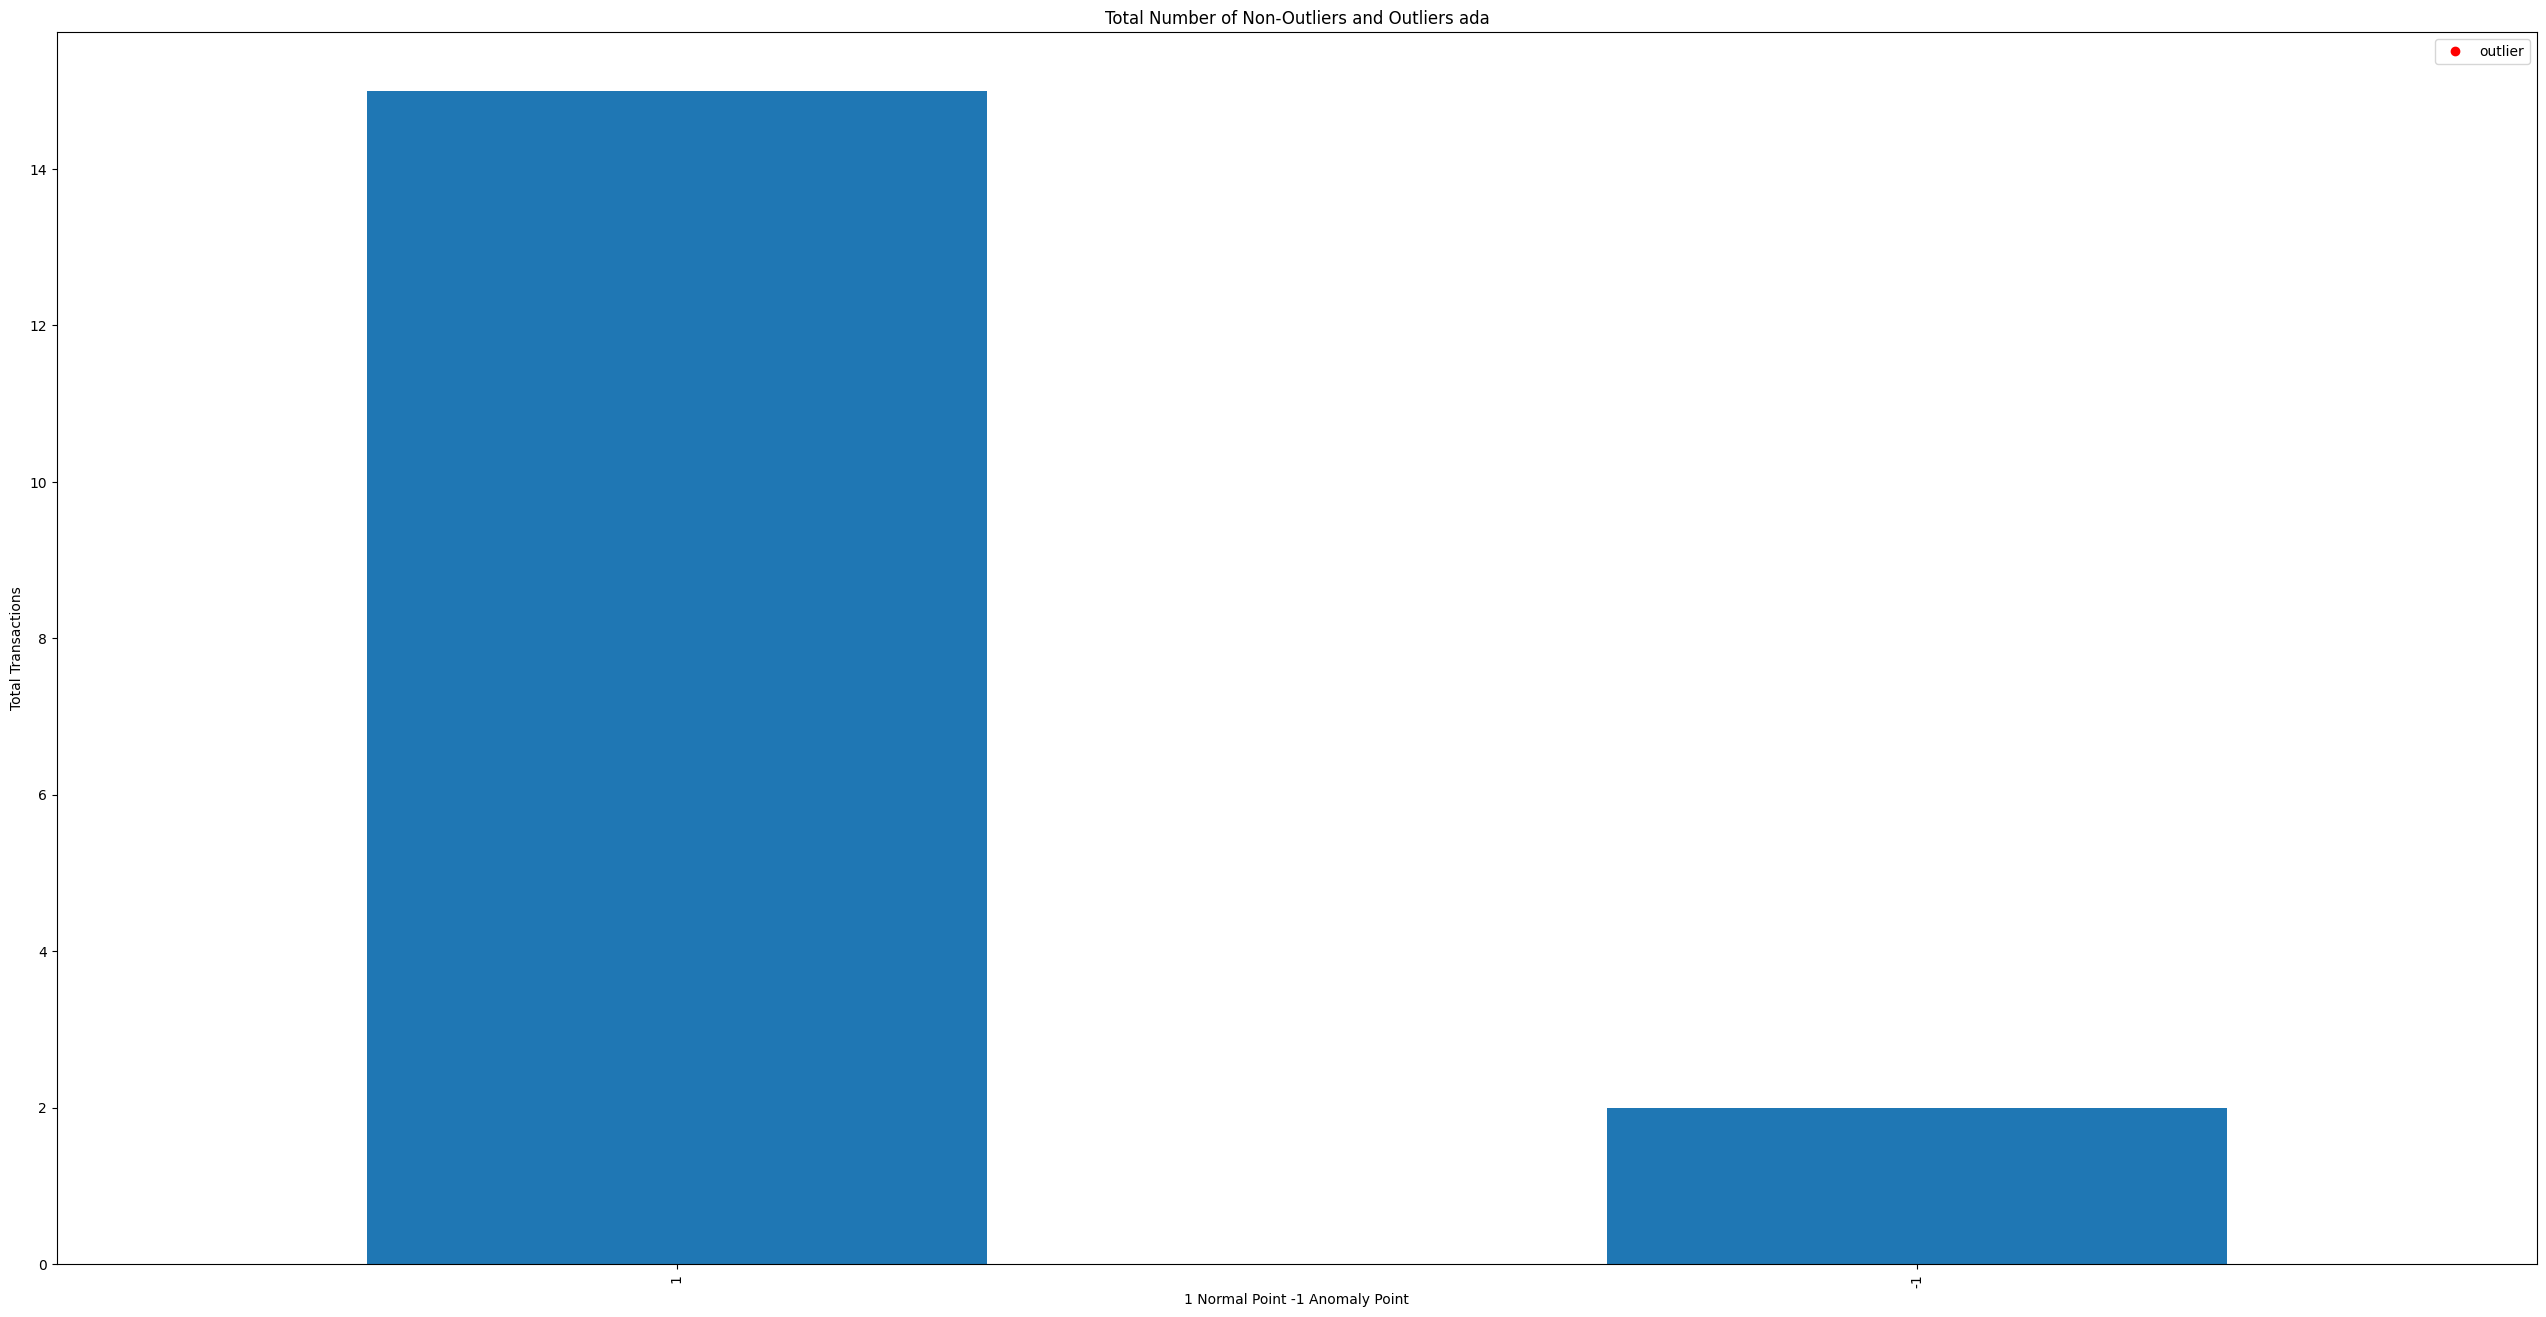

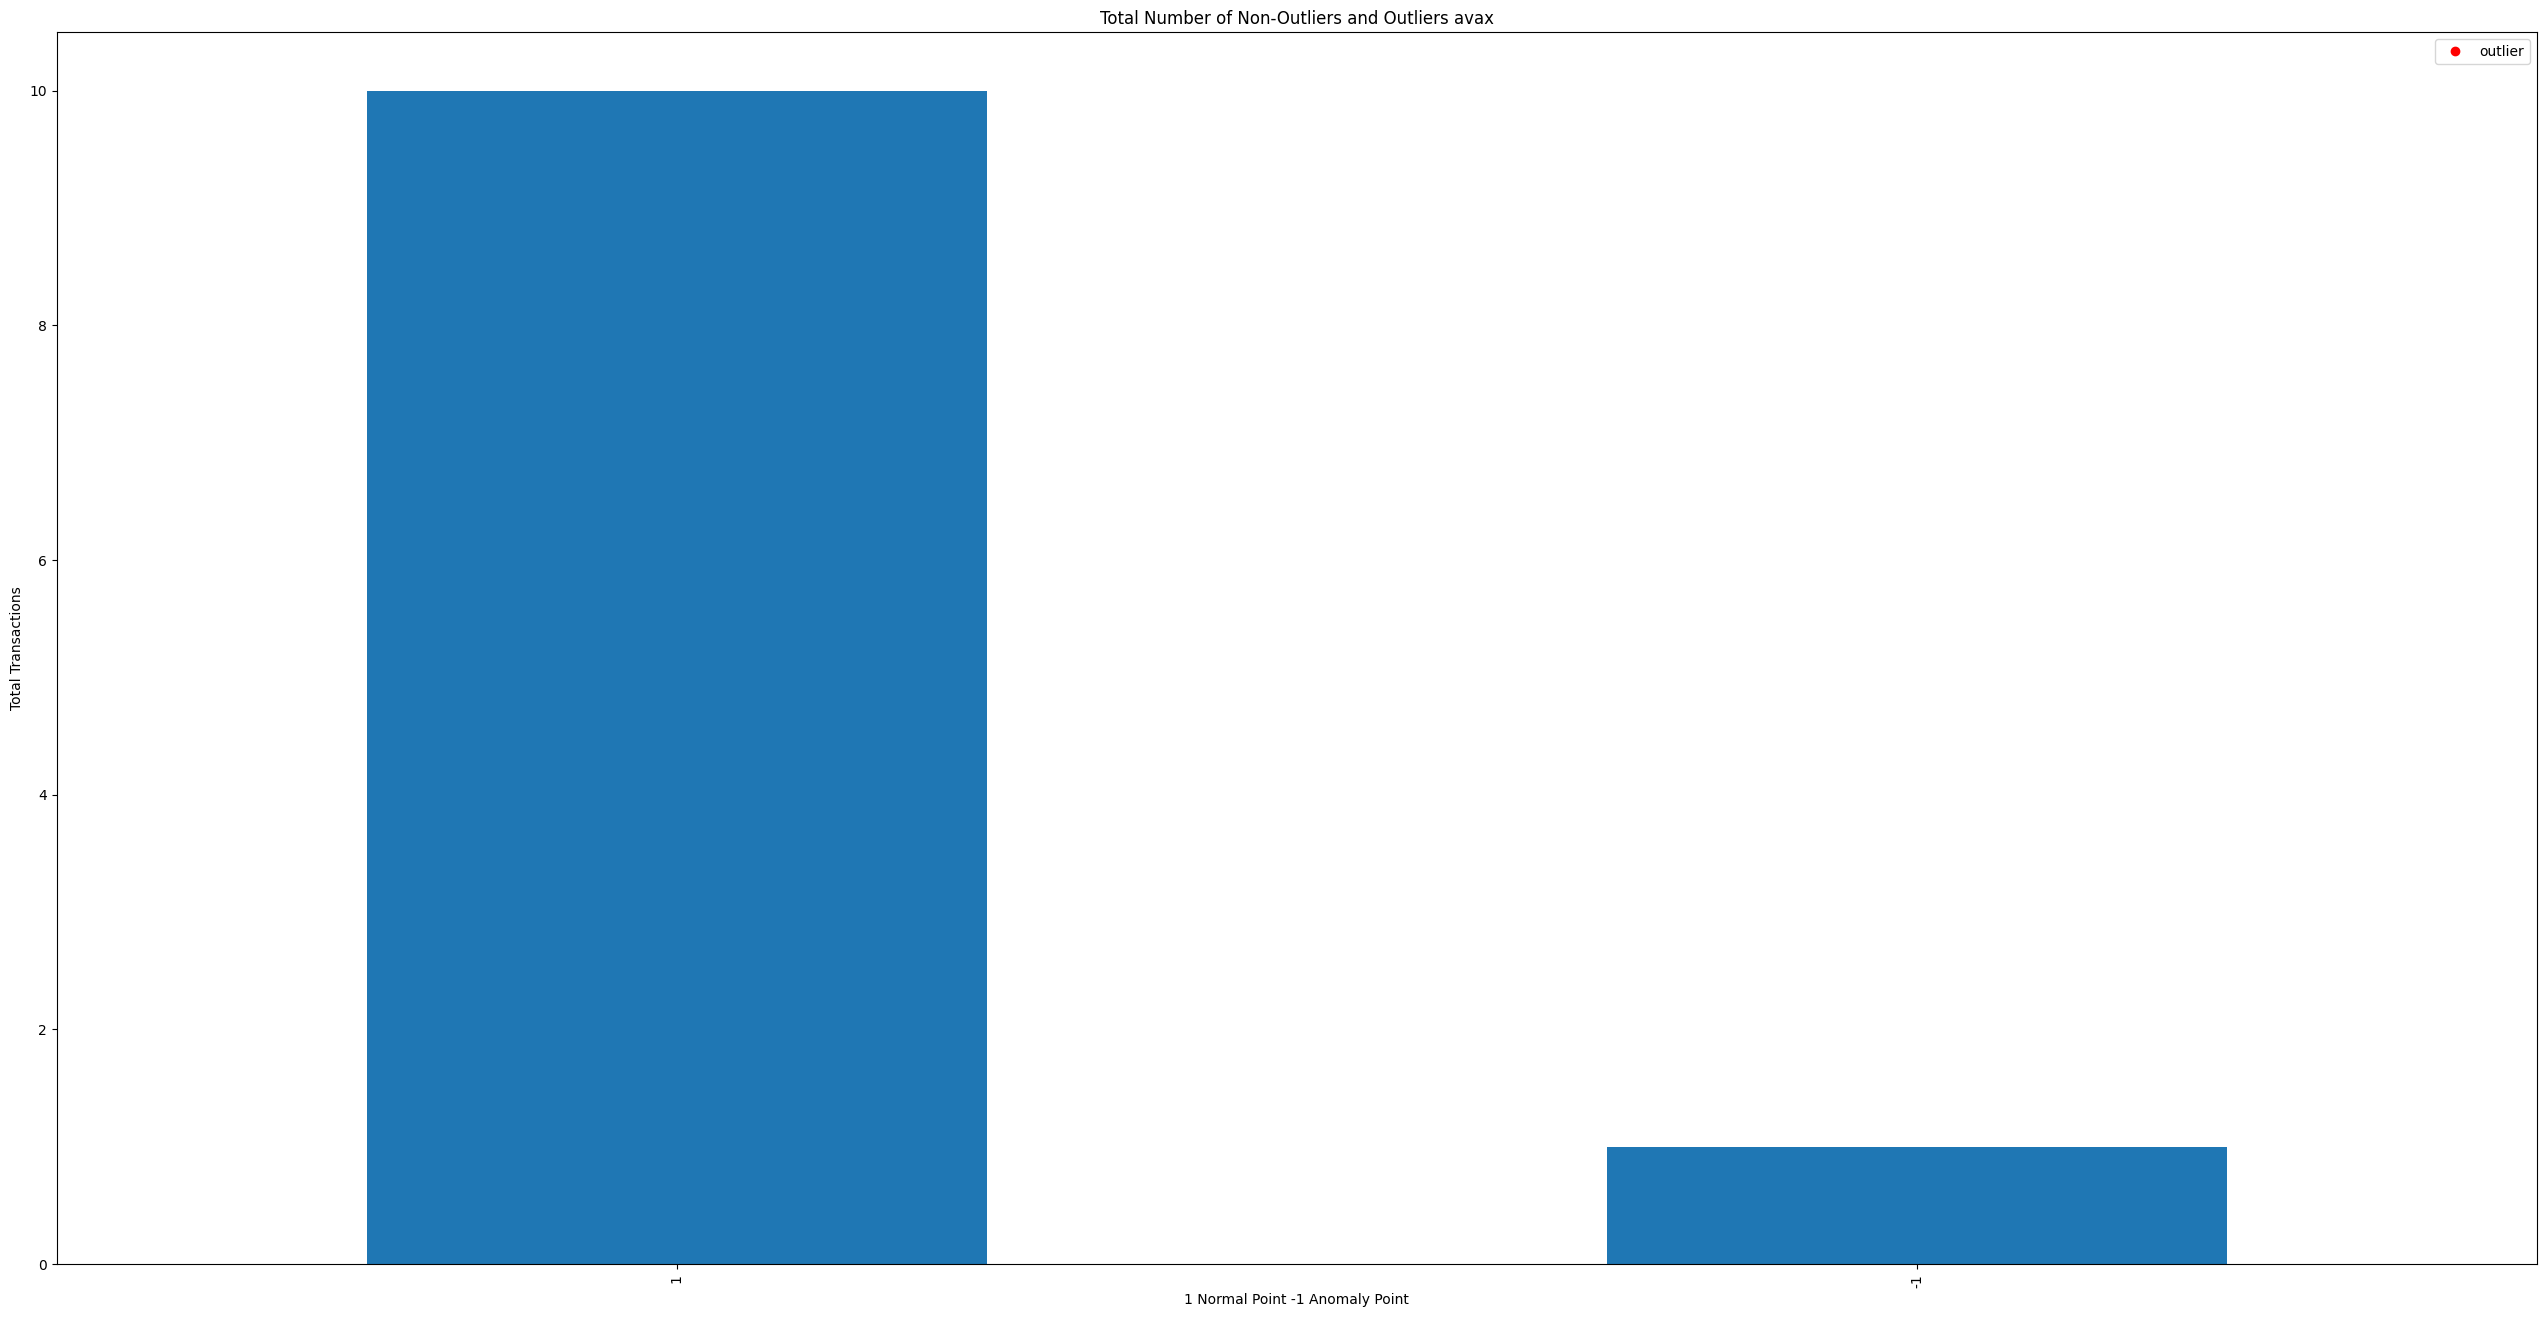

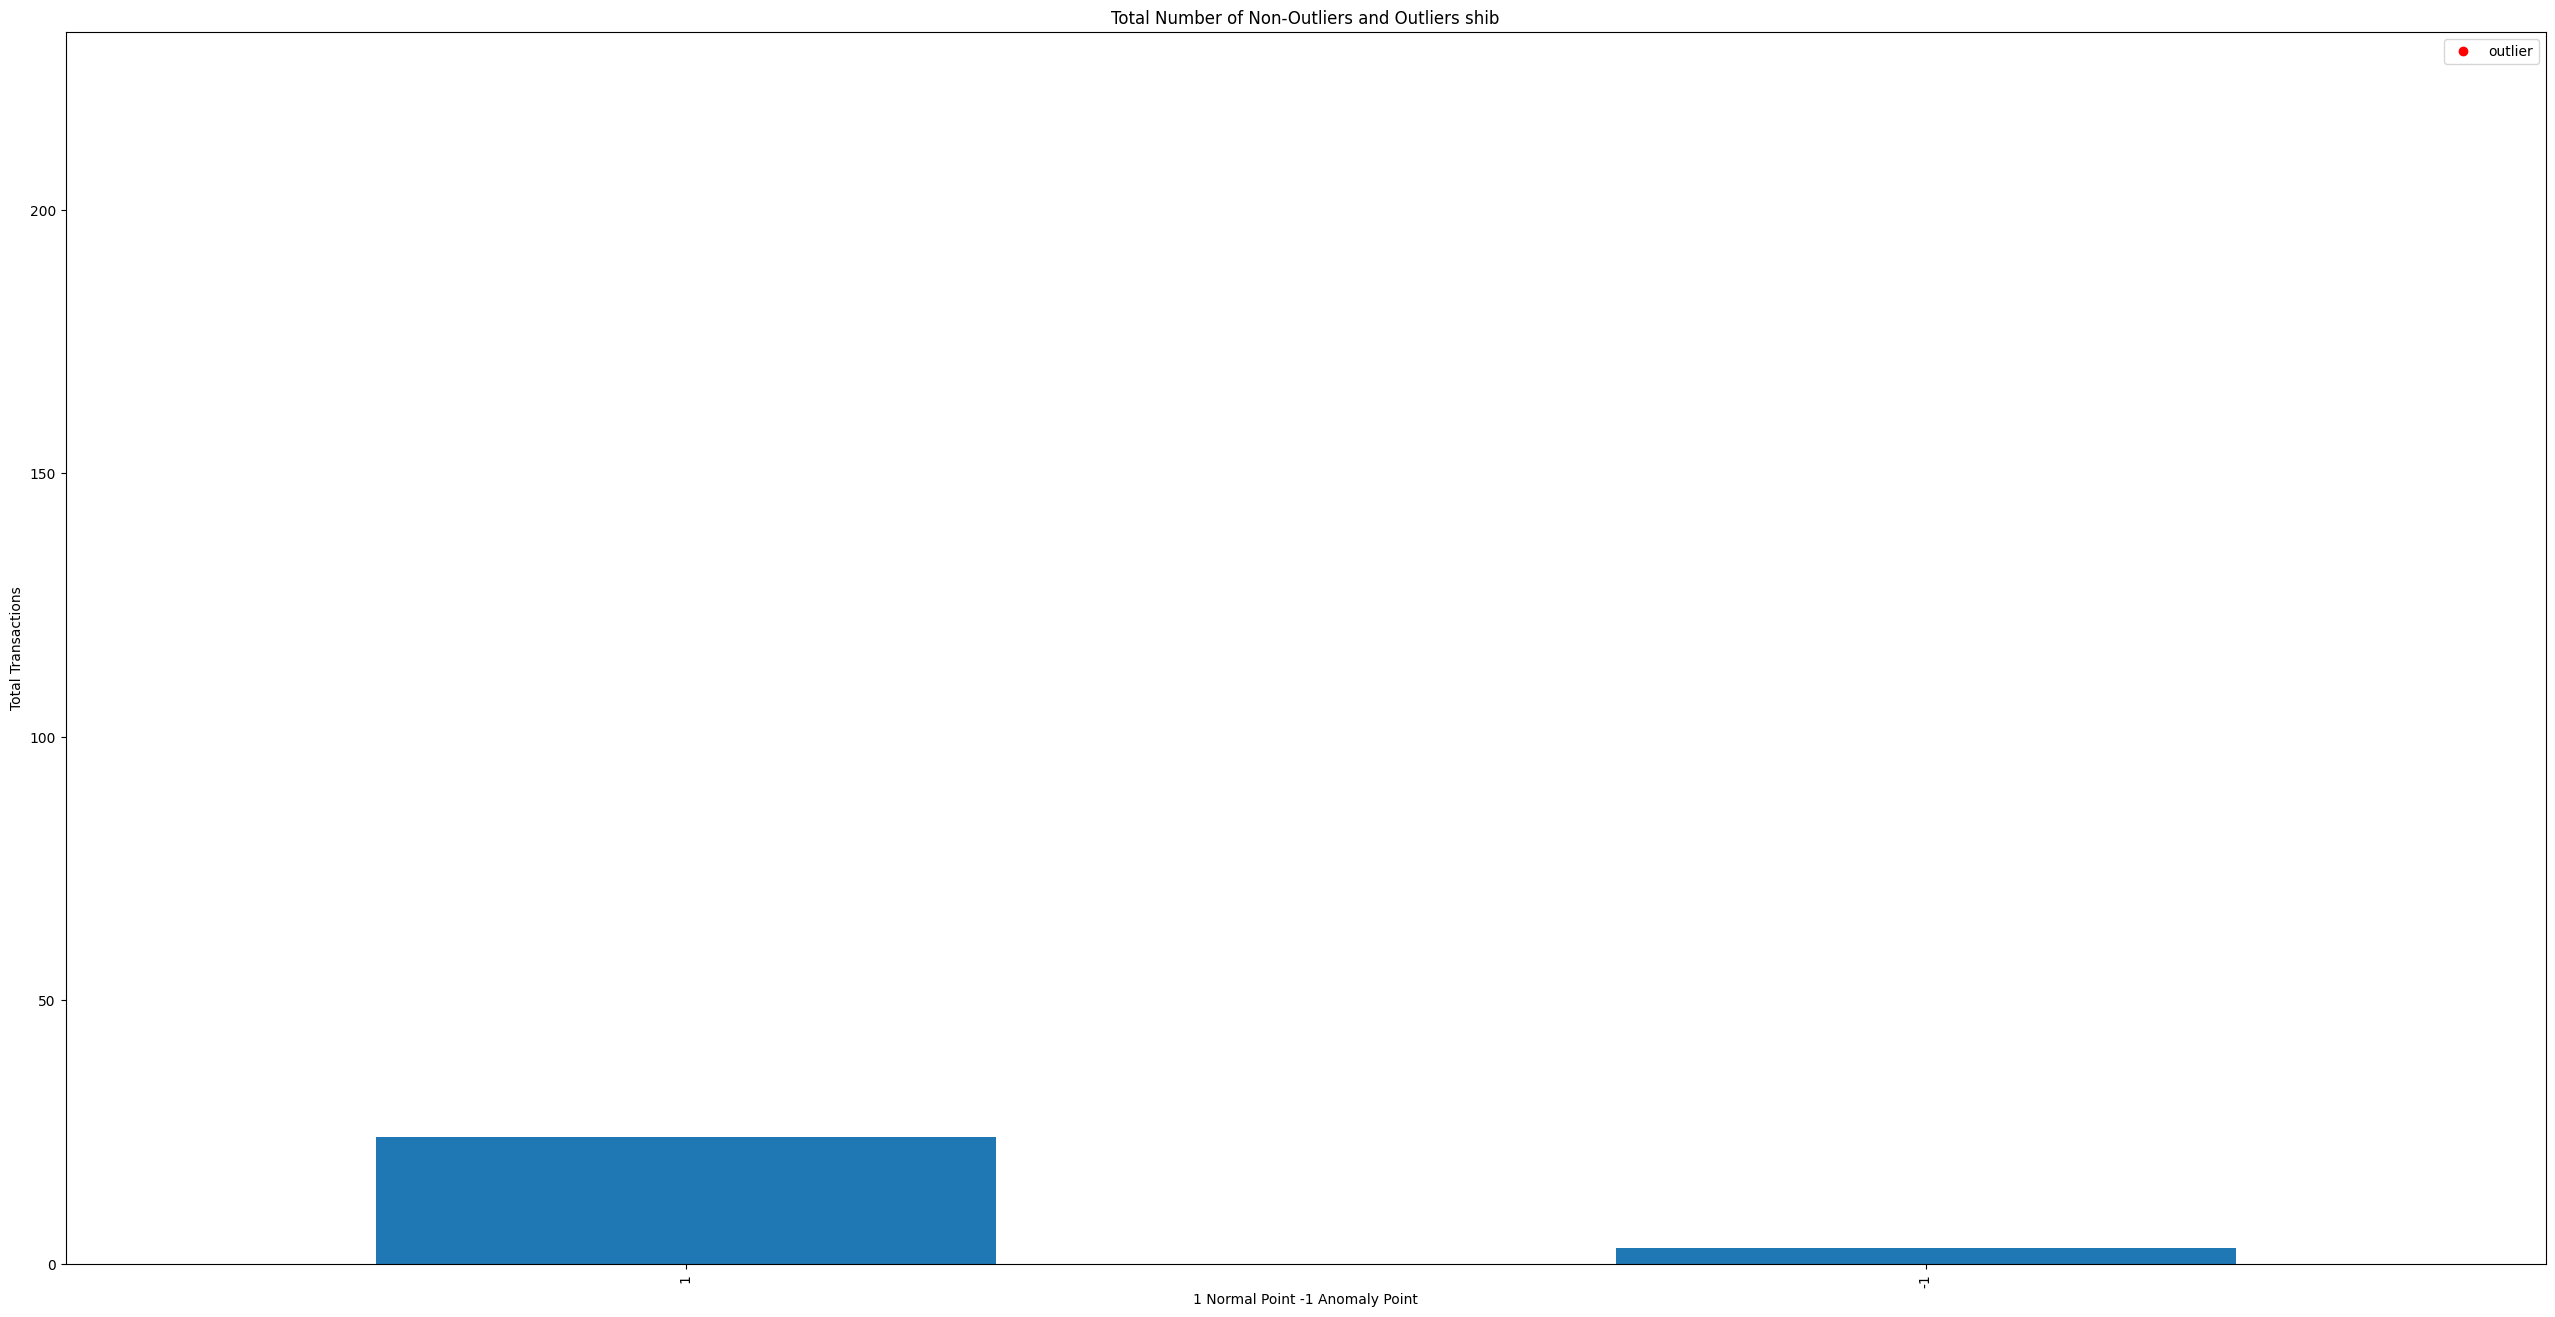

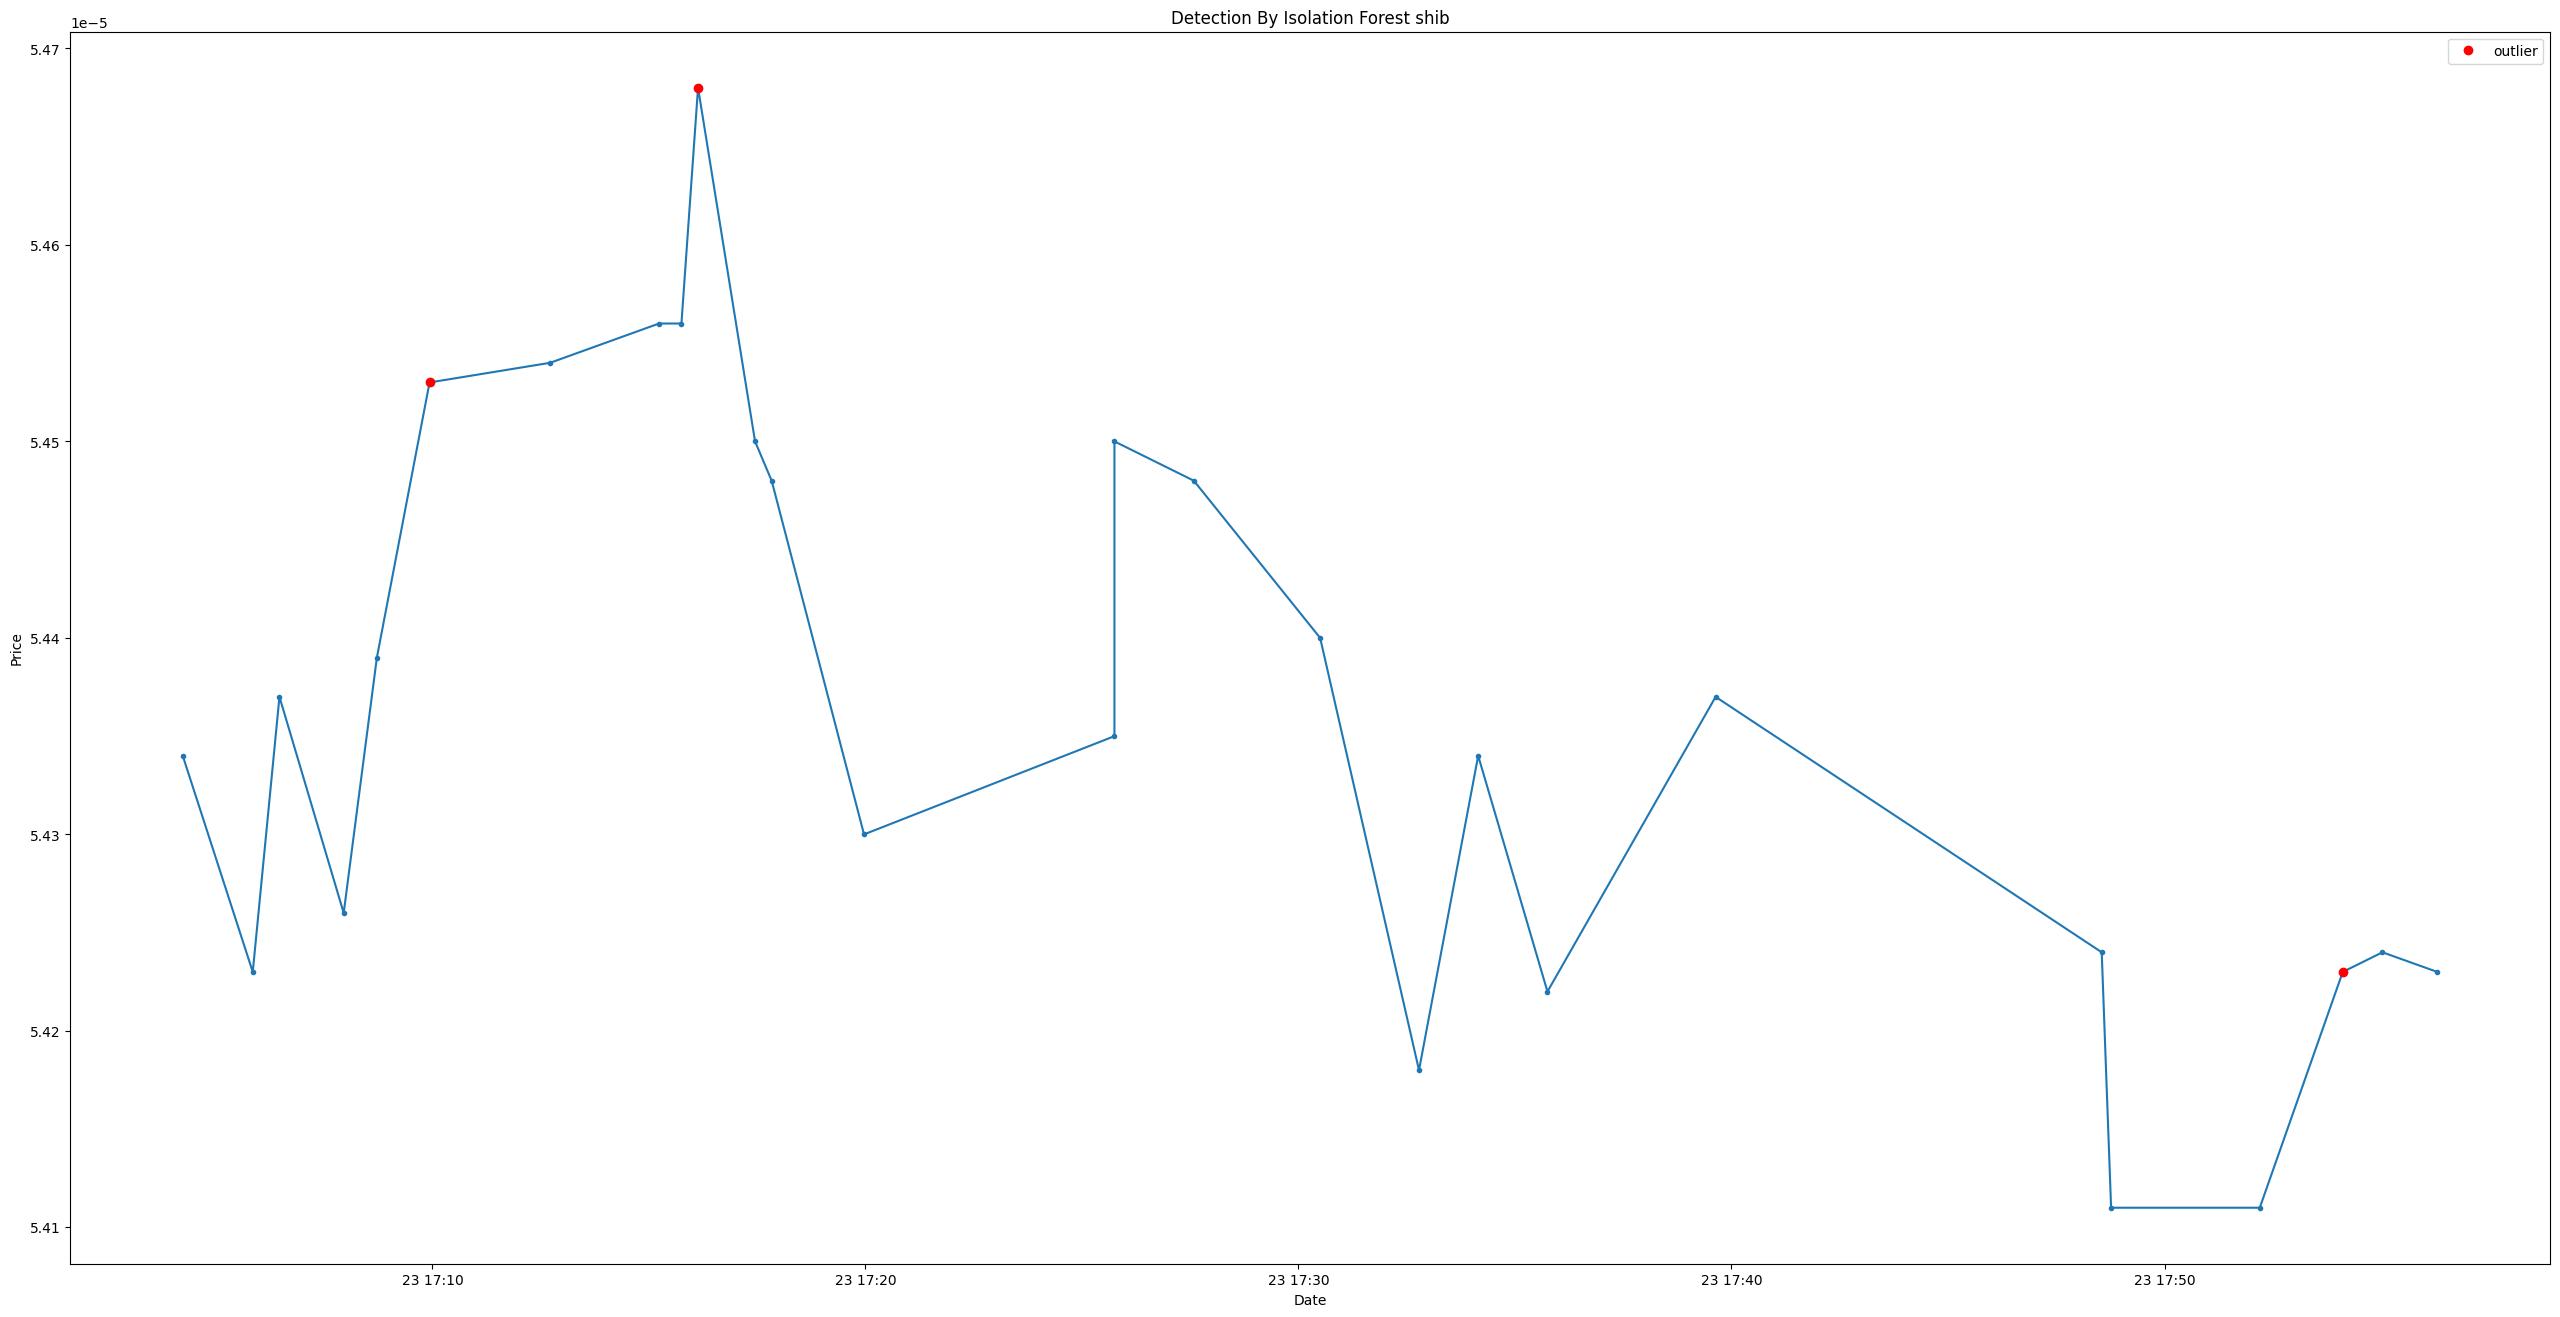

In [236]:
dataset_by_hour = dataset_by_time_range(start_date='2023-12-23 17:00:00',
                                        end_date='2023-12-23 17:59:59',
                                        columns=['price', 'amount'])
plot_figures(dataset_by_hour, model_hour, time_range='hour')